# Exploration of parameters

This notebook gathers the results for the parameter exploration made on the neural network models.

### Brief explanation

In order to understand the effect of each parameters properly, the exploration has been divided into different blocks. In each block, only a few parameters are modified while the rest remain fixed. Through this approach, we also guarantee that not too many simulations are required (if you test various parameters simultaneously, you need to create combinations between them). In this specific case, we run 5 replicas for each of the conditions, making up to a total of 320 simulations per brain region. As we considered a sample of 24 brain regions, we run a total of 7680 simulations. The results for each exploration are presented in two complementary formats, tables and figures, which include essentially the same information. We evaluate both the train data (how the models fit) and the test data (how the models generalise).

### Import the packages

We import the packages that will be needed. In this case, everything is already contained in the *nntools.py* file. In it, we are particularly interested in the *Evaluation* class, that includes different methods for evaluating results previously obtained.

In [1]:
import sys
sys.path.insert(0,'../../Tools')
from nntools import *
ev = Evaluation()

### 1. Imputation

In this exploration, we study the effect of the imputation strategy, which affects the input data. We work with 4 different imputation strategies: **mean, median, knn and bayes**. While the first two model missing values as a function of the same feature, the last two model them as a function of other features.

In [2]:
imputations = ['mean','median','knn','bayes']

In [3]:
parameters = pandas.read_csv('./Exploration/imputation_parameters.csv')
train = pandas.read_csv('./Exploration/imputation_train.csv')
test = pandas.read_csv('./Exploration/imputation_test.csv')

In [4]:
table = pandas.DataFrame()
for imputation in imputations:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Imputation'],[imputation])
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Imputation=mean Imputation=median Imputation=knn  \
accuracy_test     0.740+/-0.087     0.739+/-0.088  0.743+/-0.089   
accuracy_train    0.842+/-0.050     0.841+/-0.052  0.838+/-0.051   
f1_test           0.346+/-0.158     0.337+/-0.167  0.335+/-0.161   
f1_train          0.603+/-0.124     0.584+/-0.154  0.604+/-0.100   
precision_test    0.288+/-0.153     0.284+/-0.166  0.276+/-0.158   
precision_train   0.488+/-0.149     0.470+/-0.159  0.486+/-0.123   
recall_test       0.471+/-0.211     0.478+/-0.221  0.489+/-0.229   
recall_train      0.844+/-0.118     0.823+/-0.176  0.846+/-0.096   

                Imputation=bayes  
accuracy_test      0.745+/-0.084  
accuracy_train     0.839+/-0.051  
f1_test            0.343+/-0.185  
f1_train           0.593+/-0.129  
precision_test     0.289+/-0.177  
precision_train    0.478+/-0.149  
recall_test        0.462+/-0.224  
recall_train       0.838+/-0.139

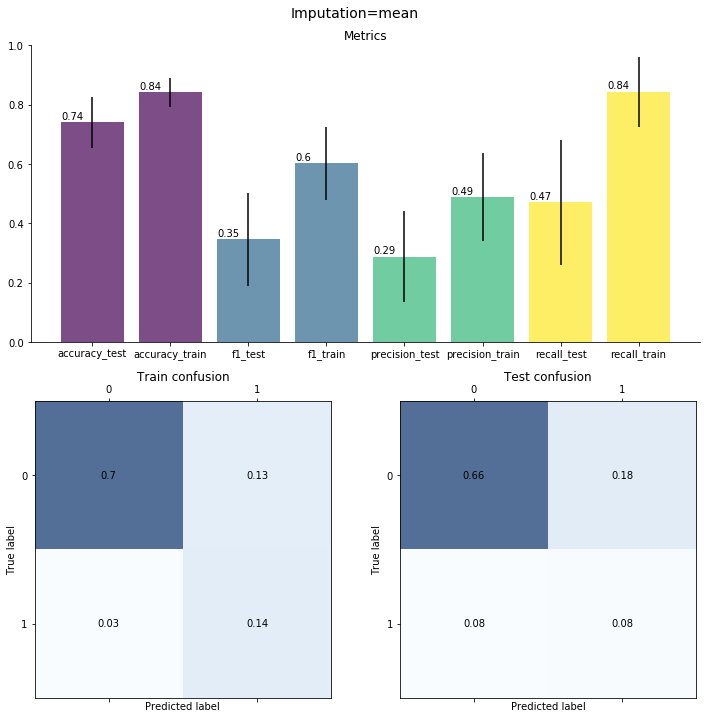

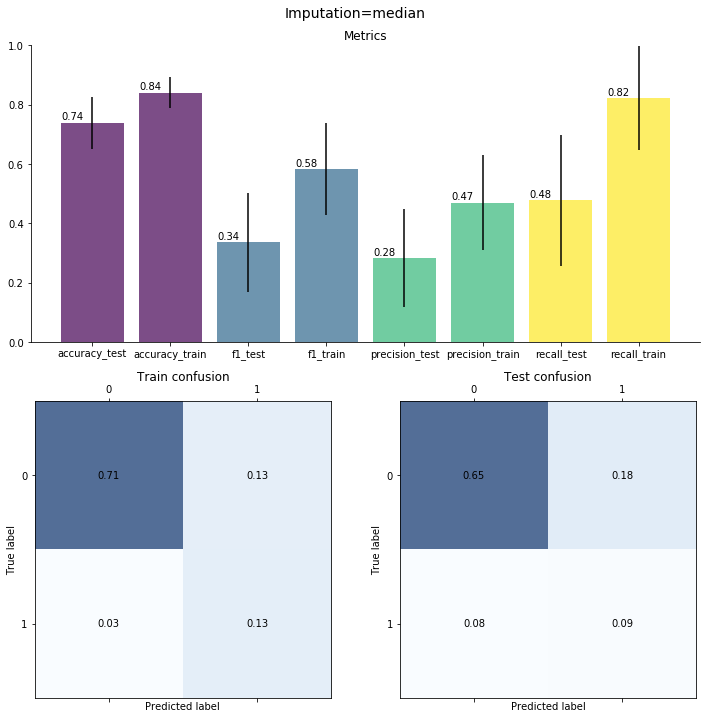

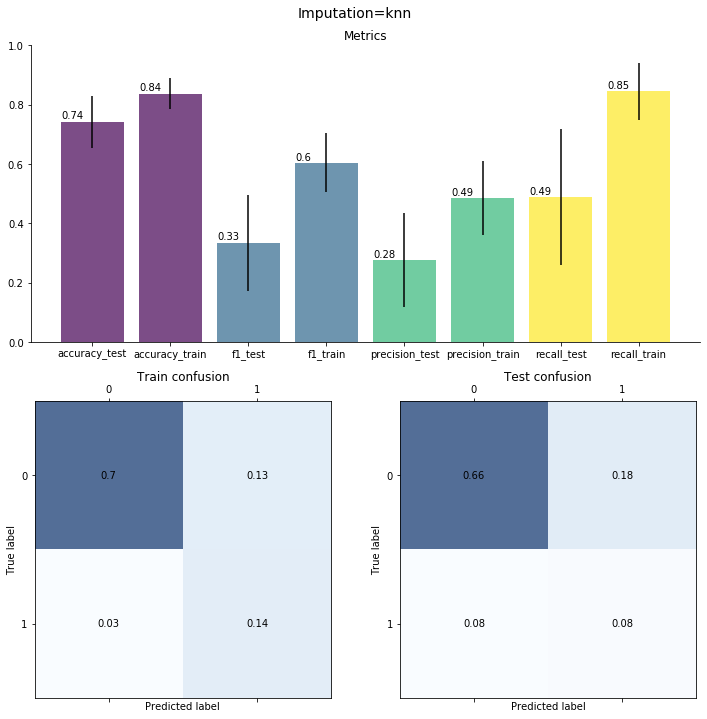

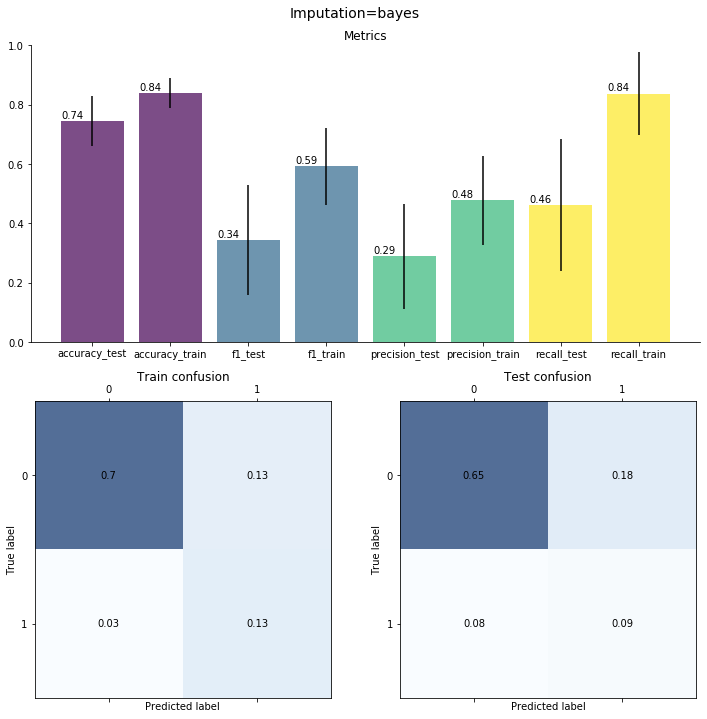

In [5]:
for imputation in imputations:
    ev.evaluate_with_plots(parameters,train,test,['Imputation'],[imputation])

It looks like **the imputation strategy is not very relevant as it almost doesn't affect any of the studied metrics**. This are good news as it means the imputation is not introducing any kind of bias. It was also expected since we are imputing only 3-4% of the values and these are distributed in an unfoccused manner. When we did our first approach towards treating missing data, we decided to remove features with more than 25% of missing values, which lead to the current scenario. If we wanted to see a real effect of the imputation strategy, we might need to recover some of these features.

### 1.1. Imputation (with more features)

The difference is that we were considering features with less than 20% of missing values while now we include those with less than 25%.

In [6]:
imputations = ['mean','median','knn','bayes']

In [7]:
parameters = pandas.read_csv('./Exploration/imputation_var1_parameters.csv')
train = pandas.read_csv('./Exploration/imputation_var1_train.csv')
test = pandas.read_csv('./Exploration/imputation_var1_test.csv')

In [8]:
table = pandas.DataFrame()
for imputation in imputations:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Imputation'],[imputation])
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Imputation=mean Imputation=median Imputation=knn  \
accuracy_test     0.744+/-0.095     0.744+/-0.089  0.760+/-0.083   
accuracy_train    0.860+/-0.049     0.856+/-0.051  0.860+/-0.047   
f1_test           0.323+/-0.170     0.326+/-0.189  0.348+/-0.174   
f1_train          0.656+/-0.103     0.634+/-0.130  0.628+/-0.131   
precision_test    0.275+/-0.167     0.283+/-0.185  0.301+/-0.182   
precision_train   0.538+/-0.134     0.521+/-0.138  0.516+/-0.146   
recall_test       0.440+/-0.227     0.432+/-0.236  0.477+/-0.218   
recall_train      0.879+/-0.089     0.858+/-0.152  0.853+/-0.152   

                Imputation=bayes  
accuracy_test      0.750+/-0.089  
accuracy_train     0.854+/-0.053  
f1_test            0.357+/-0.183  
f1_train           0.626+/-0.135  
precision_test     0.302+/-0.187  
precision_train    0.513+/-0.152  
recall_test        0.488+/-0.223  
recall_train       0.852+/-0.143

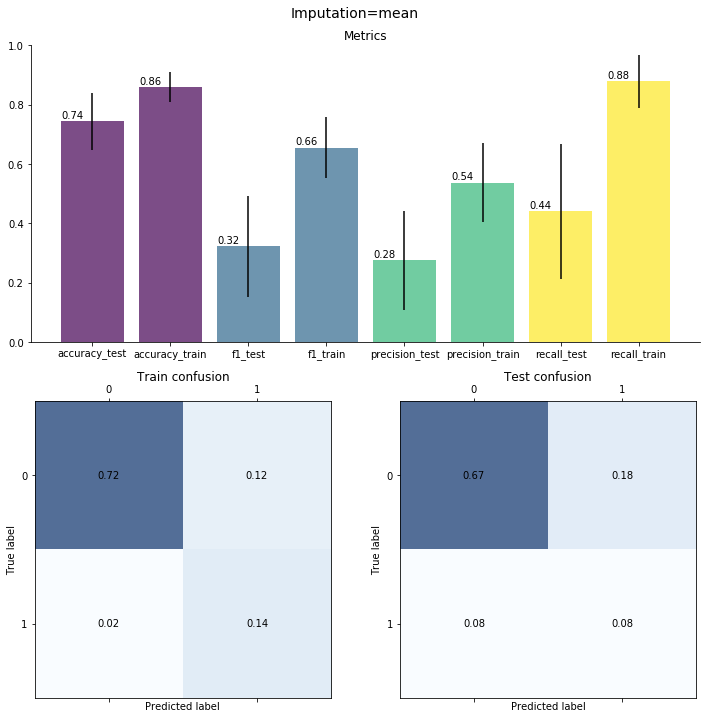

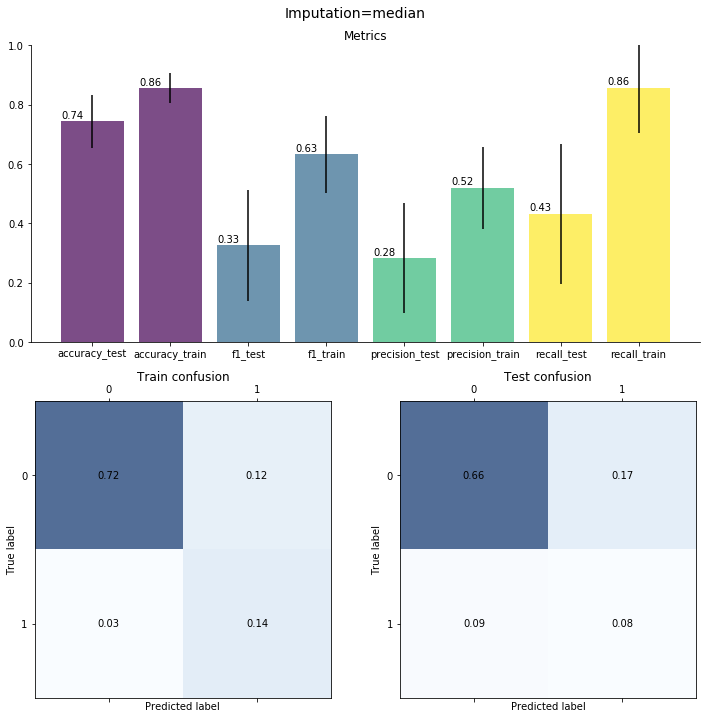

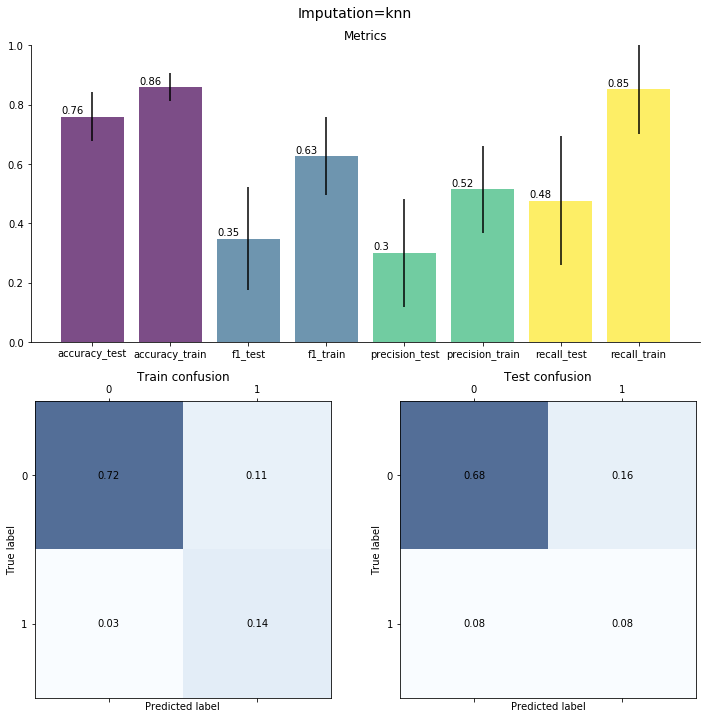

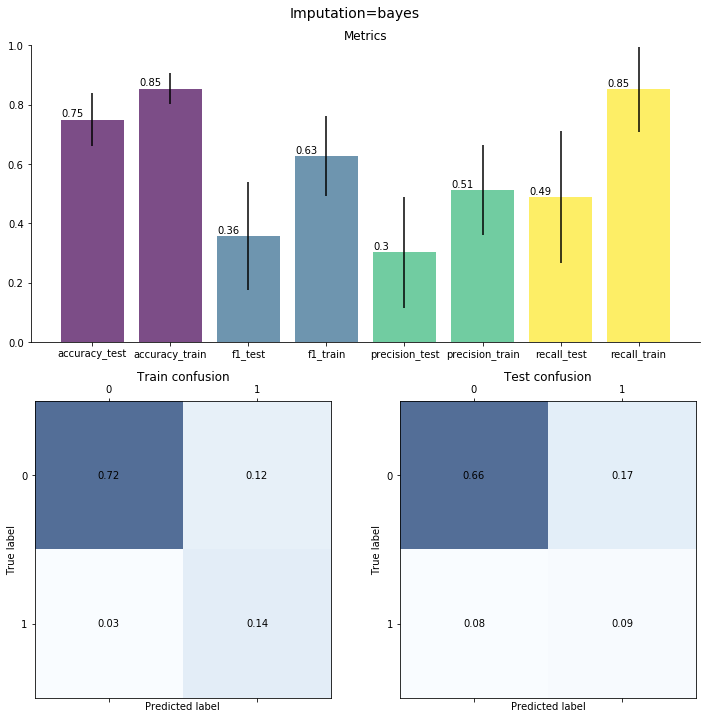

In [9]:
for imputation in imputations:
    ev.evaluate_with_plots(parameters,train,test,['Imputation'],[imputation])

As expected, **the imputation technique now has a certain relevance, being the most sophisticated methods (knn and bayes) more appropriate. This is specially clear in test data, where we see improval in all of the metrics**. The main difference between knn and bayes is that the first shows a best overall performance (accuracy) while the second shows better capability to recognise positive outcomes (precision and recall).

### 1.2. Imputation (with even more features)

The difference is that we were considering features with less than 25% of missing values while now we include those with less than 30%.

In [10]:
imputations = ['mean','median','knn','bayes']

In [11]:
parameters = pandas.read_csv('./Exploration/imputation_var2_parameters.csv')
train = pandas.read_csv('./Exploration/imputation_var2_train.csv')
test = pandas.read_csv('./Exploration/imputation_var2_test.csv')

In [12]:
table = pandas.DataFrame()
for imputation in imputations:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Imputation'],[imputation])
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Imputation=mean Imputation=median Imputation=knn  \
accuracy_test     0.755+/-0.088     0.753+/-0.092  0.752+/-0.089   
accuracy_train    0.894+/-0.040     0.893+/-0.040  0.888+/-0.045   
f1_test           0.352+/-0.173     0.324+/-0.173  0.348+/-0.180   
f1_train          0.730+/-0.098     0.714+/-0.121  0.710+/-0.131   
precision_test    0.305+/-0.176     0.276+/-0.169  0.294+/-0.171   
precision_train   0.618+/-0.136     0.599+/-0.143  0.597+/-0.157   
recall_test       0.451+/-0.204     0.435+/-0.220  0.471+/-0.236   
recall_train      0.920+/-0.063     0.913+/-0.105  0.910+/-0.109   

                Imputation=bayes  
accuracy_test      0.752+/-0.090  
accuracy_train     0.883+/-0.046  
f1_test            0.346+/-0.170  
f1_train           0.705+/-0.105  
precision_test     0.295+/-0.169  
precision_train    0.588+/-0.142  
recall_test        0.469+/-0.219  
recall_train       0.913+/-0.072

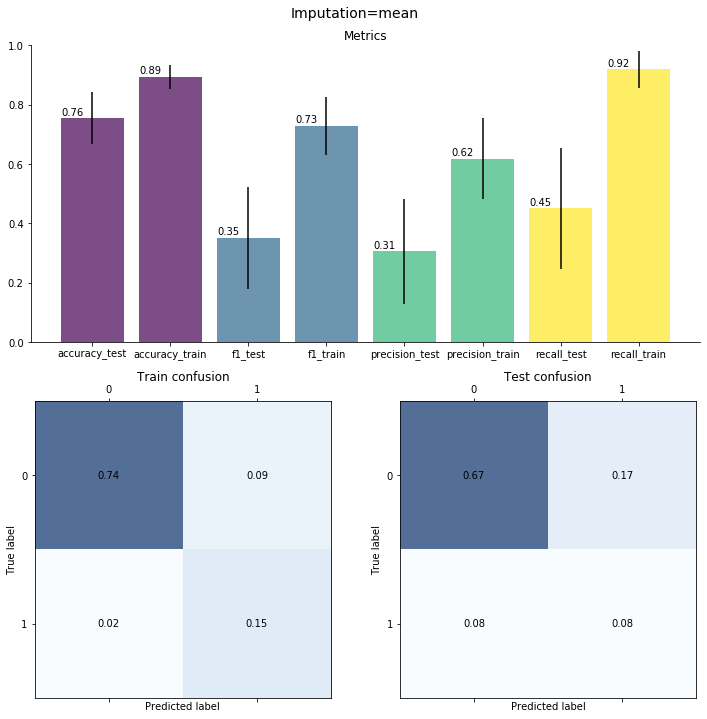

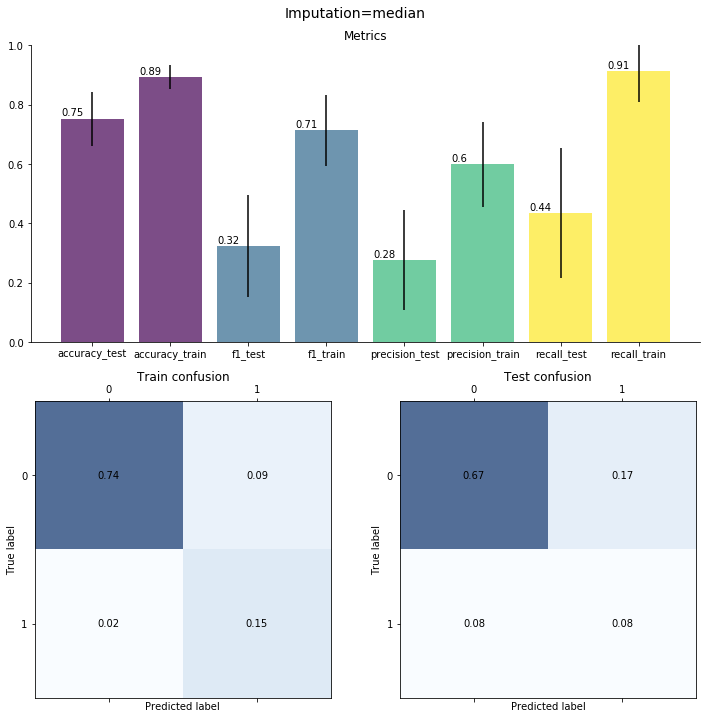

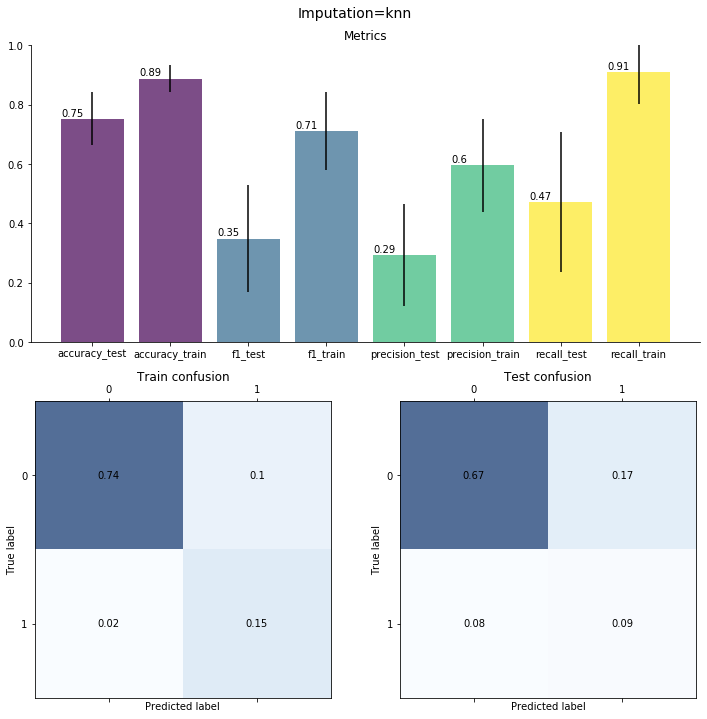

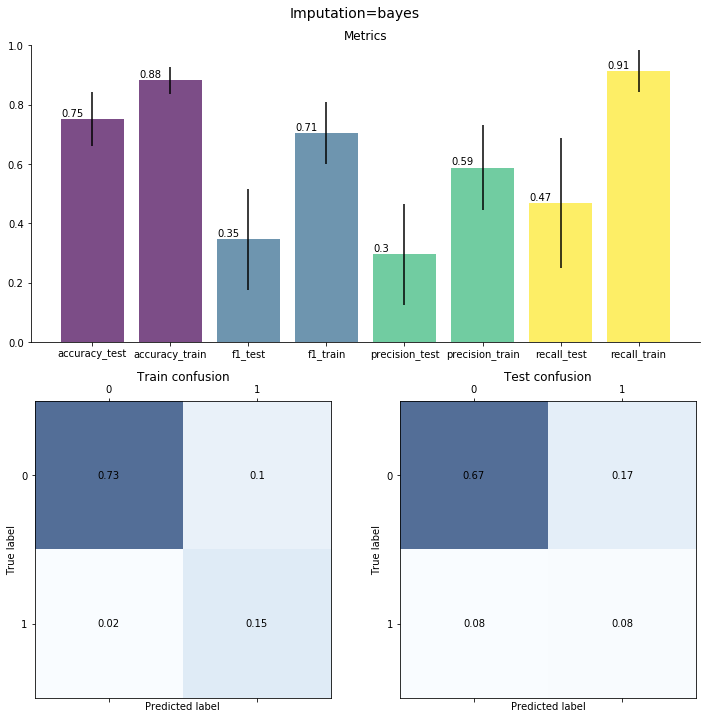

In [13]:
for imputation in imputations:
    ev.evaluate_with_plots(parameters,train,test,['Imputation'],[imputation])

What we can see here is that **the results in train data keep improving but the results in test data are worst**. This can be explained by the fact that introducing too many features can lead to a certain degree of overfitting. What is interesting in this case is that the most sophisticated methods (knn and bayes) no longer perform better. This might indicate that we have reached the point where imputation is stops being a good alternative.

### 2. Feature selection

In this exploration, we study the effect of the feature selection strategy (determines the relevance of each feature) combined with the target importance (determines the number of features to be considered), which affect the input data, the input layer width and the hidden layers width. We work with 3 different feature selection strategies: **pca, chi, anova** (while the first only considers input data, the last two consider the correlation of each feature with the output data) and 6 different target importances **from 0.5 to 1**.

In [14]:
selections = ['pca','chi','anova']
target_importances = [0.5,0.6,0.7,0.8,0.9,1]

In [15]:
parameters = pandas.read_csv('./Exploration/feature_selection_parameters.csv')
train = pandas.read_csv('./Exploration/feature_selection_train.csv')
test = pandas.read_csv('./Exploration/feature_selection_test.csv')

In [16]:
table = pandas.DataFrame()
selection = 'pca'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=pca, Target importance=0.5, Features=14.0  \
accuracy_test                                        0.705+/-0.094    
accuracy_train                                       0.745+/-0.066    
f1_test                                              0.304+/-0.184    
f1_train                                             0.394+/-0.161    
precision_test                                       0.244+/-0.171    
precision_train                                      0.312+/-0.153    
recall_test                                          0.479+/-0.247    
recall_train                                         0.630+/-0.204    

                Selection=pca, Target importance=0.6, Features=17.0  \
accuracy_test                                        0.722+/-0.094    
accuracy_train                                       0.762+/-0.069    
f1_test                                              0.316+/-0.193    
f1_train                                             0.421+/-0.179    
precision_test                                       0.255+/-0.180    
precision_train                                      0.331+/-0.169    
recall_test                                          0.476+/-0.257    
recall_train                                         0.644+/-0.228    

                Selection=pca, Target importance=0.7, Features=20.0  \
accuracy_test                                        0.727+/-0.092    
accuracy_train                                       0.779+/-0.063    
f1_test                                              0.323+/-0.182    
f1_train                                             0.475+/-0.149    
precision_test                                       0.261+/-0.168    
precision_train                                      0.374+/-0.151    
recall_test                                          0.478+/-0.246    
recall_train                                         0.712+/-0.174    

                Selection=pca, Target importance=0.8, Features=23.0  \
accuracy_test                                        0.726+/-0.085    
accuracy_train                                       0.803+/-0.057    
f1_test                                              0.321+/-0.176    
f1_train                                             0.505+/-0.155    
precision_test                                       0.262+/-0.168    
precision_train                                      0.402+/-0.162    
recall_test                                          0.469+/-0.237    
recall_train                                         0.751+/-0.186    

                Selection=pca, Target importance=0.9, Features=27.0  \
accuracy_test                                        0.730+/-0.091    
accuracy_train                                       0.807+/-0.056    
f1_test                                              0.324+/-0.176    
f1_train                                             0.530+/-0.132    
precision_test                                       0.261+/-0.162    
precision_train                                      0.419+/-0.144    
recall_test                                          0.488+/-0.253    
recall_train                                         0.793+/-0.147    

                Selection=pca, Target importance=1, Features=31.0  
accuracy_test                                       0.745+/-0.097  
accuracy_train                                      0.841+/-0.053  
f1_test                                             0.339+/-0.163  
f1_train                                            0.580+/-0.159  
precision_test                                      0.282+/-0.160  
precision_train                                     0.471+/-0.165  
recall_test                                         0.493+/-0.233  
recall_train                                        0.803+/-0.189

In [17]:
table = pandas.DataFrame()
selection = 'anova'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=anova, Target importance=0.5, Features=8.09  \
accuracy_test                                        0.739+/-0.093      
accuracy_train                                       0.763+/-0.078      
f1_test                                              0.296+/-0.212      
f1_train                                             0.348+/-0.200      
precision_test                                       0.244+/-0.195      
precision_train                                      0.281+/-0.180      
recall_test                                          0.440+/-0.286      
recall_train                                         0.527+/-0.271      

                Selection=anova, Target importance=0.6, Features=10.35  \
accuracy_test                                        0.728+/-0.096       
accuracy_train                                       0.762+/-0.071       
f1_test                                              0.326+/-0.183       
f1_train                                             0.392+/-0.179       
precision_test                                       0.267+/-0.168       
precision_train                                      0.317+/-0.167       
recall_test                                          0.488+/-0.254       
recall_train                                         0.589+/-0.221       

                Selection=anova, Target importance=0.7, Features=12.96  \
accuracy_test                                        0.734+/-0.098       
accuracy_train                                       0.772+/-0.070       
f1_test                                              0.327+/-0.196       
f1_train                                             0.407+/-0.190       
precision_test                                       0.265+/-0.182       
precision_train                                      0.325+/-0.172       
recall_test                                          0.486+/-0.266       
recall_train                                         0.614+/-0.245       

                Selection=anova, Target importance=0.8, Features=16.17  \
accuracy_test                                        0.743+/-0.087       
accuracy_train                                       0.774+/-0.059       
f1_test                                              0.347+/-0.184       
f1_train                                             0.431+/-0.169       
precision_test                                       0.281+/-0.175       
precision_train                                      0.342+/-0.163       
recall_test                                          0.513+/-0.246       
recall_train                                         0.650+/-0.203       

                Selection=anova, Target importance=0.9, Features=20.13  \
accuracy_test                                        0.730+/-0.092       
accuracy_train                                       0.785+/-0.059       
f1_test                                              0.342+/-0.173       
f1_train                                             0.476+/-0.151       
precision_test                                       0.280+/-0.167       
precision_train                                      0.380+/-0.152       
recall_test                                          0.498+/-0.220       
recall_train                                         0.711+/-0.168       

                Selection=anova, Target importance=1, Features=31.0  
accuracy_test                                        0.731+/-0.086   
accuracy_train                                       0.837+/-0.051   
f1_test                                              0.339+/-0.154   
f1_train                                             0.600+/-0.105   
precision_test                                       0.283+/-0.152   
precision_train                                      0.479+/-0.128   
recall_test                                          0.480+/-0.200   
recall_train                                         0.855+/-0.096

In [18]:
table = pandas.DataFrame()
selection = 'chi'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=chi, Target importance=0.5, Features=7.04  \
accuracy_test                                        0.750+/-0.111    
accuracy_train                                       0.765+/-0.097    
f1_test                                              0.273+/-0.214    
f1_train                                             0.317+/-0.216    
precision_test                                       0.224+/-0.186    
precision_train                                      0.256+/-0.185    
recall_test                                          0.414+/-0.312    
recall_train                                         0.477+/-0.312    

                Selection=chi, Target importance=0.6, Features=8.83  \
accuracy_test                                        0.738+/-0.112    
accuracy_train                                       0.763+/-0.085    
f1_test                                              0.310+/-0.219    
f1_train                                             0.349+/-0.200    
precision_test                                       0.254+/-0.203    
precision_train                                      0.281+/-0.175    
recall_test                                          0.468+/-0.296    
recall_train                                         0.520+/-0.274    

                Selection=chi, Target importance=0.7, Features=11.39  \
accuracy_test                                        0.730+/-0.096     
accuracy_train                                       0.757+/-0.077     
f1_test                                              0.338+/-0.181     
f1_train                                             0.387+/-0.198     
precision_test                                       0.272+/-0.179     
precision_train                                      0.304+/-0.180     
recall_test                                          0.530+/-0.260     
recall_train                                         0.586+/-0.245     

                Selection=chi, Target importance=0.8, Features=14.48  \
accuracy_test                                        0.732+/-0.089     
accuracy_train                                       0.761+/-0.068     
f1_test                                              0.330+/-0.194     
f1_train                                             0.400+/-0.176     
precision_test                                       0.265+/-0.176     
precision_train                                      0.313+/-0.162     
recall_test                                          0.504+/-0.268     
recall_train                                         0.626+/-0.233     

                Selection=chi, Target importance=0.9, Features=18.78  \
accuracy_test                                        0.731+/-0.092     
accuracy_train                                       0.782+/-0.063     
f1_test                                              0.328+/-0.182     
f1_train                                             0.448+/-0.164     
precision_test                                       0.270+/-0.172     
precision_train                                      0.354+/-0.158     
recall_test                                          0.481+/-0.248     
recall_train                                         0.685+/-0.218     

                Selection=chi, Target importance=1, Features=31.0  
accuracy_test                                       0.739+/-0.088  
accuracy_train                                      0.837+/-0.052  
f1_test                                             0.340+/-0.191  
f1_train                                            0.603+/-0.120  
precision_test                                      0.284+/-0.186  
precision_train                                     0.484+/-0.144  
recall_test                                         0.477+/-0.237  
recall_train                                        0.856+/-0.121

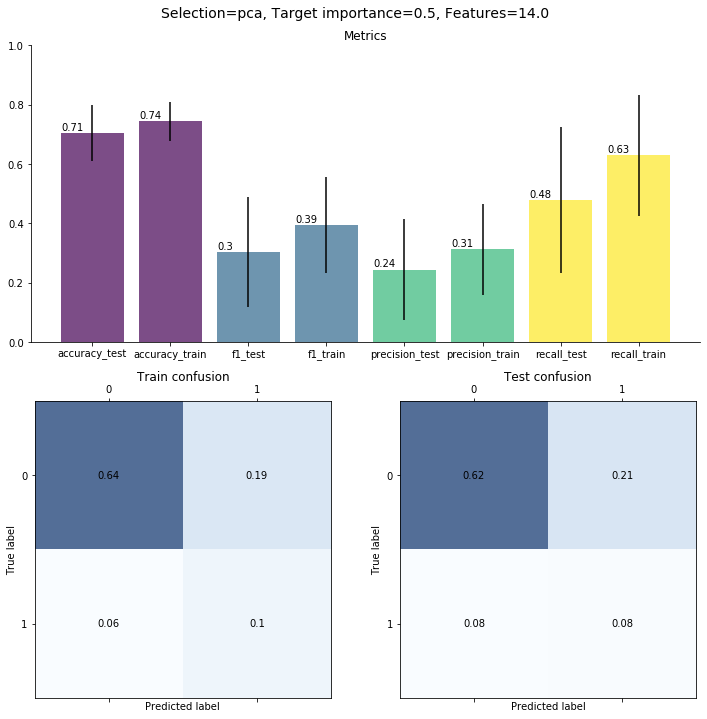

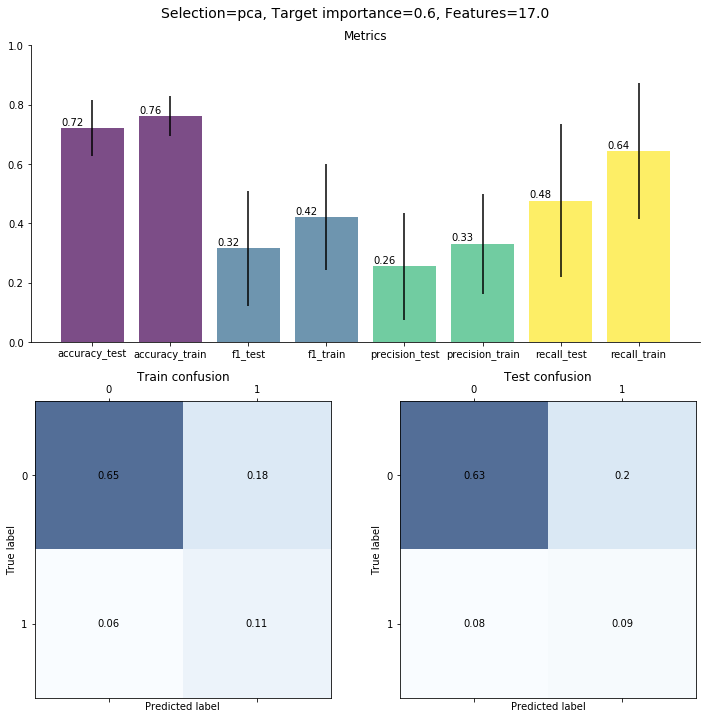

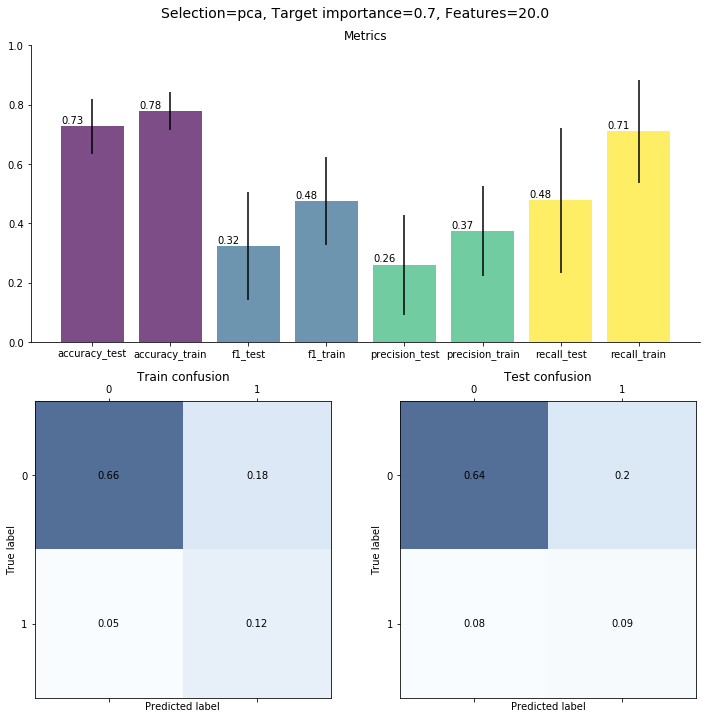

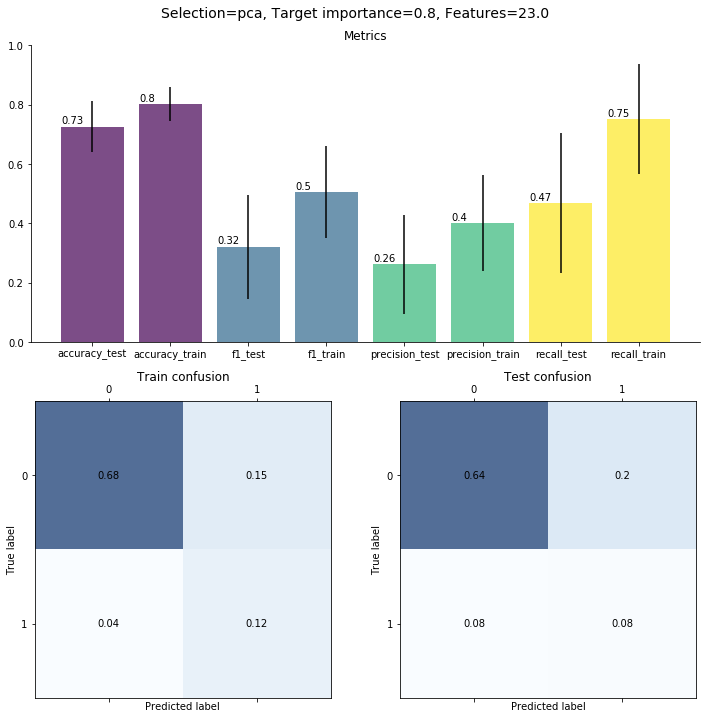

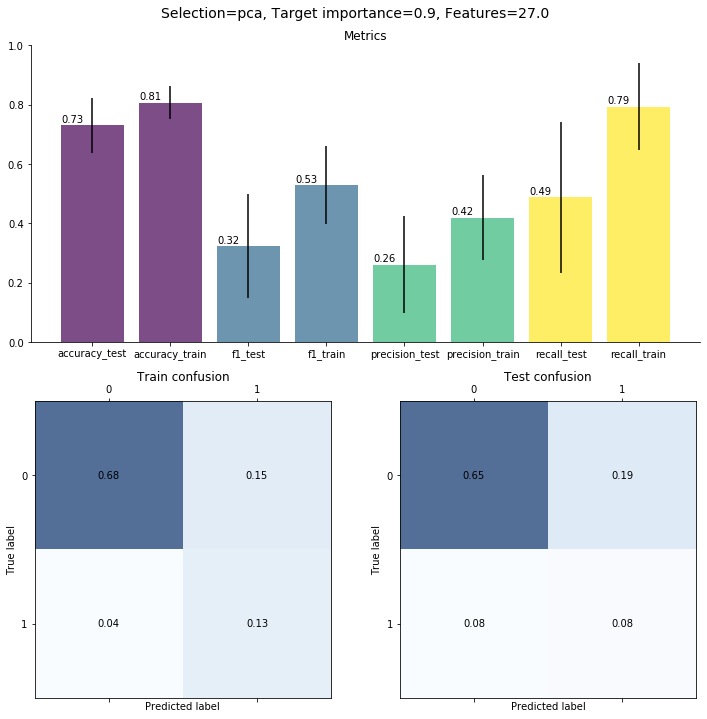

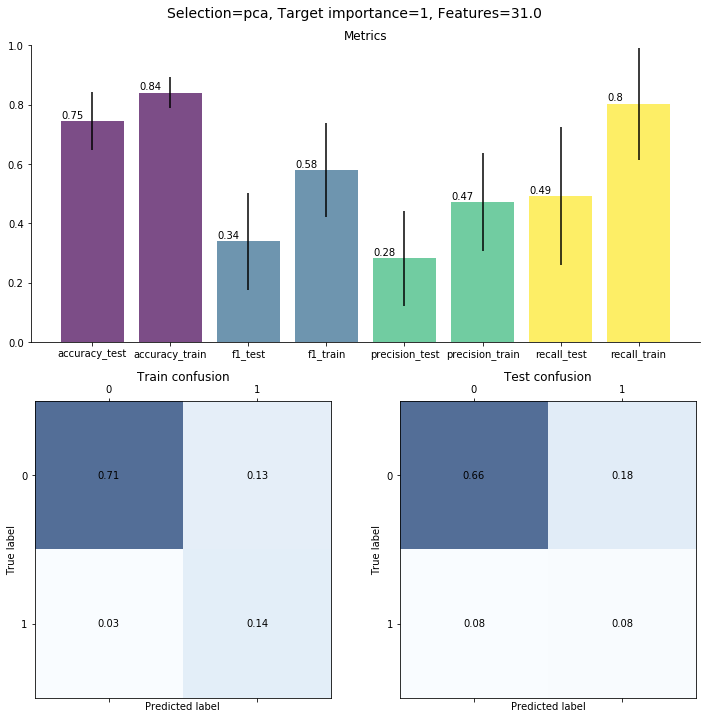

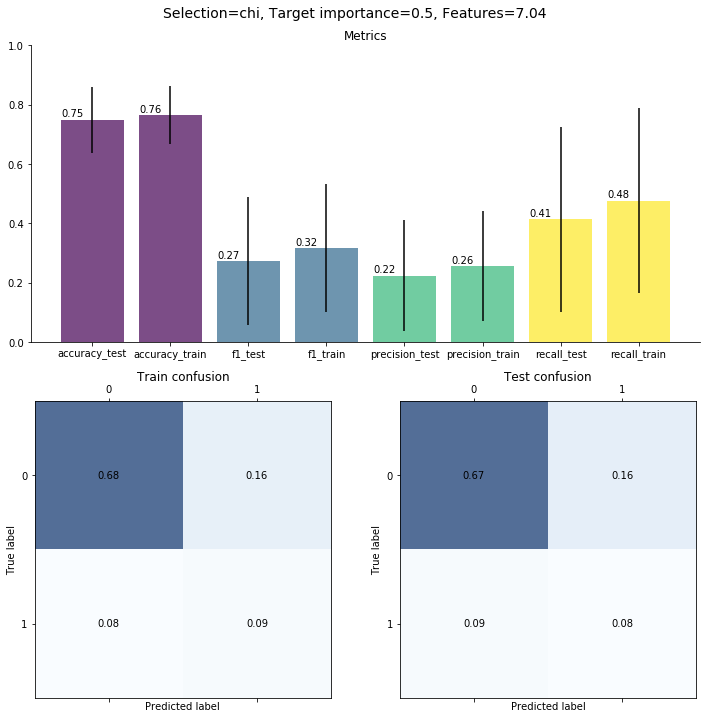

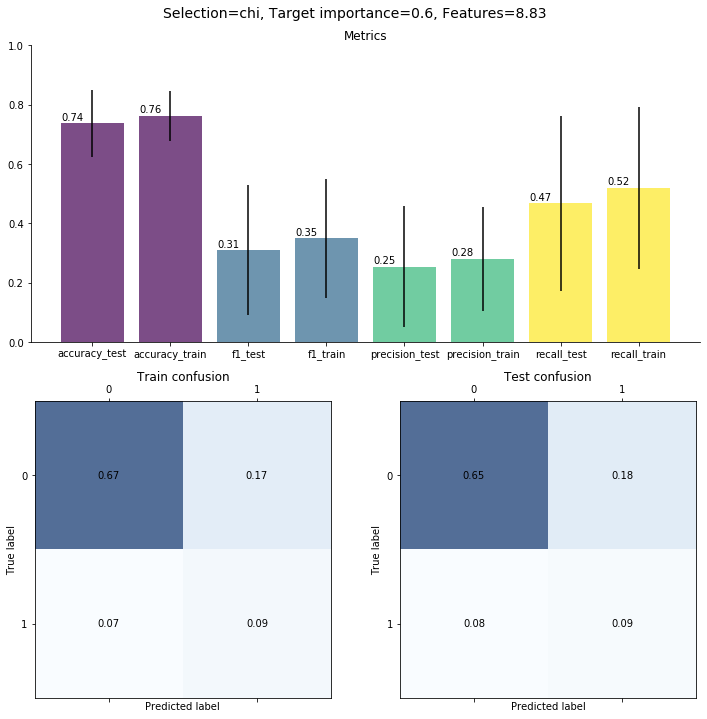

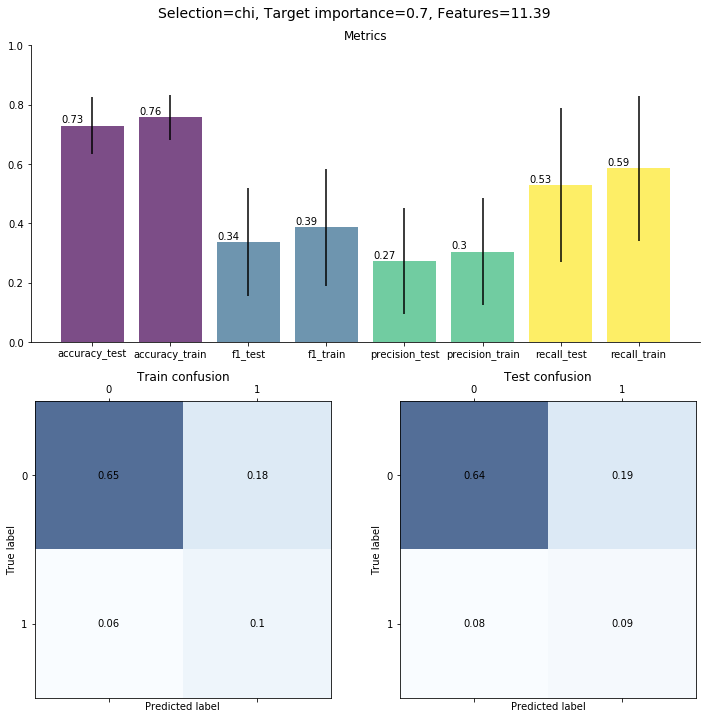

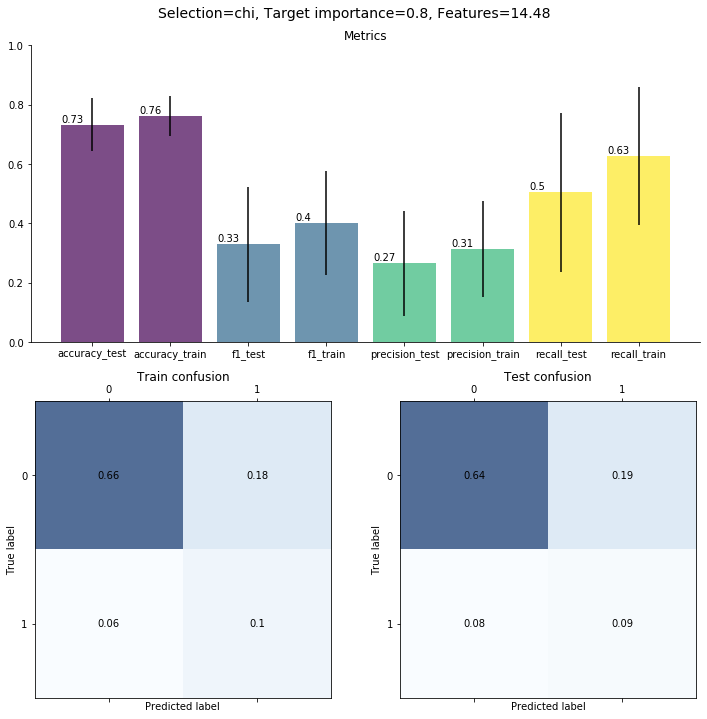

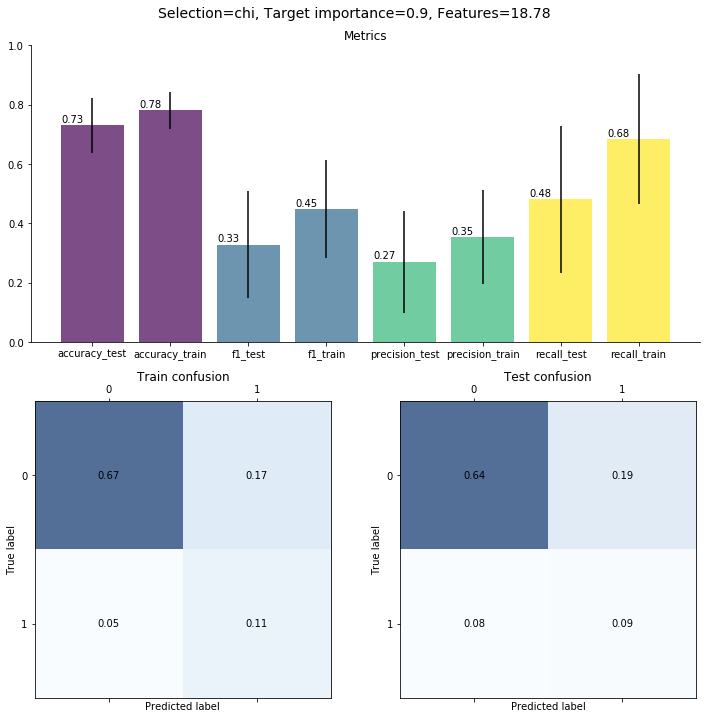

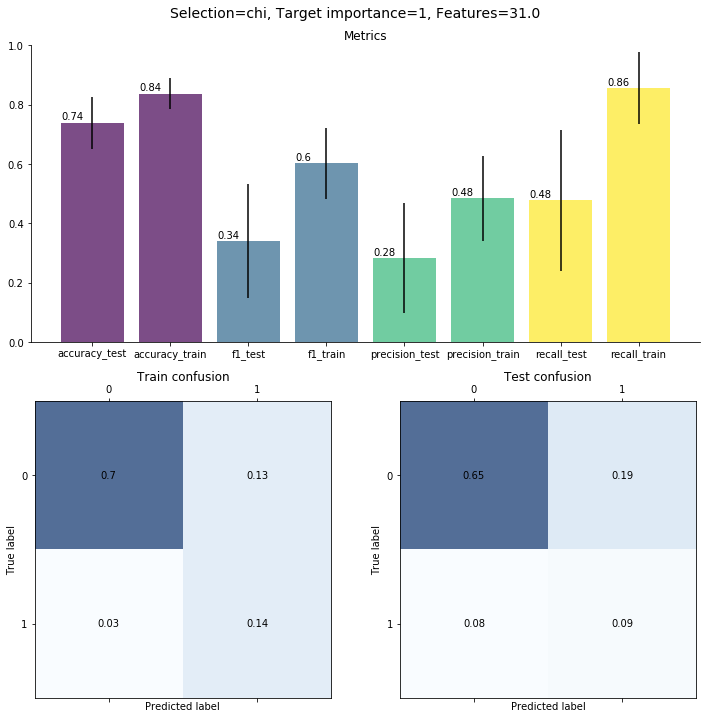

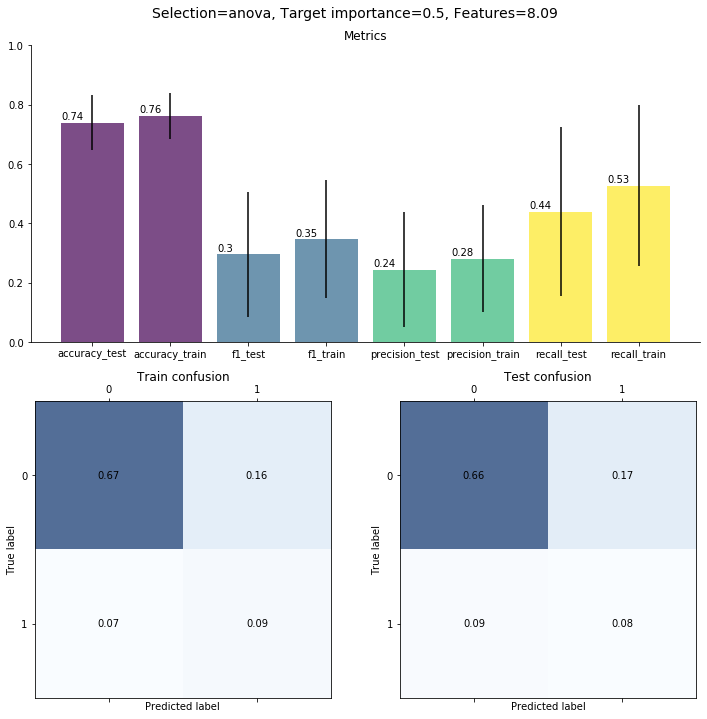

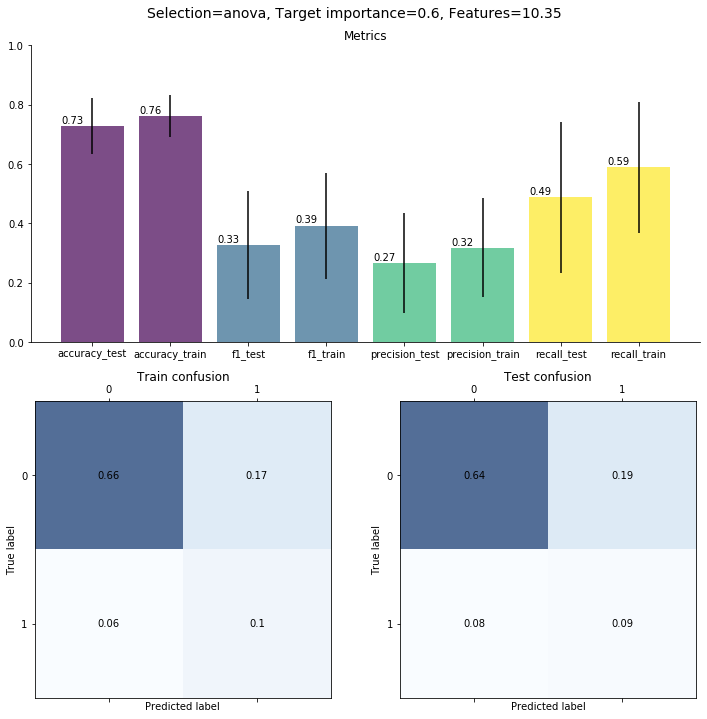

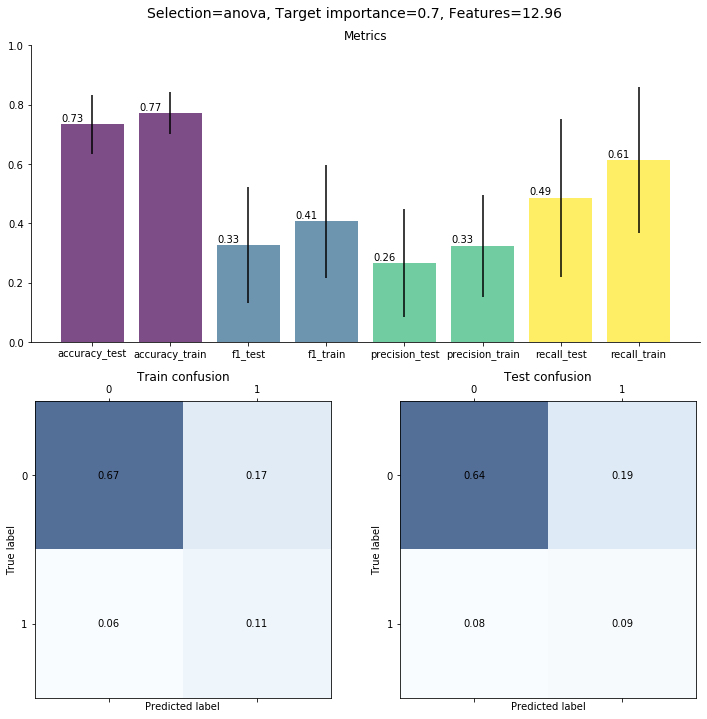

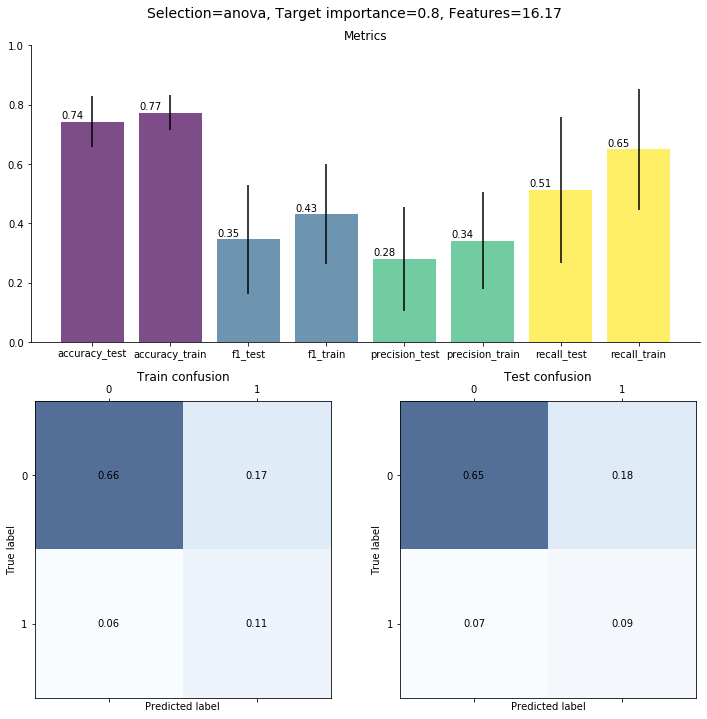

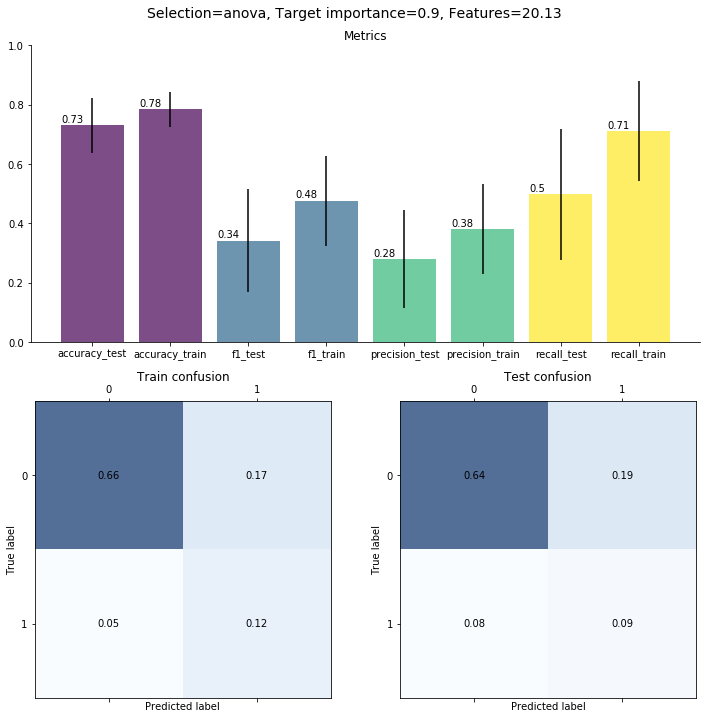

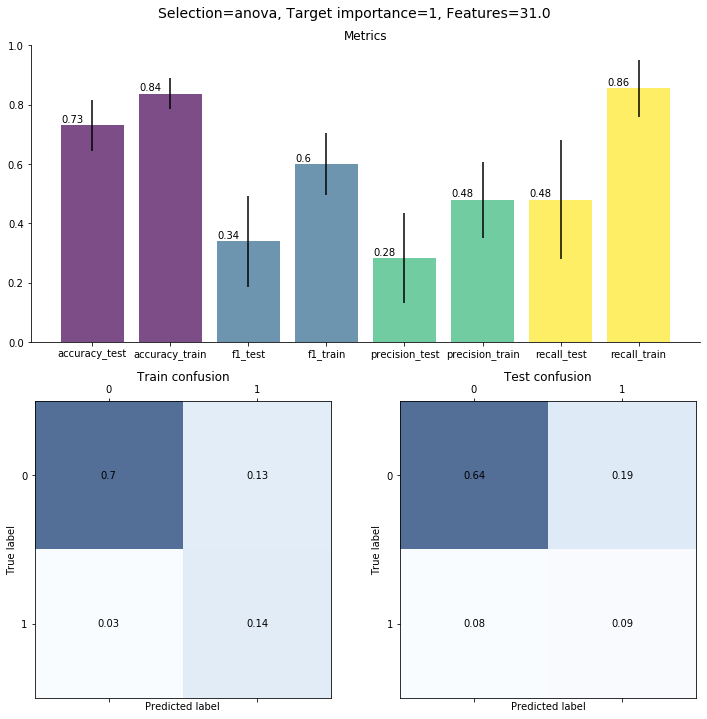

In [19]:
for selection in selections:
    for target_importance in target_importances:
        ev.evaluate_with_plots(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')

We need to focuse in two things. The first is the effect of the feature selection strategy; the second is the effect of the target importance. **As for the feature selection strategy, we can see that both 'anova' and 'chi' perform better than 'pca'**; not only they require less features to cover the same variance but these variables seem to be more appropriate, specially when it comes to generalisation. **As for the target importance, we find different behaviours depending on the feature selection strategy. In 'pca', the higher the target importance (the more features considered), the better the models perform. In 'anova' and 'chi', the behaviour is a bit more complex and, although more features always result in better train results, it doesn't always lead to better test result**. This is expected as more information leads to better fitting but not necessarily better generalisation. One thing to consider is that our neural networks are designed so that the number of features determines not only the input layer width but also the hidden layers width. This might affect our analysis so we could repeat the exploration fixing the hidden layers width (which we do in section 2.3)

### 2.1. Feature selection (with more features)

The difference is that we were considering features with less than 20% of missing values while now we include those with less than 25%.

In [20]:
selections = ['pca','chi','anova']
target_importances = [0.5,0.6,0.7,0.8,0.9,1]

In [21]:
parameters = pandas.read_csv('./Exploration/feature_selection_var1_parameters.csv')
train = pandas.read_csv('./Exploration/feature_selection_var1_train.csv')
test = pandas.read_csv('./Exploration/feature_selection_var1_test.csv')

In [22]:
table = pandas.DataFrame()
selection = 'pca'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=pca, Target importance=0.5, Features=17.0  \
accuracy_test                                        0.728+/-0.084    
accuracy_train                                       0.761+/-0.064    
f1_test                                              0.338+/-0.174    
f1_train                                             0.442+/-0.148    
precision_test                                       0.272+/-0.159    
precision_train                                      0.345+/-0.147    
recall_test                                          0.506+/-0.241    
recall_train                                         0.687+/-0.176    

                Selection=pca, Target importance=0.6, Features=20.0  \
accuracy_test                                        0.728+/-0.089    
accuracy_train                                       0.786+/-0.059    
f1_test                                              0.327+/-0.188    
f1_train                                             0.485+/-0.142    
precision_test                                       0.272+/-0.180    
precision_train                                      0.381+/-0.143    
recall_test                                          0.473+/-0.241    
recall_train                                         0.727+/-0.178    

                Selection=pca, Target importance=0.7, Features=24.0  \
accuracy_test                                        0.709+/-0.094    
accuracy_train                                       0.790+/-0.061    
f1_test                                              0.318+/-0.177    
f1_train                                             0.503+/-0.124    
precision_test                                       0.259+/-0.168    
precision_train                                      0.394+/-0.135    
recall_test                                          0.458+/-0.221    
recall_train                                         0.763+/-0.146    

                Selection=pca, Target importance=0.8, Features=28.0  \
accuracy_test                                        0.740+/-0.085    
accuracy_train                                       0.806+/-0.058    
f1_test                                              0.357+/-0.178    
f1_train                                             0.523+/-0.139    
precision_test                                       0.292+/-0.166    
precision_train                                      0.412+/-0.141    
recall_test                                          0.510+/-0.217    
recall_train                                         0.768+/-0.168    

                Selection=pca, Target importance=0.9, Features=32.0  \
accuracy_test                                        0.743+/-0.083    
accuracy_train                                       0.842+/-0.056    
f1_test                                              0.335+/-0.181    
f1_train                                             0.600+/-0.133    
precision_test                                       0.284+/-0.179    
precision_train                                      0.481+/-0.144    
recall_test                                          0.461+/-0.238    
recall_train                                         0.842+/-0.138    

                Selection=pca, Target importance=1, Features=37.0  
accuracy_test                                       0.747+/-0.093  
accuracy_train                                      0.859+/-0.053  
f1_test                                             0.359+/-0.180  
f1_train                                            0.653+/-0.117  
precision_test                                      0.307+/-0.181  
precision_train                                     0.538+/-0.151  
recall_test                                         0.484+/-0.222  
recall_train                                        0.874+/-0.077

In [23]:
table = pandas.DataFrame()
selection = 'anova'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=anova, Target importance=0.5, Features=9.3  \
accuracy_test                                        0.759+/-0.103     
accuracy_train                                       0.775+/-0.079     
f1_test                                              0.291+/-0.219     
f1_train                                             0.341+/-0.214     
precision_test                                       0.238+/-0.196     
precision_train                                      0.288+/-0.195     
recall_test                                          0.423+/-0.304     
recall_train                                         0.501+/-0.292     

                Selection=anova, Target importance=0.6, Features=11.96  \
accuracy_test                                        0.735+/-0.089       
accuracy_train                                       0.763+/-0.069       
f1_test                                              0.314+/-0.190       
f1_train                                             0.410+/-0.183       
precision_test                                       0.252+/-0.171       
precision_train                                      0.332+/-0.174       
recall_test                                          0.481+/-0.268       
recall_train                                         0.607+/-0.218       

                Selection=anova, Target importance=0.7, Features=15.09  \
accuracy_test                                        0.731+/-0.086       
accuracy_train                                       0.773+/-0.058       
f1_test                                              0.338+/-0.186       
f1_train                                             0.427+/-0.176       
precision_test                                       0.279+/-0.177       
precision_train                                      0.340+/-0.170       
recall_test                                          0.500+/-0.256       
recall_train                                         0.658+/-0.215       

                Selection=anova, Target importance=0.8, Features=18.78  \
accuracy_test                                        0.733+/-0.087       
accuracy_train                                       0.780+/-0.057       
f1_test                                              0.362+/-0.164       
f1_train                                             0.472+/-0.142       
precision_test                                       0.295+/-0.162       
precision_train                                      0.376+/-0.148       
recall_test                                          0.534+/-0.218       
recall_train                                         0.713+/-0.143       

                Selection=anova, Target importance=0.9, Features=23.48  \
accuracy_test                                        0.729+/-0.088       
accuracy_train                                       0.803+/-0.054       
f1_test                                              0.363+/-0.171       
f1_train                                             0.512+/-0.138       
precision_test                                       0.297+/-0.166       
precision_train                                      0.407+/-0.147       
recall_test                                          0.530+/-0.212       
recall_train                                         0.754+/-0.139       

                Selection=anova, Target importance=1, Features=37.0  
accuracy_test                                        0.752+/-0.092   
accuracy_train                                       0.864+/-0.046   
f1_test                                              0.349+/-0.175   
f1_train                                             0.645+/-0.124   
precision_test                                       0.296+/-0.165   
precision_train                                      0.532+/-0.151   
recall_test                                          0.462+/-0.226   
recall_train                                         0.863+/-0.115

In [24]:
table = pandas.DataFrame()
selection = 'chi'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=chi, Target importance=0.5, Features=8.22  \
accuracy_test                                        0.747+/-0.110    
accuracy_train                                       0.769+/-0.086    
f1_test                                              0.258+/-0.208    
f1_train                                             0.308+/-0.223    
precision_test                                       0.206+/-0.186    
precision_train                                      0.247+/-0.194    
recall_test                                          0.417+/-0.315    
recall_train                                         0.473+/-0.316    

                Selection=chi, Target importance=0.6, Features=10.57  \
accuracy_test                                        0.731+/-0.103     
accuracy_train                                       0.760+/-0.075     
f1_test                                              0.333+/-0.218     
f1_train                                             0.377+/-0.183     
precision_test                                       0.276+/-0.212     
precision_train                                      0.301+/-0.165     
recall_test                                          0.489+/-0.279     
recall_train                                         0.582+/-0.250     

                Selection=chi, Target importance=0.7, Features=13.39  \
accuracy_test                                        0.734+/-0.087     
accuracy_train                                       0.760+/-0.067     
f1_test                                              0.361+/-0.184     
f1_train                                             0.416+/-0.161     
precision_test                                       0.292+/-0.169     
precision_train                                      0.331+/-0.155     
recall_test                                          0.538+/-0.258     
recall_train                                         0.634+/-0.198     

                Selection=chi, Target importance=0.8, Features=17.13  \
accuracy_test                                        0.733+/-0.097     
accuracy_train                                       0.779+/-0.064     
f1_test                                              0.328+/-0.184     
f1_train                                             0.436+/-0.186     
precision_test                                       0.262+/-0.167     
precision_train                                      0.344+/-0.176     
recall_test                                          0.505+/-0.264     
recall_train                                         0.654+/-0.231     

                Selection=chi, Target importance=0.9, Features=22.04  \
accuracy_test                                        0.734+/-0.084     
accuracy_train                                       0.787+/-0.057     
f1_test                                              0.365+/-0.171     
f1_train                                             0.501+/-0.124     
precision_test                                       0.294+/-0.166     
precision_train                                      0.394+/-0.140     
recall_test                                          0.550+/-0.225     
recall_train                                         0.753+/-0.113     

                Selection=chi, Target importance=1, Features=37.0  
accuracy_test                                       0.742+/-0.093  
accuracy_train                                      0.858+/-0.050  
f1_test                                             0.337+/-0.169  
f1_train                                            0.641+/-0.123  
precision_test                                      0.287+/-0.166  
precision_train                                     0.528+/-0.153  
recall_test                                         0.453+/-0.206  
recall_train                                        0.864+/-0.117

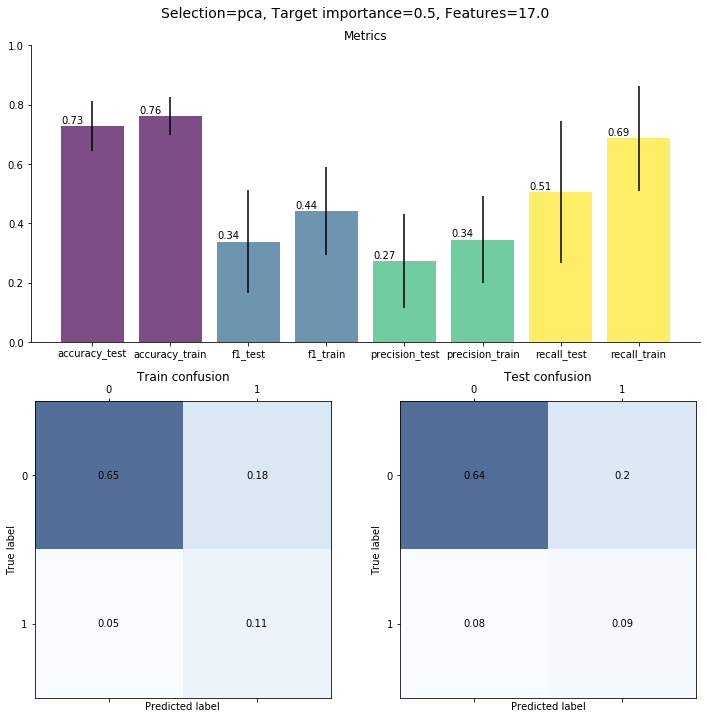

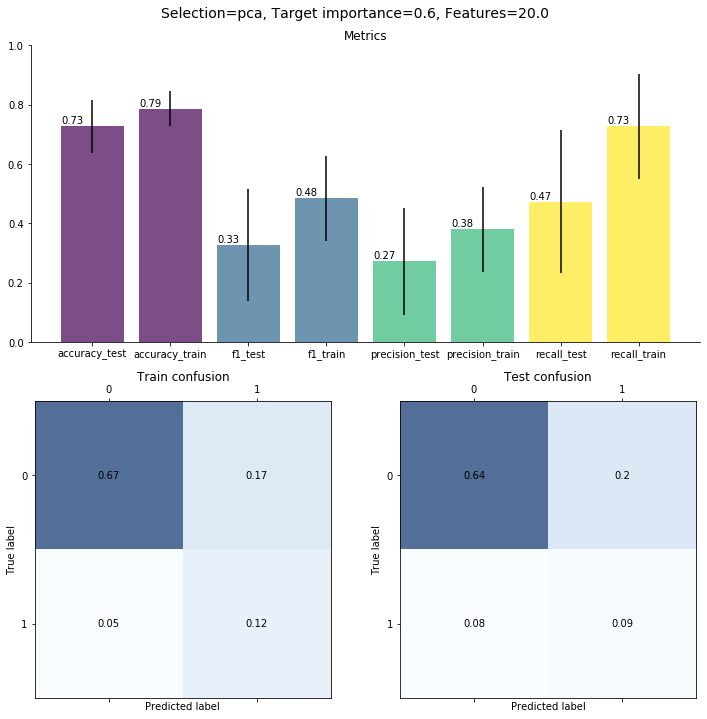

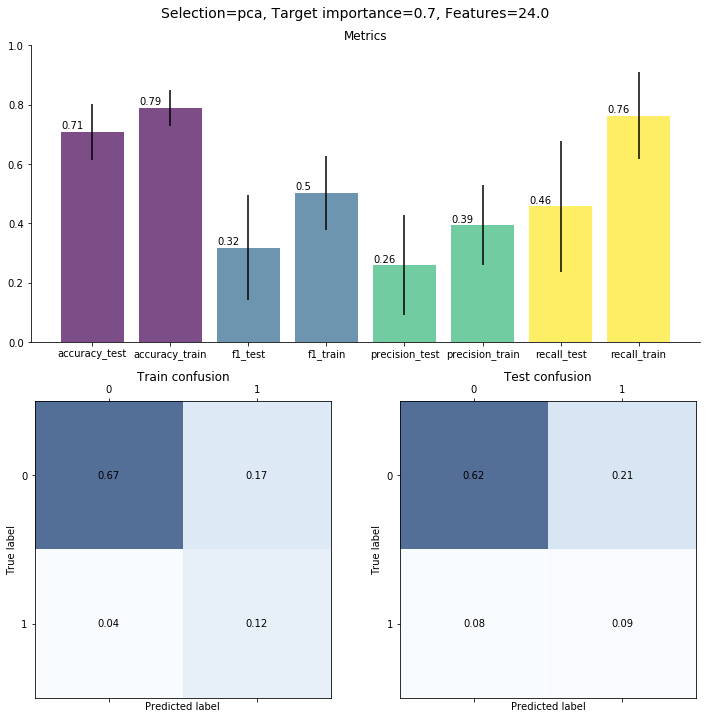

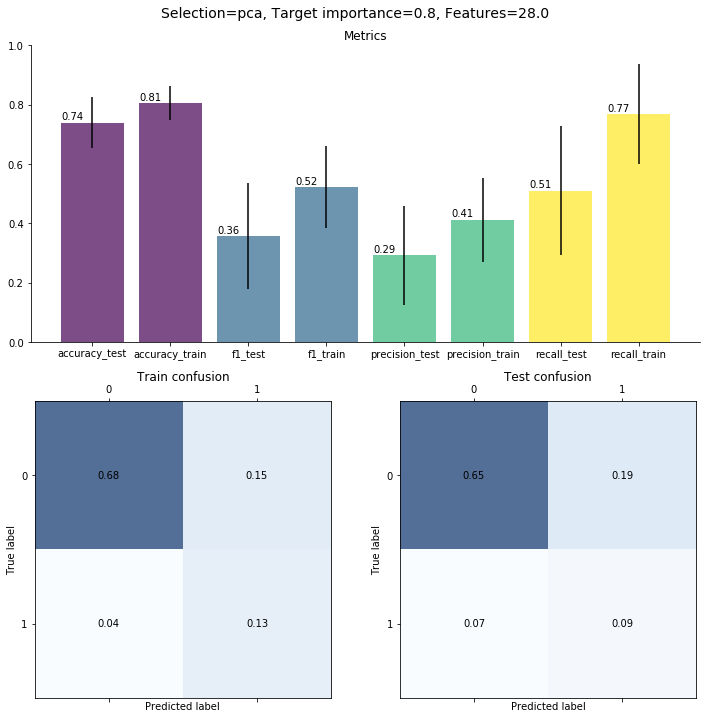

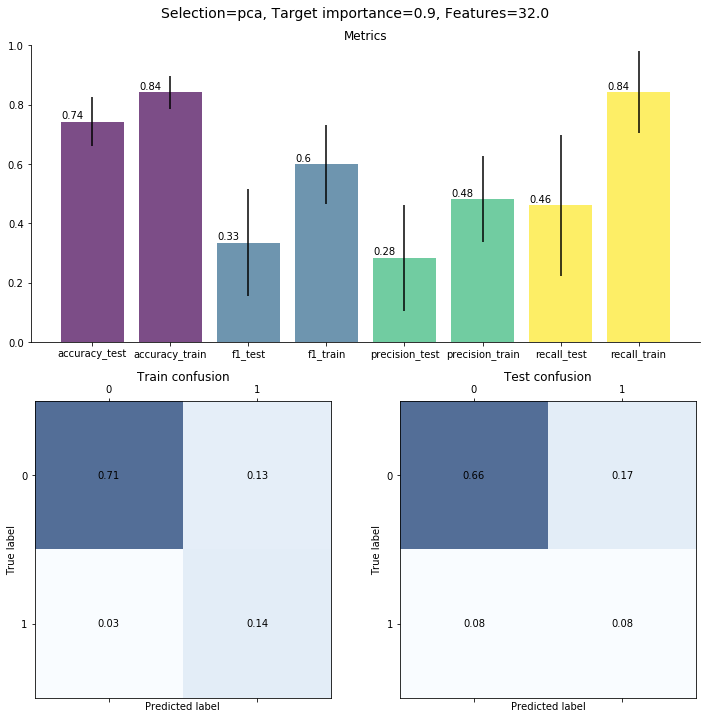

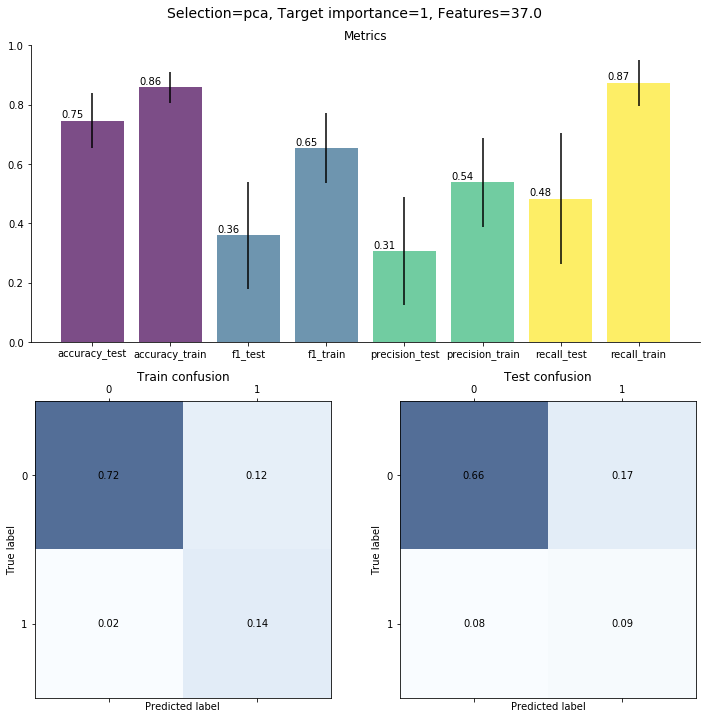

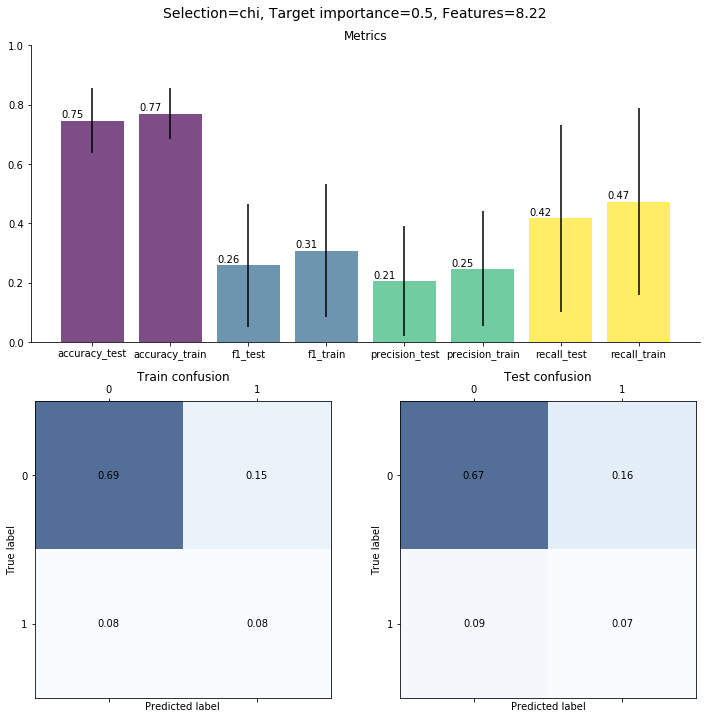

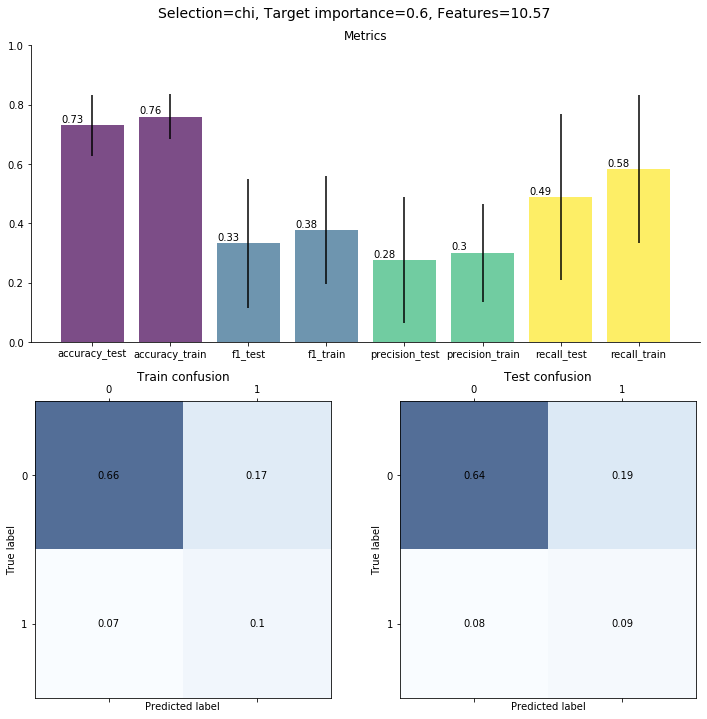

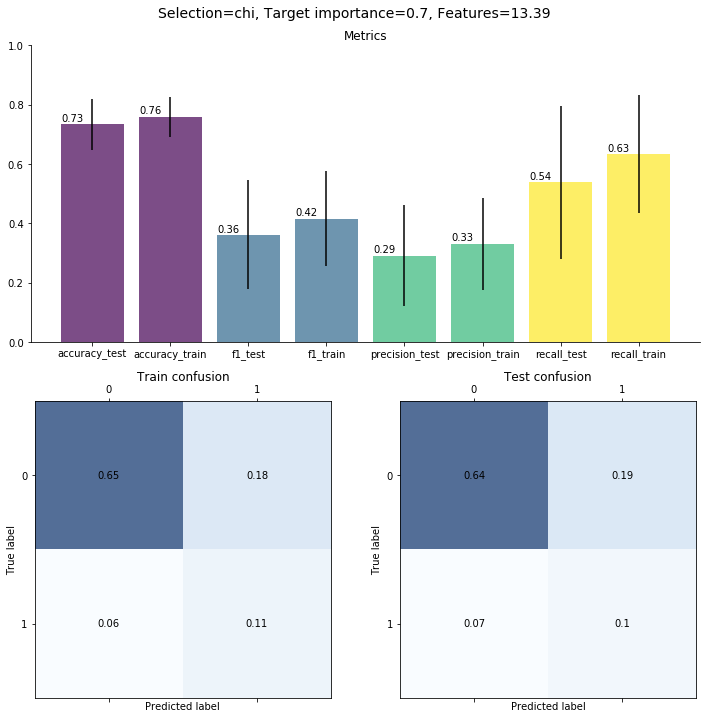

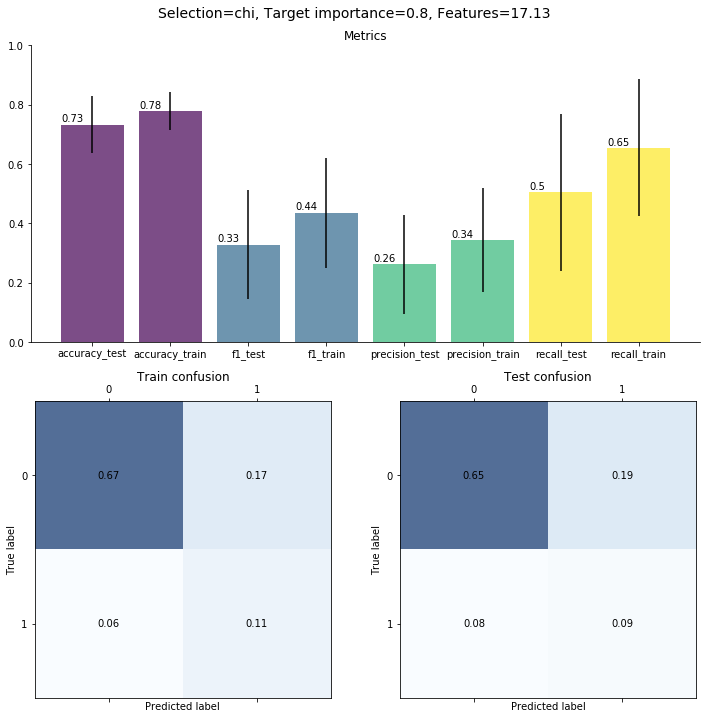

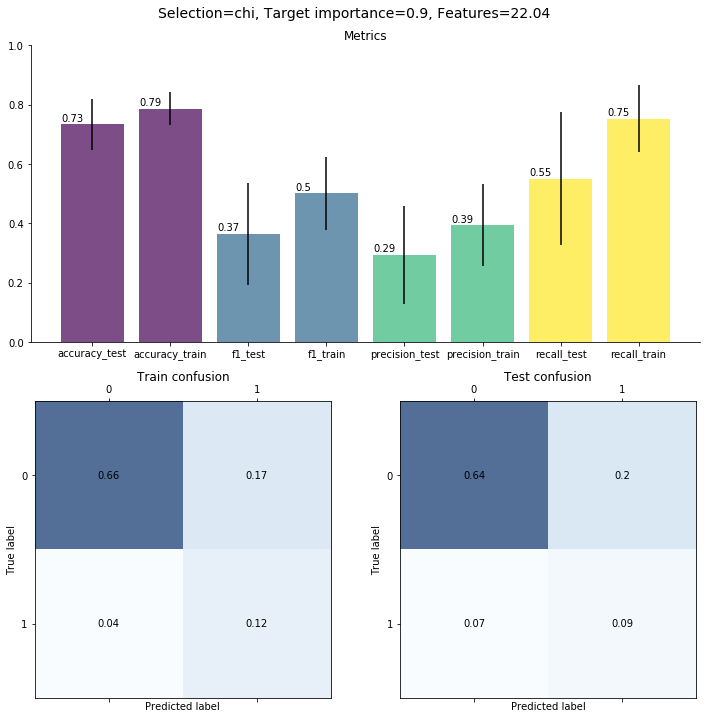

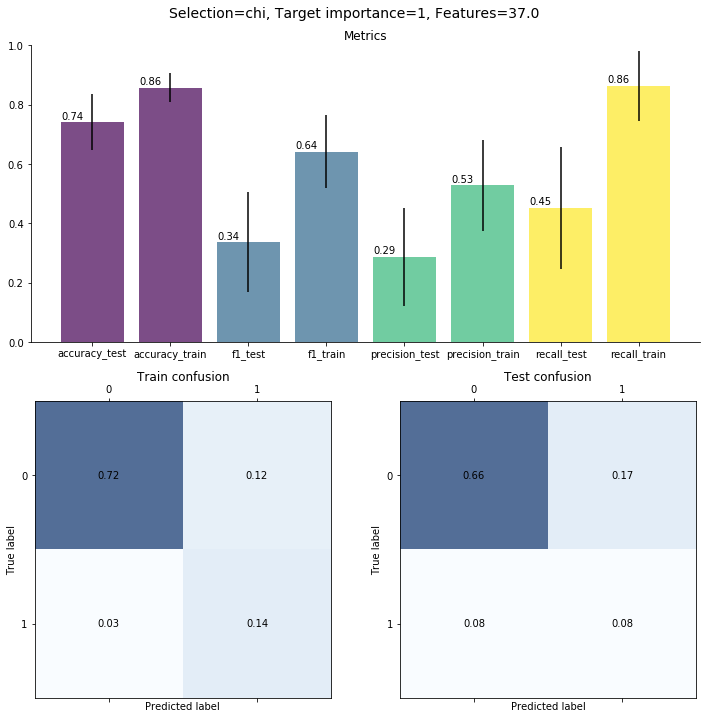

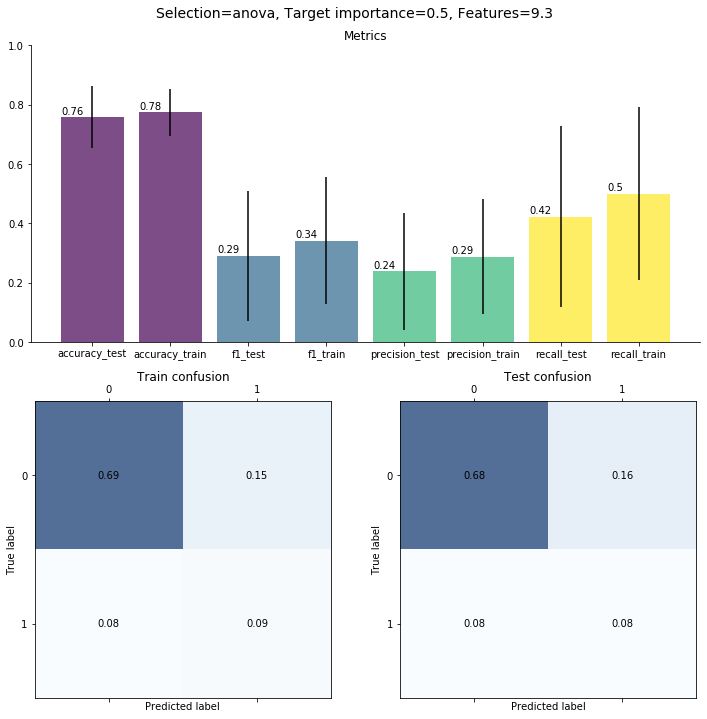

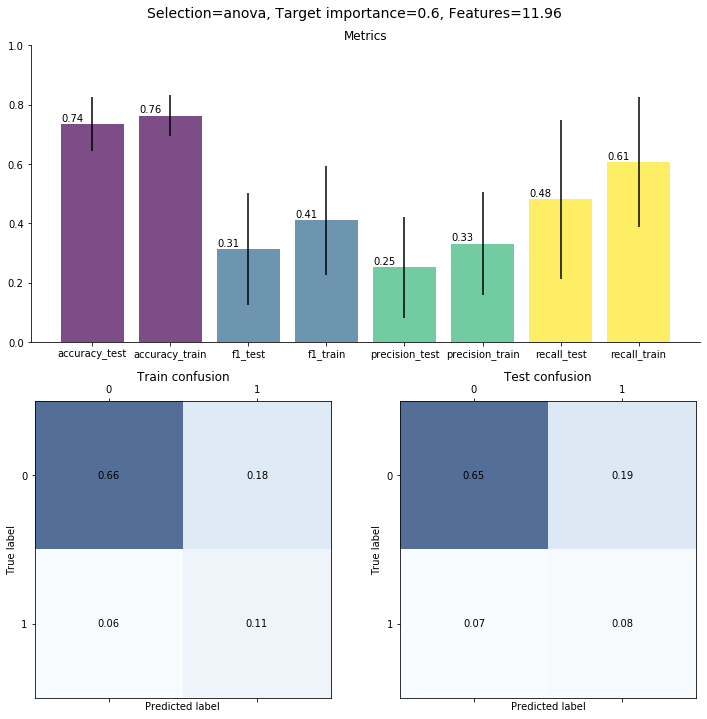

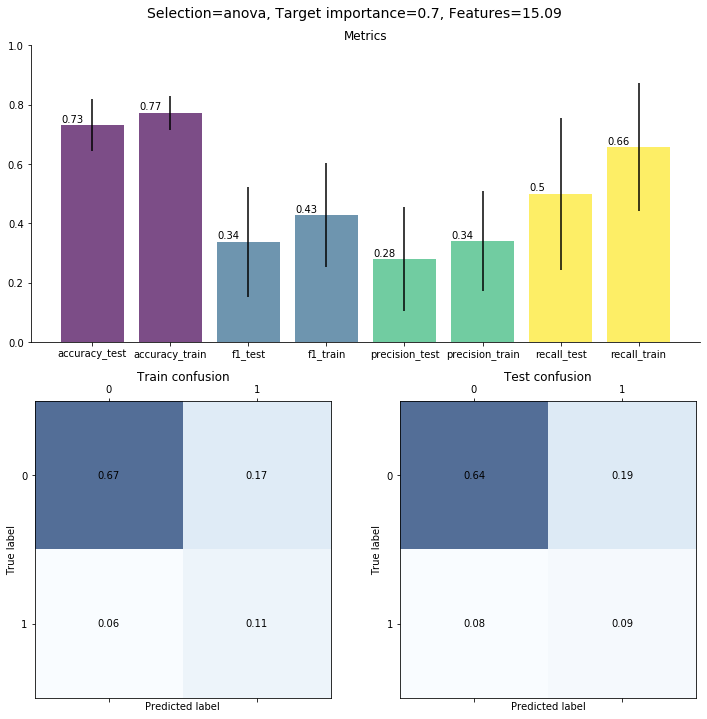

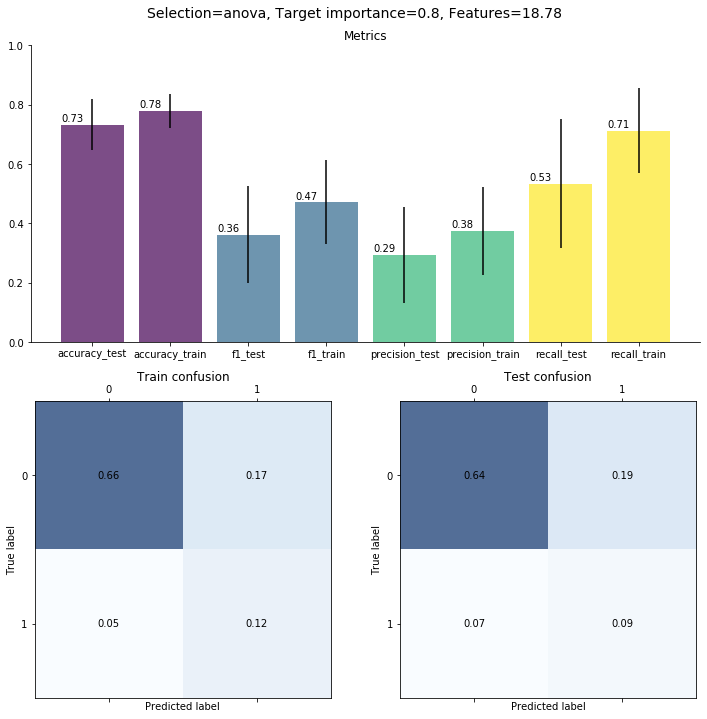

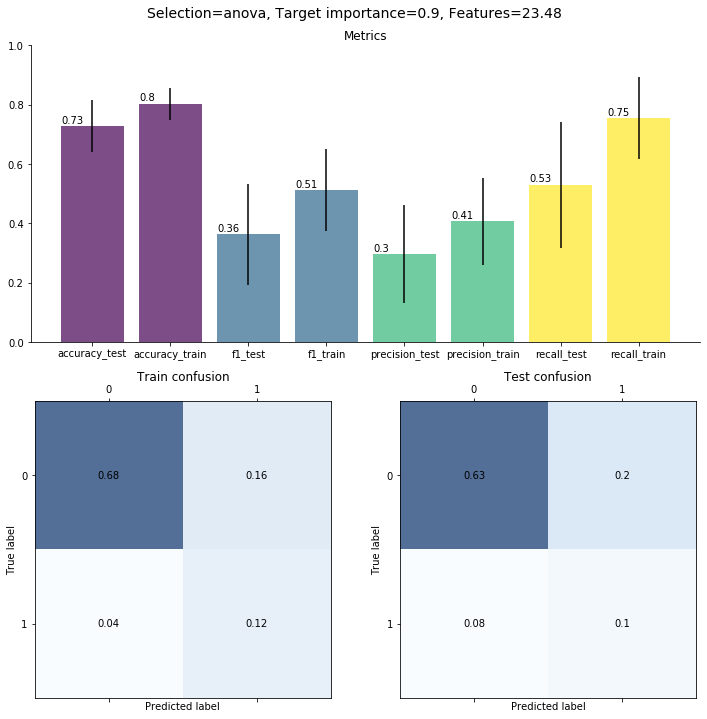

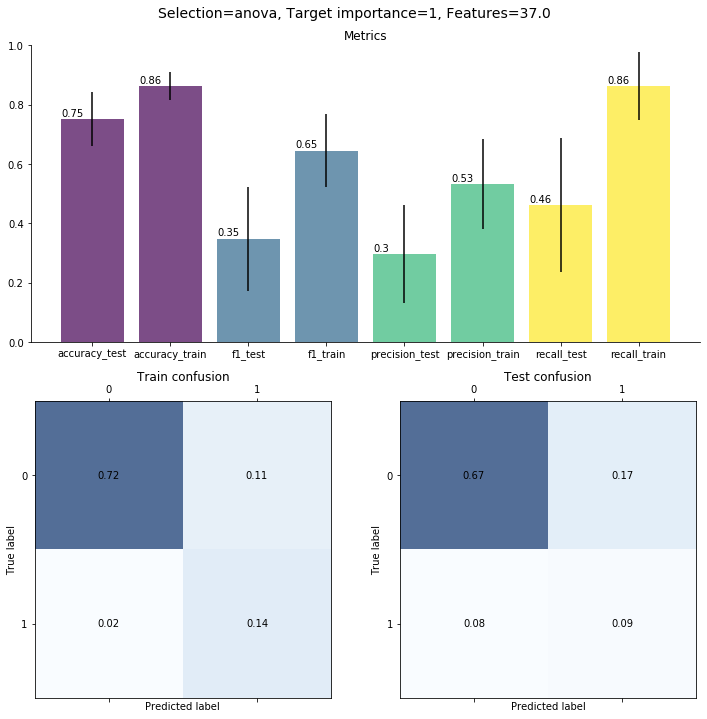

In [25]:
for selection in selections:
    for target_importance in target_importances:
        ev.evaluate_with_plots(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')

What we can see is that there is some sort of general improvement by considering more features. This is much clearer in 'pca' than in 'anova' and 'chi', where there are some scenarios in which no improvement is seen. This makes sense if we recall what we explained before: if the feature selection is appropriate, more features doesn't necessarily lead to better generalisation.

### 2.2. Feature selection (with even more features)

The difference is that we were considering features with less than 25% of missing values while now we include those with less than 30%.

In [26]:
selections = ['pca','chi','anova']
target_importances = [0.5,0.6,0.7,0.8,0.9,1]

In [27]:
parameters = pandas.read_csv('./Exploration/feature_selection_var2_parameters.csv')
train = pandas.read_csv('./Exploration/feature_selection_var2_train.csv')
test = pandas.read_csv('./Exploration/feature_selection_var2_test.csv')

In [28]:
table = pandas.DataFrame()
selection = 'pca'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=pca, Target importance=0.5, Features=19.0  \
accuracy_test                                        0.725+/-0.094    
accuracy_train                                       0.775+/-0.066    
f1_test                                              0.323+/-0.184    
f1_train                                             0.443+/-0.156    
precision_test                                       0.263+/-0.176    
precision_train                                      0.352+/-0.155    
recall_test                                          0.481+/-0.245    
recall_train                                         0.675+/-0.207    

                Selection=pca, Target importance=0.6, Features=23.0  \
accuracy_test                                        0.724+/-0.088    
accuracy_train                                       0.792+/-0.056    
f1_test                                              0.351+/-0.181    
f1_train                                             0.514+/-0.132    
precision_test                                       0.288+/-0.178    
precision_train                                      0.405+/-0.150    
recall_test                                          0.505+/-0.210    
recall_train                                         0.776+/-0.116    

                Selection=pca, Target importance=0.7, Features=28.0  \
accuracy_test                                        0.727+/-0.093    
accuracy_train                                       0.813+/-0.056    
f1_test                                              0.317+/-0.175    
f1_train                                             0.529+/-0.151    
precision_test                                       0.259+/-0.166    
precision_train                                      0.421+/-0.152    
recall_test                                          0.457+/-0.226    
recall_train                                         0.767+/-0.193    

                Selection=pca, Target importance=0.8, Features=32.0  \
accuracy_test                                        0.746+/-0.087    
accuracy_train                                       0.845+/-0.049    
f1_test                                              0.333+/-0.190    
f1_train                                             0.612+/-0.108    
precision_test                                       0.287+/-0.192    
precision_train                                      0.492+/-0.128    
recall_test                                          0.449+/-0.218    
recall_train                                         0.856+/-0.113    

                Selection=pca, Target importance=0.9, Features=37.0  \
accuracy_test                                        0.759+/-0.079    
accuracy_train                                       0.854+/-0.049    
f1_test                                              0.365+/-0.163    
f1_train                                             0.633+/-0.105    
precision_test                                       0.308+/-0.164    
precision_train                                      0.513+/-0.134    
recall_test                                          0.492+/-0.203    
recall_train                                         0.880+/-0.084    

                Selection=pca, Target importance=1, Features=43.0  
accuracy_test                                       0.754+/-0.091  
accuracy_train                                      0.888+/-0.041  
f1_test                                             0.340+/-0.189  
f1_train                                            0.704+/-0.103  
precision_test                                      0.287+/-0.176  
precision_train                                     0.589+/-0.124  
recall_test                                         0.456+/-0.246  
recall_train                                        0.910+/-0.072

In [29]:
table = pandas.DataFrame()
selection = 'anova'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=anova, Target importance=0.5, Features=10.74  \
accuracy_test                                        0.734+/-0.088       
accuracy_train                                       0.765+/-0.067       
f1_test                                              0.336+/-0.194       
f1_train                                             0.400+/-0.181       
precision_test                                       0.271+/-0.179       
precision_train                                      0.324+/-0.173       
recall_test                                          0.509+/-0.262       
recall_train                                         0.607+/-0.225       

                Selection=anova, Target importance=0.6, Features=13.7  \
accuracy_test                                        0.743+/-0.096      
accuracy_train                                       0.781+/-0.071      
f1_test                                              0.325+/-0.198      
f1_train                                             0.415+/-0.192      
precision_test                                       0.266+/-0.184      
precision_train                                      0.336+/-0.177      
recall_test                                          0.473+/-0.259      
recall_train                                         0.613+/-0.251      

                Selection=anova, Target importance=0.7, Features=17.17  \
accuracy_test                                        0.742+/-0.085       
accuracy_train                                       0.778+/-0.057       
f1_test                                              0.367+/-0.185       
f1_train                                             0.453+/-0.170       
precision_test                                       0.301+/-0.177       
precision_train                                      0.361+/-0.162       
recall_test                                          0.533+/-0.239       
recall_train                                         0.678+/-0.191       

                Selection=anova, Target importance=0.8, Features=21.35  \
accuracy_test                                        0.732+/-0.091       
accuracy_train                                       0.792+/-0.055       
f1_test                                              0.344+/-0.179       
f1_train                                             0.491+/-0.162       
precision_test                                       0.280+/-0.166       
precision_train                                      0.386+/-0.161       
recall_test                                          0.490+/-0.224       
recall_train                                         0.743+/-0.180       

                Selection=anova, Target importance=0.9, Features=27.0  \
accuracy_test                                        0.731+/-0.083      
accuracy_train                                       0.814+/-0.051      
f1_test                                              0.343+/-0.163      
f1_train                                             0.543+/-0.142      
precision_test                                       0.280+/-0.151      
precision_train                                      0.429+/-0.153      
recall_test                                          0.493+/-0.216      
recall_train                                         0.803+/-0.140      

                Selection=anova, Target importance=1, Features=43.0  
accuracy_test                                        0.758+/-0.090   
accuracy_train                                       0.889+/-0.044   
f1_test                                              0.366+/-0.184   
f1_train                                             0.715+/-0.086   
precision_test                                       0.306+/-0.177   
precision_train                                      0.597+/-0.124   
recall_test                                          0.499+/-0.238   
recall_train                                         0.923+/-0.066

In [30]:
table = pandas.DataFrame()
selection = 'chi'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=chi, Target importance=0.5, Features=9.04  \
accuracy_test                                        0.738+/-0.104    
accuracy_train                                       0.760+/-0.079    
f1_test                                              0.314+/-0.207    
f1_train                                             0.362+/-0.198    
precision_test                                       0.255+/-0.188    
precision_train                                      0.299+/-0.186    
recall_test                                          0.469+/-0.288    
recall_train                                         0.545+/-0.265    

                Selection=chi, Target importance=0.6, Features=11.74  \
accuracy_test                                        0.725+/-0.088     
accuracy_train                                       0.753+/-0.066     
f1_test                                              0.351+/-0.168     
f1_train                                             0.415+/-0.161     
precision_test                                       0.281+/-0.164     
precision_train                                      0.326+/-0.158     
recall_test                                          0.554+/-0.240     
recall_train                                         0.639+/-0.183     

                Selection=chi, Target importance=0.7, Features=15.09  \
accuracy_test                                        0.734+/-0.087     
accuracy_train                                       0.772+/-0.061     
f1_test                                              0.336+/-0.195     
f1_train                                             0.417+/-0.181     
precision_test                                       0.269+/-0.181     
precision_train                                      0.337+/-0.170     
recall_test                                          0.524+/-0.272     
recall_train                                         0.639+/-0.234     

                Selection=chi, Target importance=0.8, Features=19.39  \
accuracy_test                                        0.743+/-0.089     
accuracy_train                                       0.790+/-0.055     
f1_test                                              0.343+/-0.172     
f1_train                                             0.454+/-0.192     
precision_test                                       0.276+/-0.165     
precision_train                                      0.364+/-0.182     
recall_test                                          0.533+/-0.249     
recall_train                                         0.679+/-0.231     

                Selection=chi, Target importance=0.9, Features=25.26  \
accuracy_test                                        0.737+/-0.091     
accuracy_train                                       0.807+/-0.053     
f1_test                                              0.363+/-0.168     
f1_train                                             0.530+/-0.131     
precision_test                                       0.296+/-0.163     
precision_train                                      0.421+/-0.145     
recall_test                                          0.538+/-0.233     
recall_train                                         0.781+/-0.122     

                Selection=chi, Target importance=1, Features=43.0  
accuracy_test                                       0.756+/-0.086  
accuracy_train                                      0.888+/-0.045  
f1_test                                             0.347+/-0.171  
f1_train                                            0.693+/-0.144  
precision_test                                      0.297+/-0.173  
precision_train                                     0.579+/-0.151  
recall_test                                         0.464+/-0.204  
recall_train                                        0.888+/-0.159

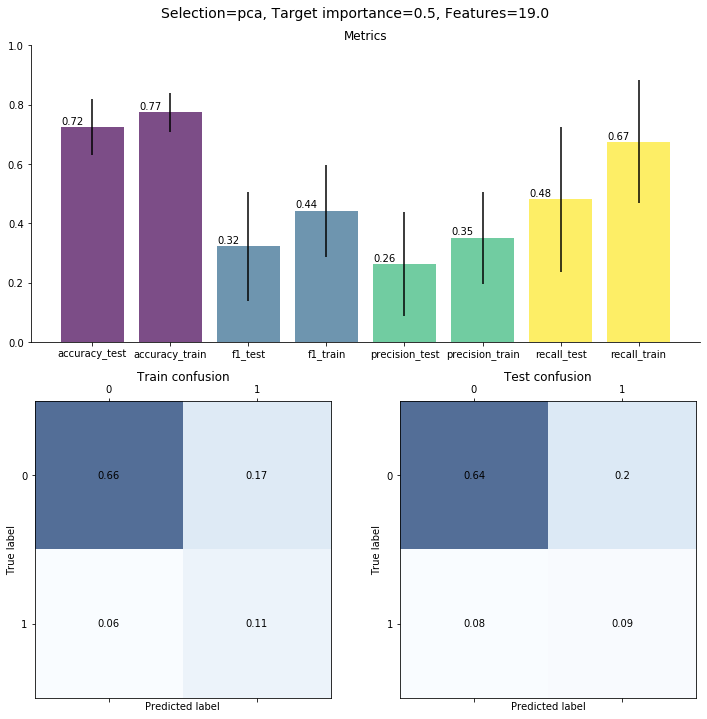

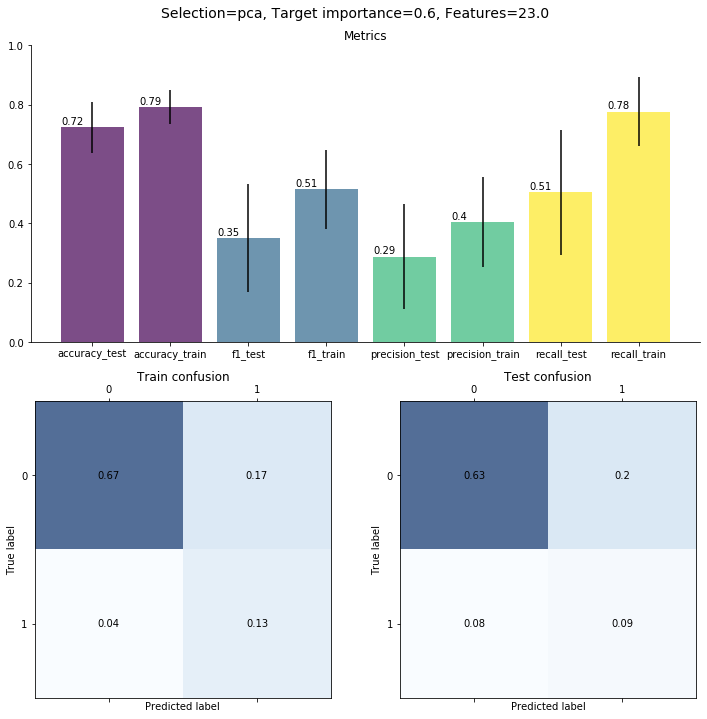

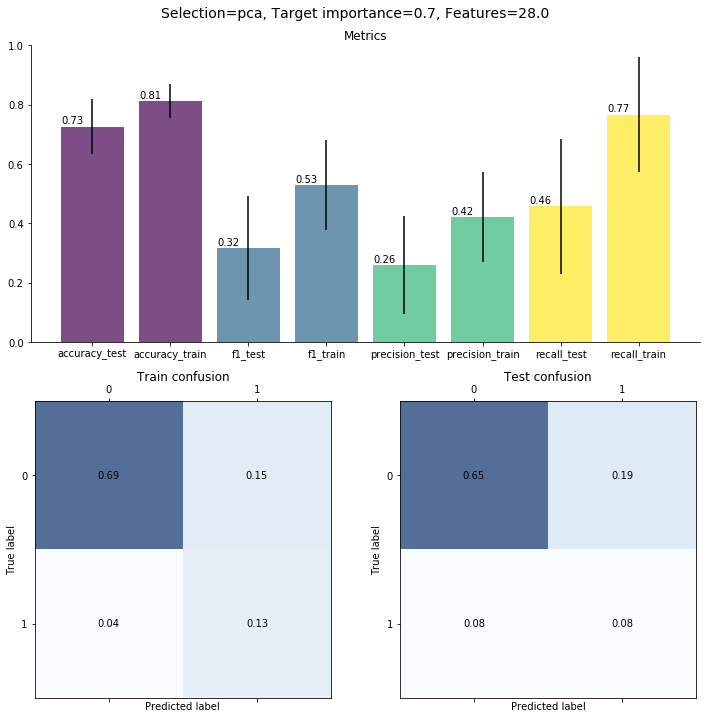

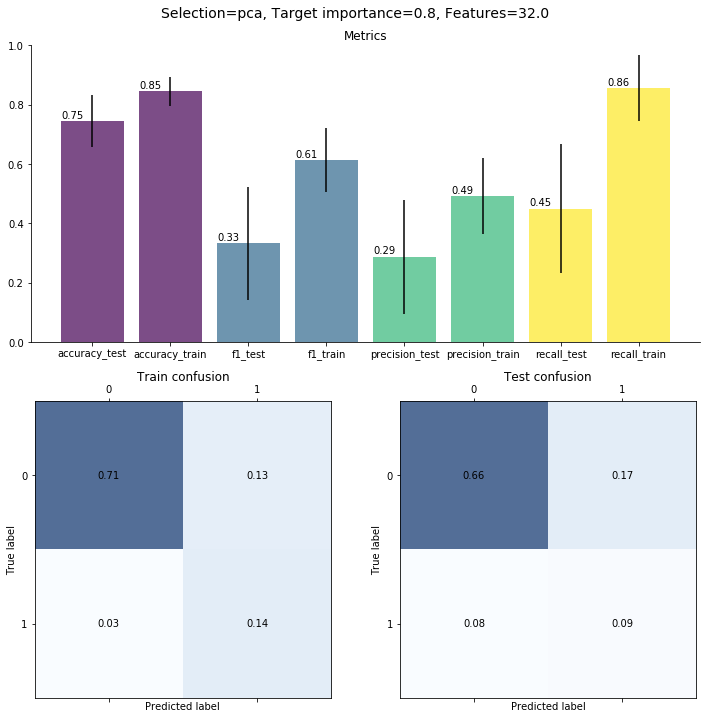

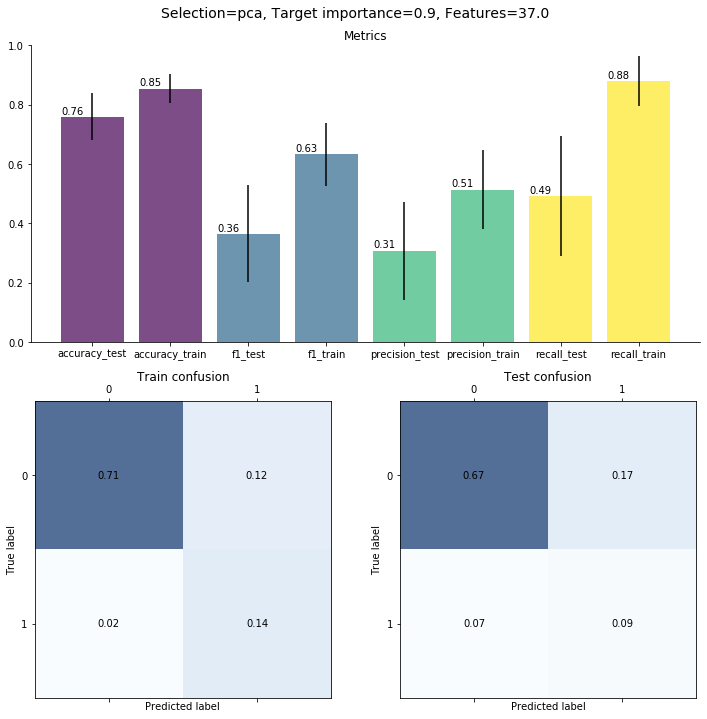

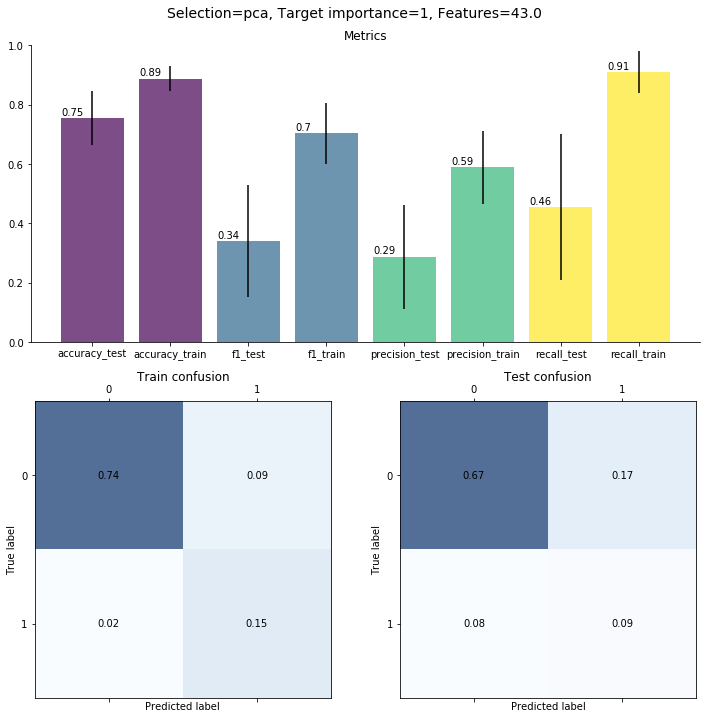

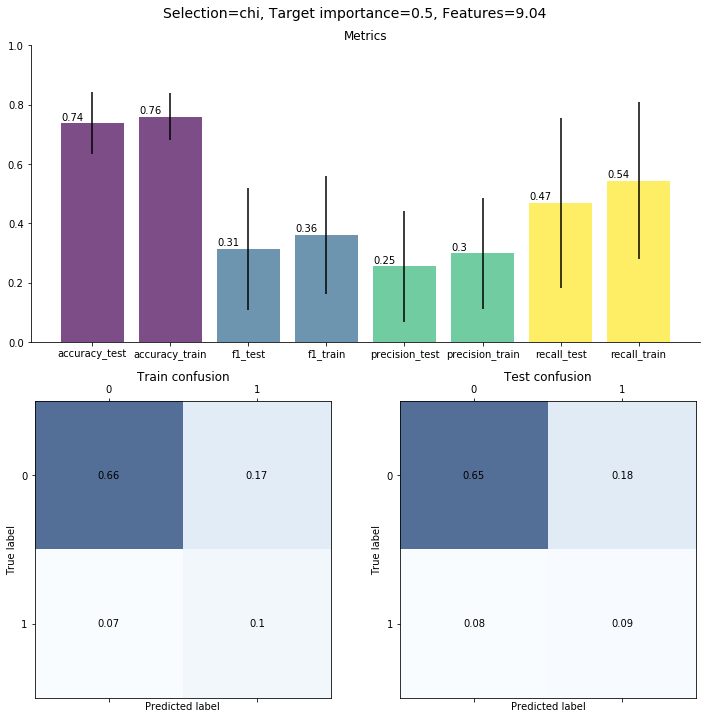

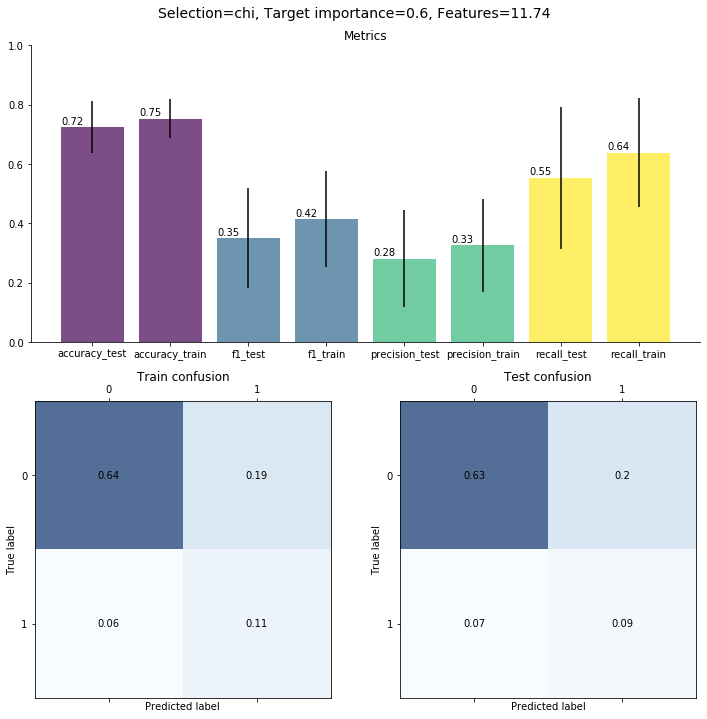

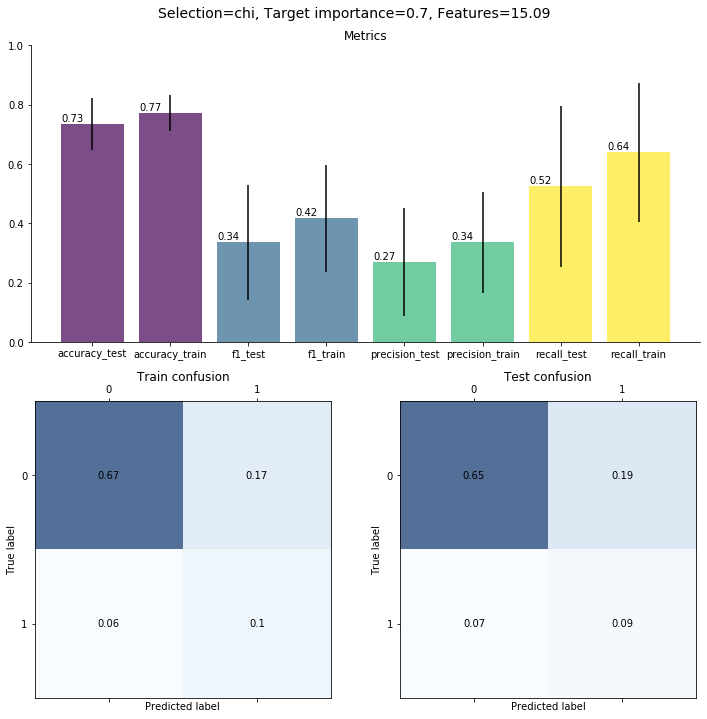

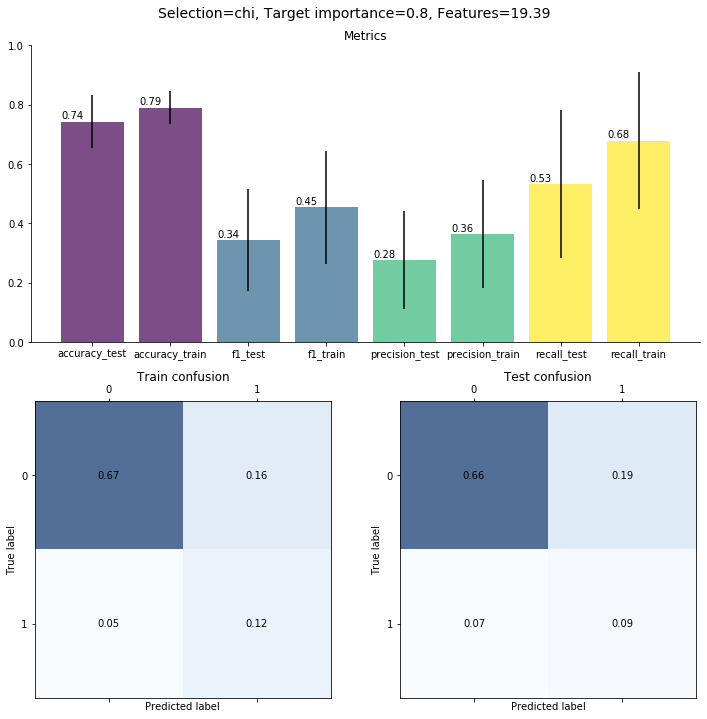

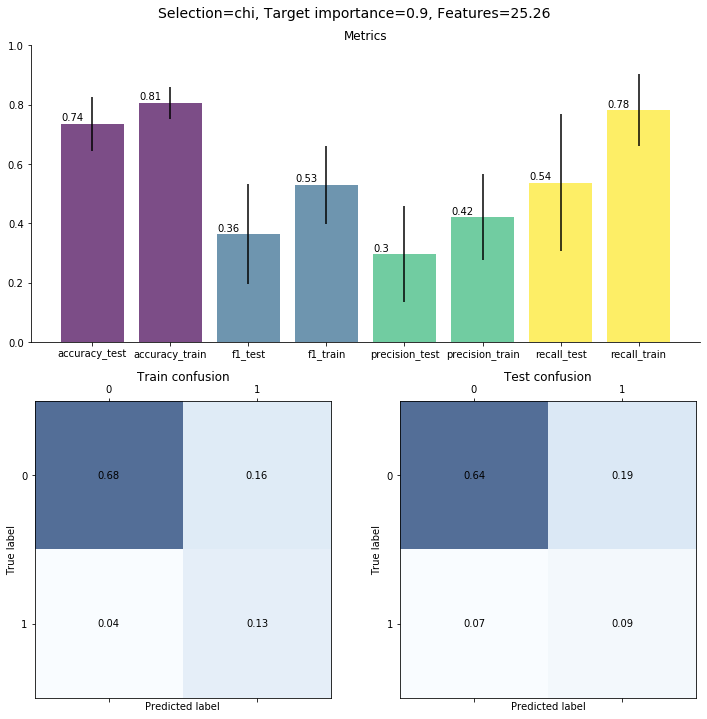

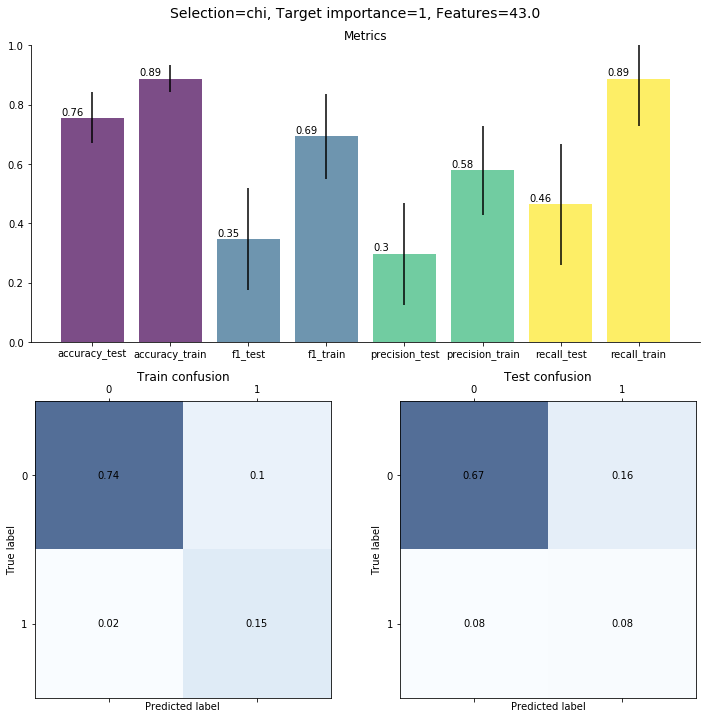

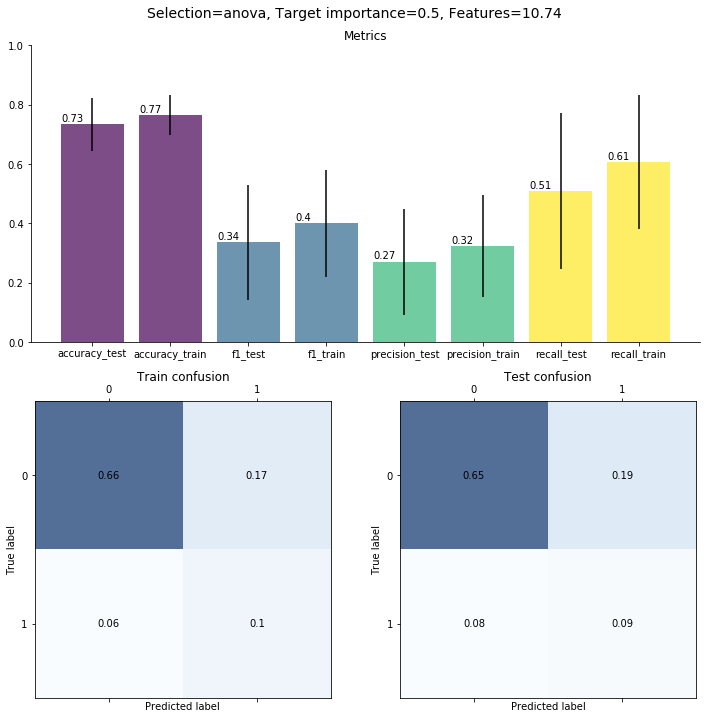

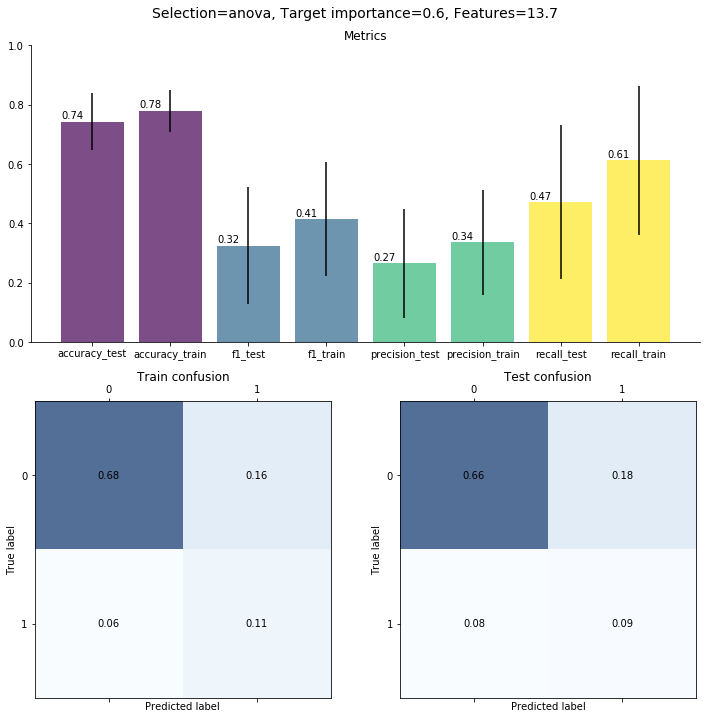

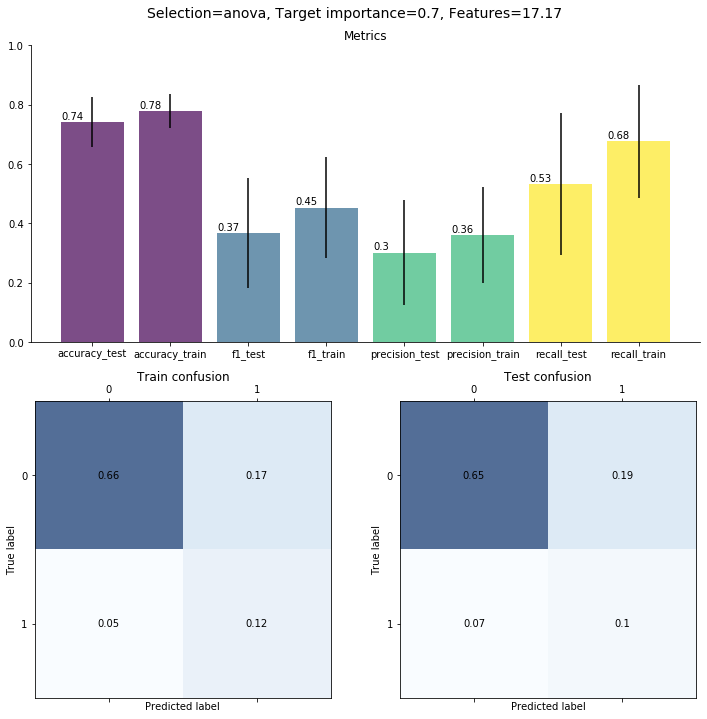

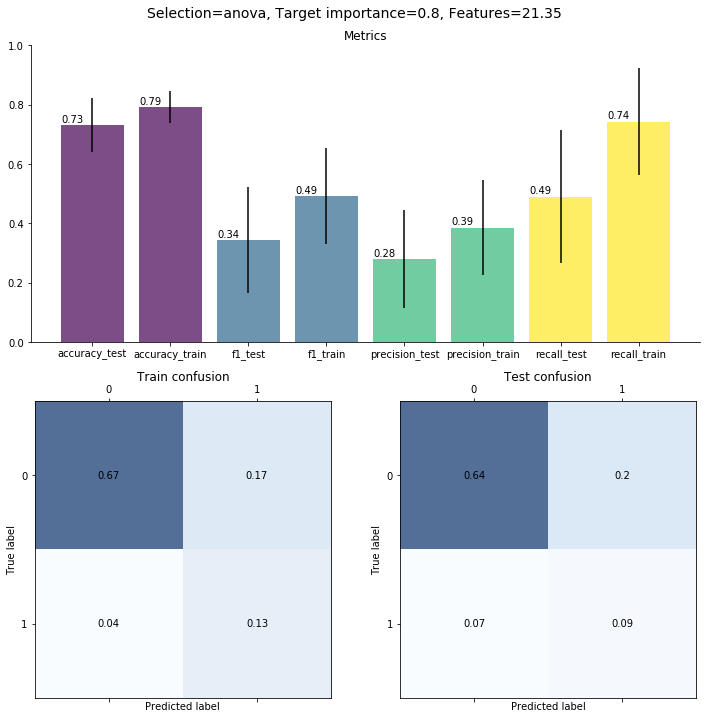

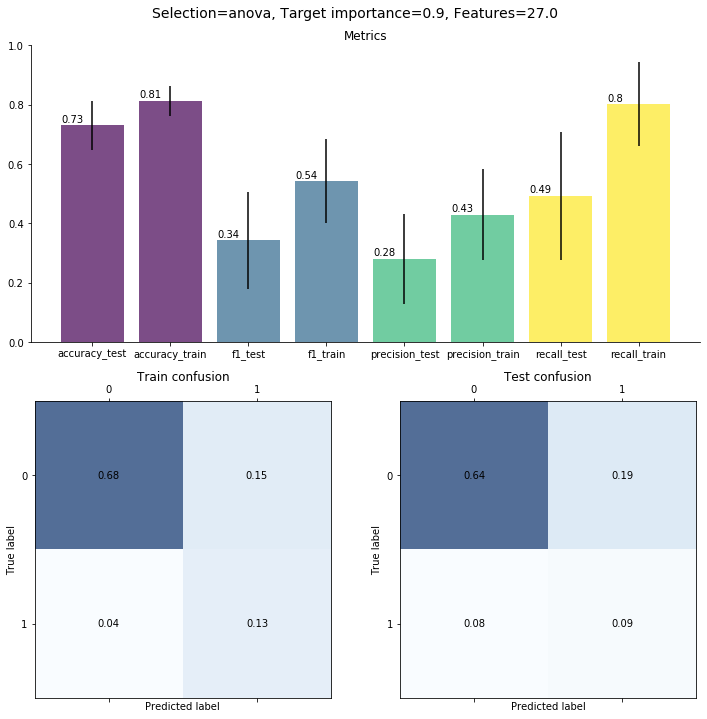

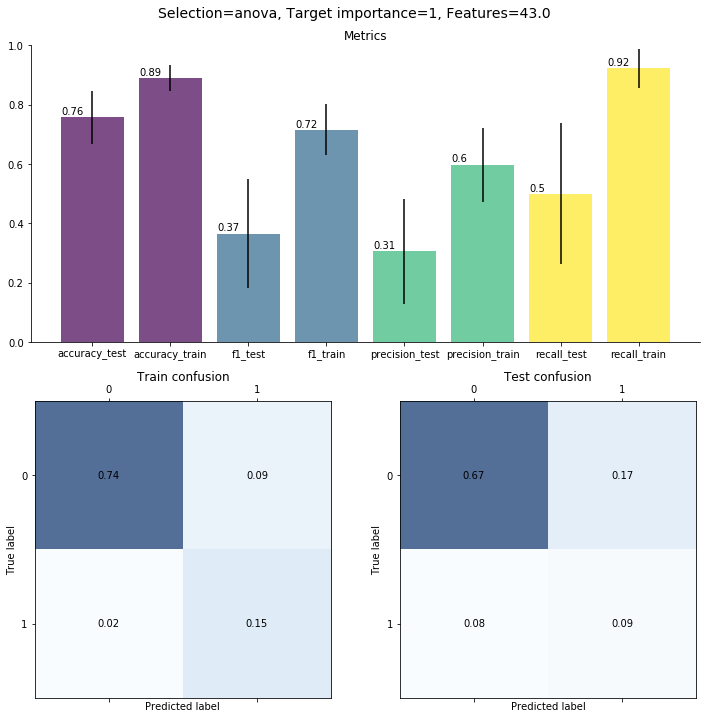

In [31]:
for selection in selections:
    for target_importance in target_importances:
        ev.evaluate_with_plots(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')

In here, it is more difficult to see the general improvement that we saw before. However, when considering all the features (not applying feature selection), it is where we obtain the better results from all past simulations.

### 2.3. Feature selection (making hidden layers indepent)

The difference is that we were determining the hidden layers width based on the input layer width (which was, at the same time, determined by the number of features selected) while now we have fixed the hidden layers width. This will, in theory, allow us to see the isolated effect of the feature selection.

In [32]:
selections = ['pca','chi','anova']
target_importances = [0.5,0.6,0.7,0.8,0.9,1]

In [33]:
parameters = pandas.read_csv('./Exploration/feature_selection_var3_parameters.csv')
train = pandas.read_csv('./Exploration/feature_selection_var3_train.csv')
test = pandas.read_csv('./Exploration/feature_selection_var3_test.csv')

In [34]:
table = pandas.DataFrame()
selection = 'pca'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=pca, Target importance=0.5, Features=15.0  \
accuracy_test                                        0.712+/-0.085    
accuracy_train                                       0.763+/-0.062    
f1_test                                              0.336+/-0.179    
f1_train                                             0.439+/-0.140    
precision_test                                       0.276+/-0.172    
precision_train                                      0.344+/-0.143    
recall_test                                          0.499+/-0.240    
recall_train                                         0.689+/-0.175    

                Selection=pca, Target importance=0.6, Features=18.0  \
accuracy_test                                        0.716+/-0.089    
accuracy_train                                       0.775+/-0.054    
f1_test                                              0.323+/-0.175    
f1_train                                             0.467+/-0.147    
precision_test                                       0.260+/-0.166    
precision_train                                      0.366+/-0.152    
recall_test                                          0.495+/-0.228    
recall_train                                         0.729+/-0.179    

                Selection=pca, Target importance=0.7, Features=21.0  \
accuracy_test                                        0.708+/-0.089    
accuracy_train                                       0.779+/-0.058    
f1_test                                              0.322+/-0.169    
f1_train                                             0.488+/-0.128    
precision_test                                       0.261+/-0.165    
precision_train                                      0.381+/-0.141    
recall_test                                          0.481+/-0.228    
recall_train                                         0.749+/-0.127    

                Selection=pca, Target importance=0.8, Features=25.0  \
accuracy_test                                        0.737+/-0.089    
accuracy_train                                       0.802+/-0.058    
f1_test                                              0.329+/-0.191    
f1_train                                             0.510+/-0.148    
precision_test                                       0.273+/-0.182    
precision_train                                      0.408+/-0.148    
recall_test                                          0.469+/-0.241    
recall_train                                         0.751+/-0.174    

                Selection=pca, Target importance=0.9, Features=28.0  \
accuracy_test                                        0.740+/-0.089    
accuracy_train                                       0.812+/-0.056    
f1_test                                              0.317+/-0.182    
f1_train                                             0.518+/-0.161    
precision_test                                       0.265+/-0.178    
precision_train                                      0.414+/-0.163    
recall_test                                          0.456+/-0.230    
recall_train                                         0.752+/-0.203    

                Selection=pca, Target importance=1, Features=32.0  
accuracy_test                                       0.742+/-0.079  
accuracy_train                                      0.828+/-0.054  
f1_test                                             0.351+/-0.176  
f1_train                                            0.581+/-0.110  
precision_test                                      0.292+/-0.177  
precision_train                                     0.471+/-0.140  
recall_test                                         0.503+/-0.213  
recall_train                                        0.822+/-0.130

In [35]:
table = pandas.DataFrame()
selection = 'anova'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=anova, Target importance=0.5, Features=8.13  \
accuracy_test                                        0.733+/-0.086      
accuracy_train                                       0.757+/-0.063      
f1_test                                              0.364+/-0.190      
f1_train                                             0.430+/-0.141      
precision_test                                       0.296+/-0.183      
precision_train                                      0.337+/-0.145      
recall_test                                          0.545+/-0.247      
recall_train                                         0.666+/-0.156      

                Selection=anova, Target importance=0.6, Features=10.39  \
accuracy_test                                        0.740+/-0.089       
accuracy_train                                       0.769+/-0.069       
f1_test                                              0.349+/-0.186       
f1_train                                             0.423+/-0.181       
precision_test                                       0.282+/-0.179       
precision_train                                      0.336+/-0.168       
recall_test                                          0.524+/-0.243       
recall_train                                         0.641+/-0.224       

                Selection=anova, Target importance=0.7, Features=13.0  \
accuracy_test                                        0.730+/-0.082      
accuracy_train                                       0.767+/-0.061      
f1_test                                              0.335+/-0.180      
f1_train                                             0.442+/-0.158      
precision_test                                       0.276+/-0.180      
precision_train                                      0.351+/-0.157      
recall_test                                          0.520+/-0.234      
recall_train                                         0.676+/-0.181      

                Selection=anova, Target importance=0.8, Features=16.17  \
accuracy_test                                        0.735+/-0.082       
accuracy_train                                       0.776+/-0.059       
f1_test                                              0.351+/-0.179       
f1_train                                             0.456+/-0.152       
precision_test                                       0.287+/-0.175       
precision_train                                      0.362+/-0.150       
recall_test                                          0.522+/-0.237       
recall_train                                         0.695+/-0.175       

                Selection=anova, Target importance=0.9, Features=20.35  \
accuracy_test                                        0.730+/-0.080       
accuracy_train                                       0.787+/-0.053       
f1_test                                              0.353+/-0.173       
f1_train                                             0.488+/-0.141       
precision_test                                       0.287+/-0.167       
precision_train                                      0.388+/-0.151       
recall_test                                          0.539+/-0.248       
recall_train                                         0.736+/-0.142       

                Selection=anova, Target importance=1, Features=32.0  
accuracy_test                                        0.740+/-0.092   
accuracy_train                                       0.828+/-0.059   
f1_test                                              0.346+/-0.172   
f1_train                                             0.579+/-0.115   
precision_test                                       0.285+/-0.164   
precision_train                                      0.468+/-0.139   
recall_test                                          0.486+/-0.222   
recall_train                                         0.816+/-0.125

In [36]:
table = pandas.DataFrame()
selection = 'chi'
for target_importance in target_importances:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Selection=chi, Target importance=0.5, Features=7.35  \
accuracy_test                                        0.717+/-0.085    
accuracy_train                                       0.739+/-0.066    
f1_test                                              0.358+/-0.171    
f1_train                                             0.416+/-0.140    
precision_test                                       0.281+/-0.161    
precision_train                                      0.323+/-0.138    
recall_test                                          0.579+/-0.240    
recall_train                                         0.663+/-0.160    

                Selection=chi, Target importance=0.6, Features=9.43  \
accuracy_test                                        0.729+/-0.089    
accuracy_train                                       0.750+/-0.066    
f1_test                                              0.367+/-0.177    
f1_train                                             0.434+/-0.137    
precision_test                                       0.290+/-0.163    
precision_train                                      0.339+/-0.140    
recall_test                                          0.557+/-0.230    
recall_train                                         0.672+/-0.140    

                Selection=chi, Target importance=0.7, Features=11.7  \
accuracy_test                                        0.715+/-0.084    
accuracy_train                                       0.759+/-0.057    
f1_test                                              0.347+/-0.169    
f1_train                                             0.444+/-0.137    
precision_test                                       0.280+/-0.169    
precision_train                                      0.346+/-0.142    
recall_test                                          0.529+/-0.213    
recall_train                                         0.692+/-0.128    

                Selection=chi, Target importance=0.8, Features=14.83  \
accuracy_test                                        0.730+/-0.088     
accuracy_train                                       0.765+/-0.059     
f1_test                                              0.330+/-0.180     
f1_train                                             0.448+/-0.150     
precision_test                                       0.267+/-0.174     
precision_train                                      0.348+/-0.151     
recall_test                                          0.498+/-0.243     
recall_train                                         0.696+/-0.173     

                Selection=chi, Target importance=0.9, Features=19.26  \
accuracy_test                                        0.720+/-0.090     
accuracy_train                                       0.783+/-0.057     
f1_test                                              0.351+/-0.175     
f1_train                                             0.487+/-0.127     
precision_test                                       0.290+/-0.170     
precision_train                                      0.382+/-0.143     
recall_test                                          0.493+/-0.212     
recall_train                                         0.745+/-0.120     

                Selection=chi, Target importance=1, Features=32.0  
accuracy_test                                       0.747+/-0.088  
accuracy_train                                      0.832+/-0.052  
f1_test                                             0.348+/-0.171  
f1_train                                            0.566+/-0.137  
precision_test                                      0.298+/-0.181  
precision_train                                     0.462+/-0.152  
recall_test                                         0.484+/-0.227  
recall_train                                        0.795+/-0.178

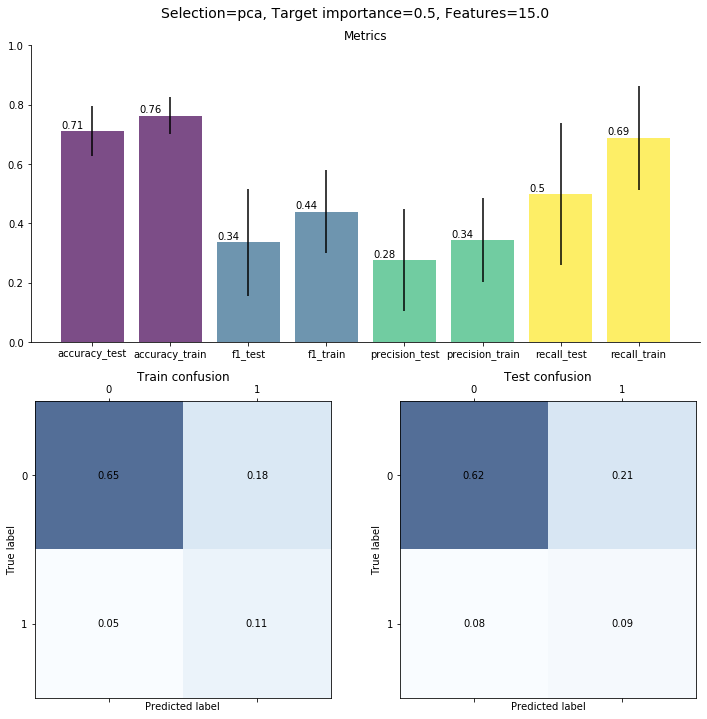

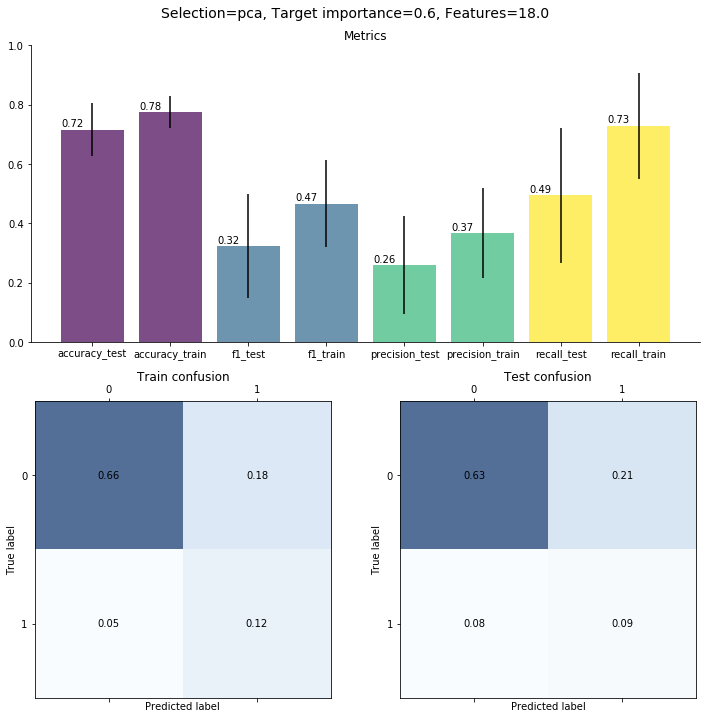

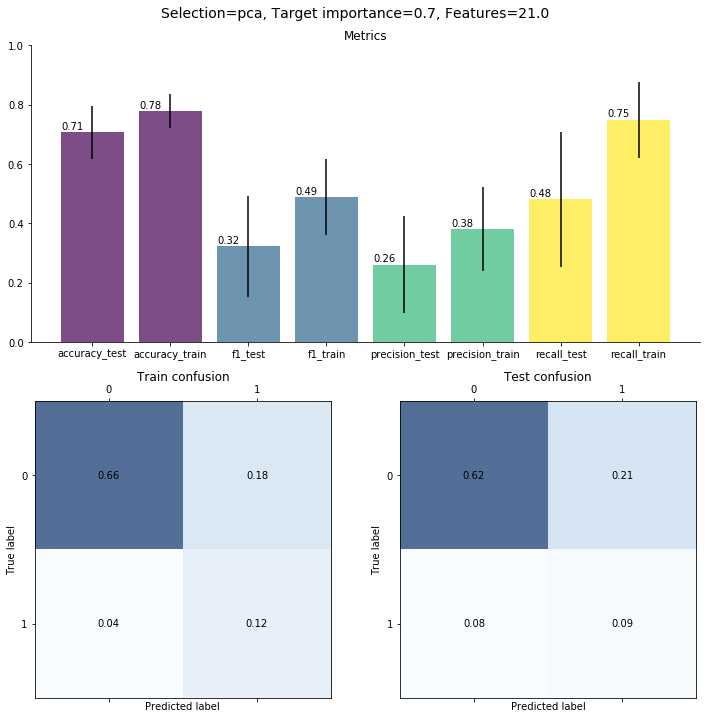

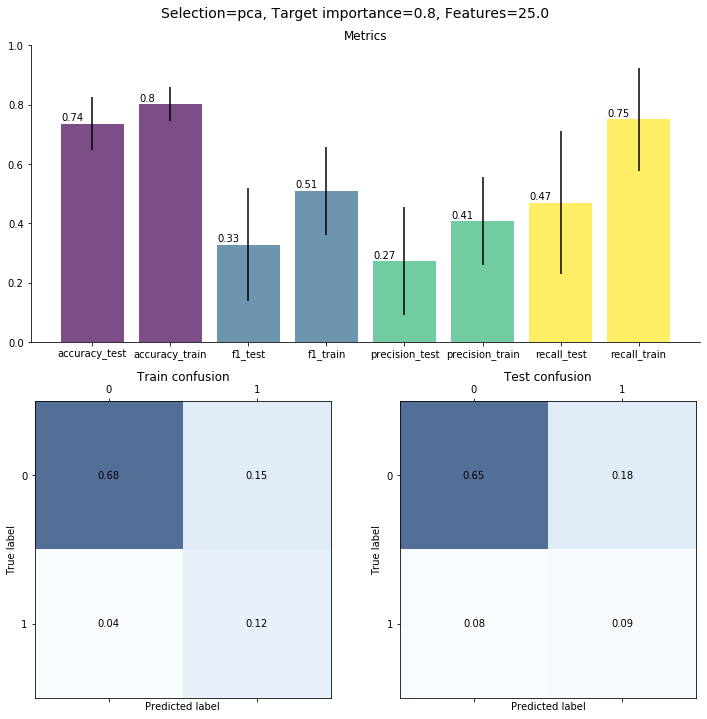

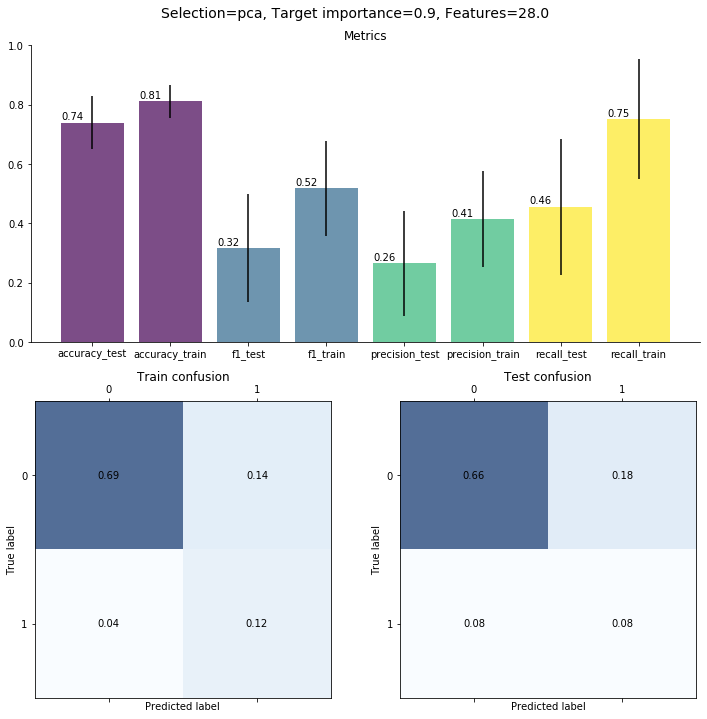

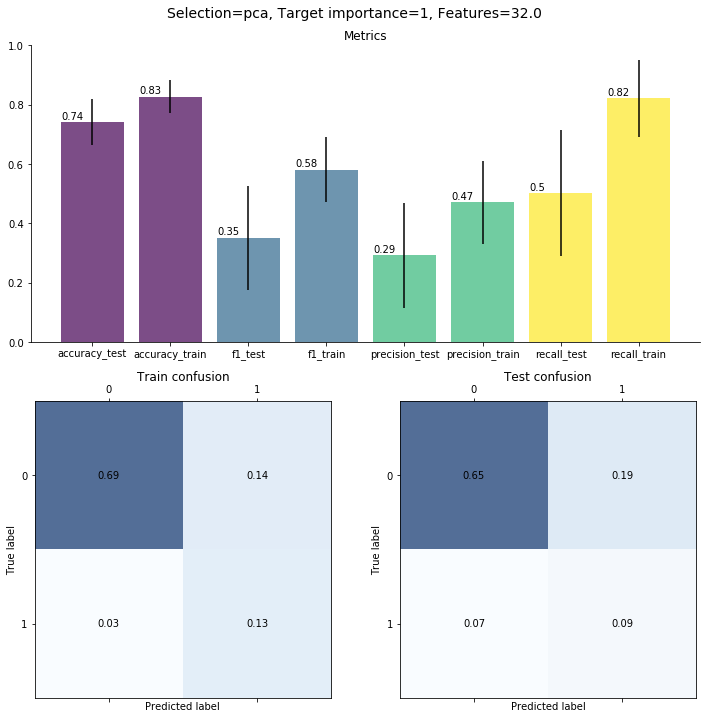

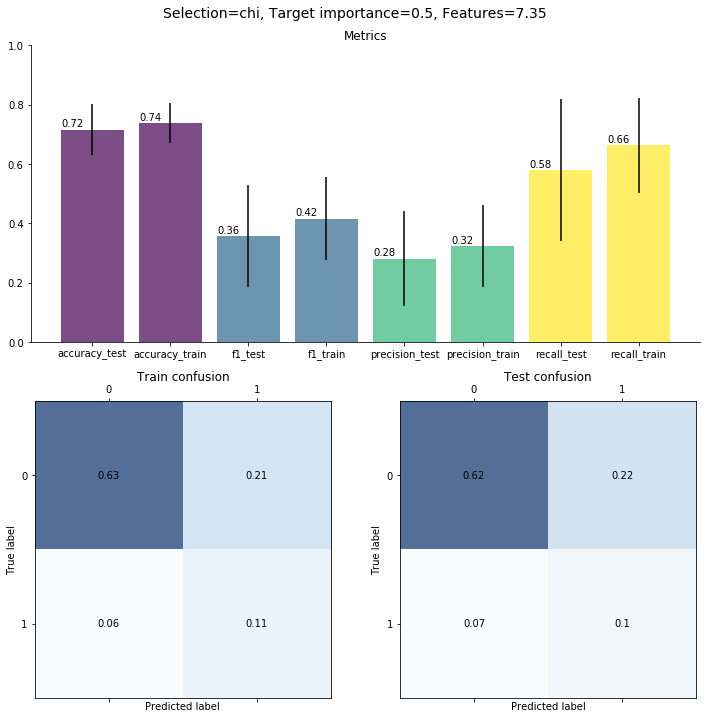

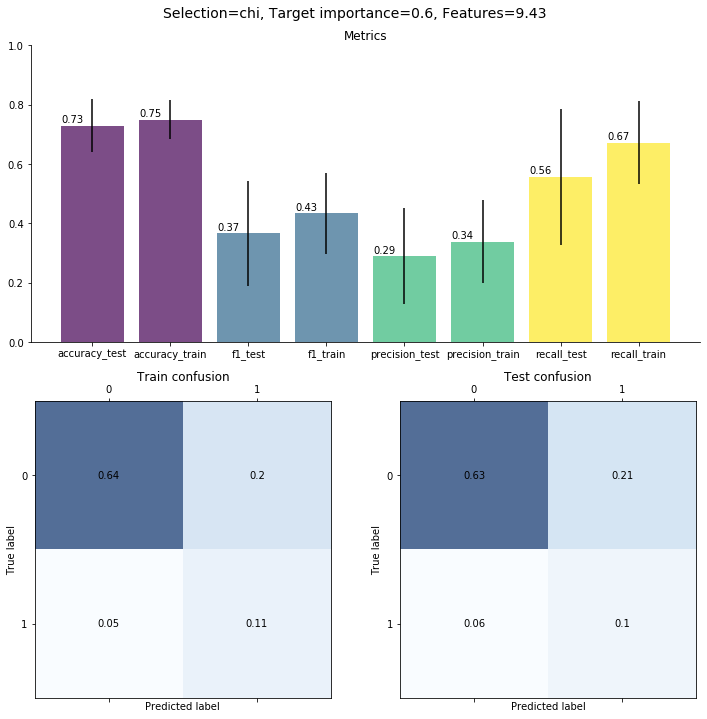

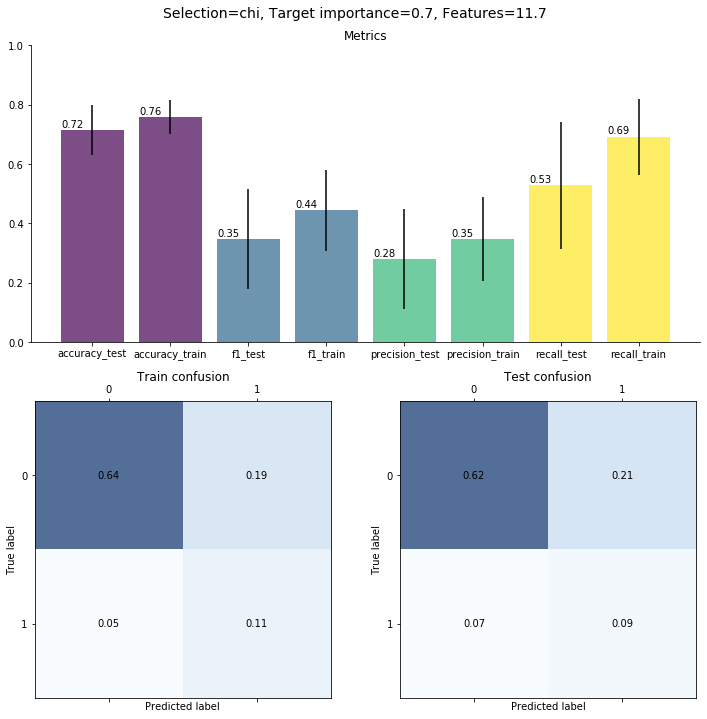

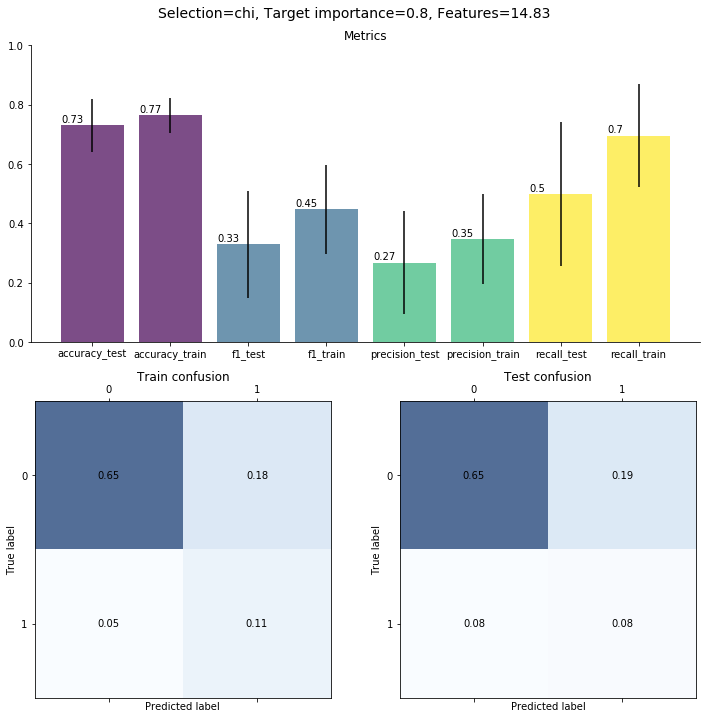

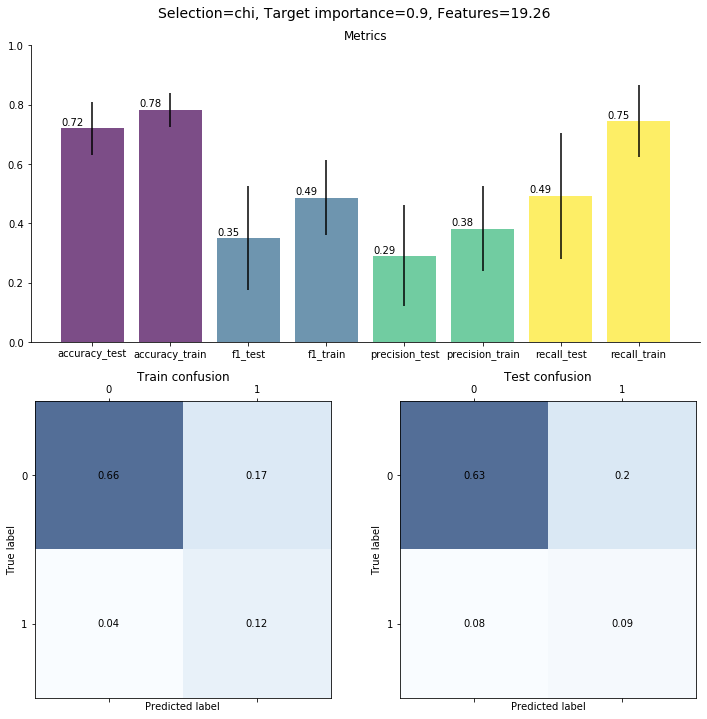

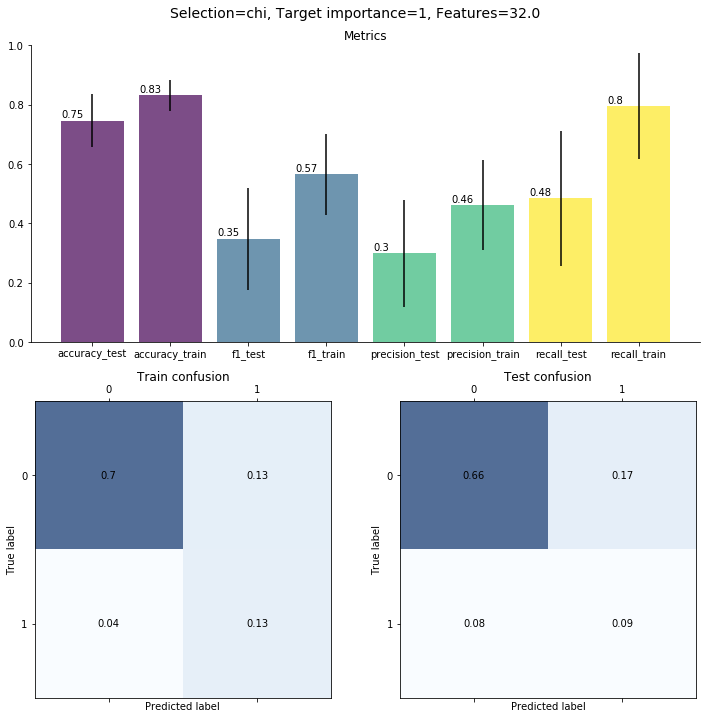

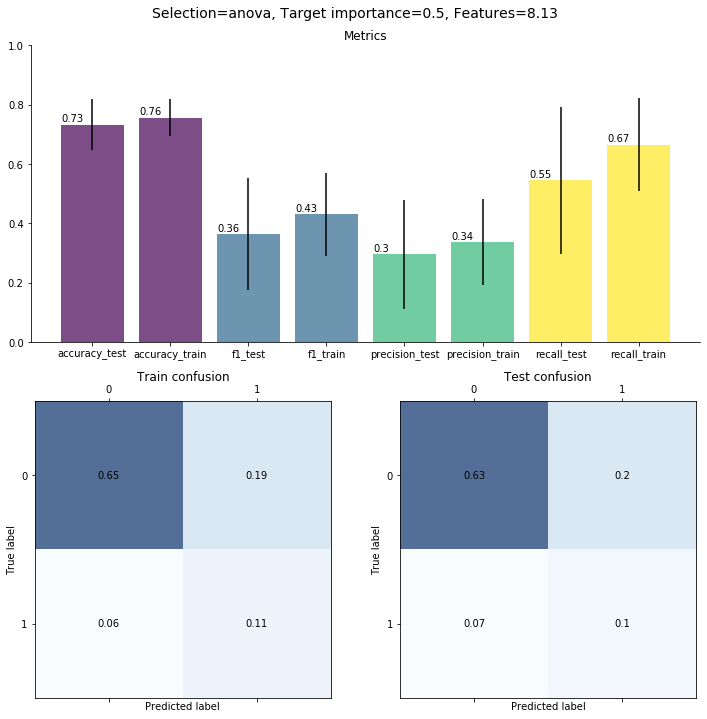

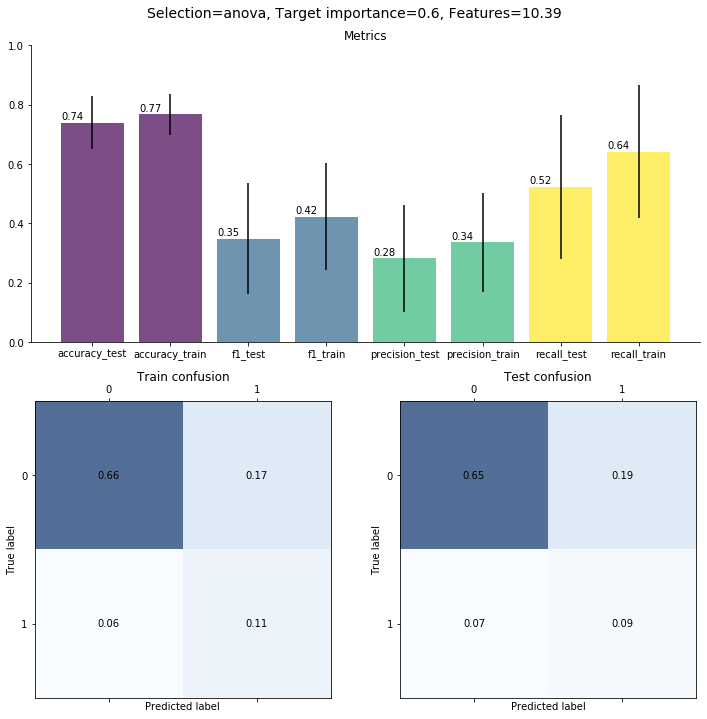

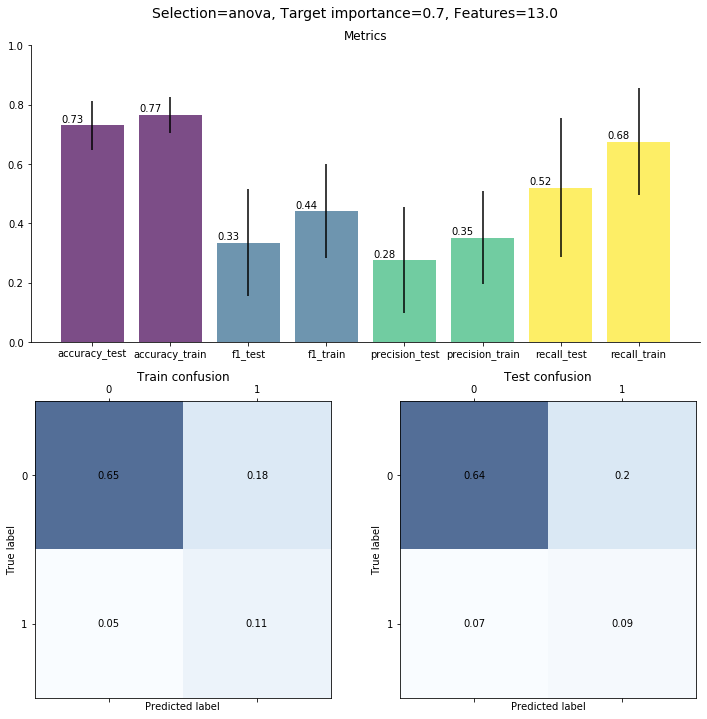

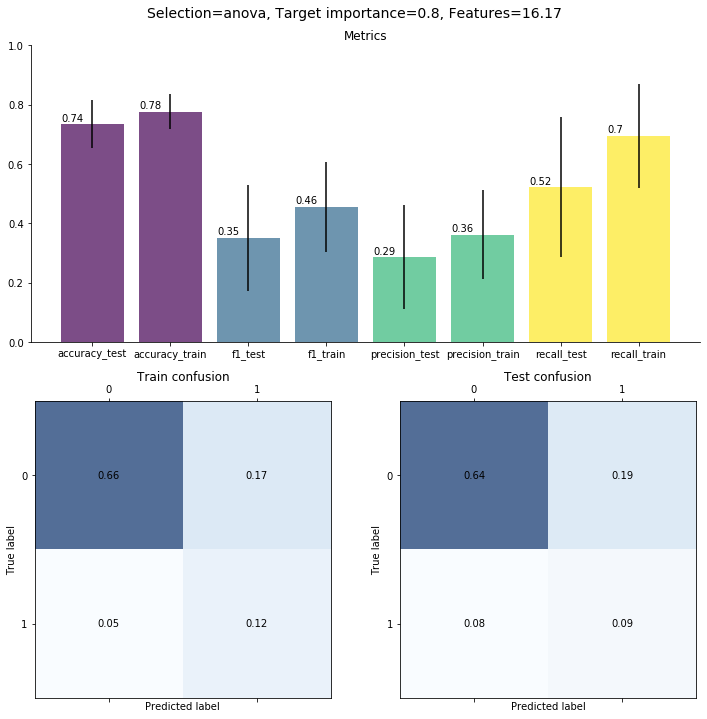

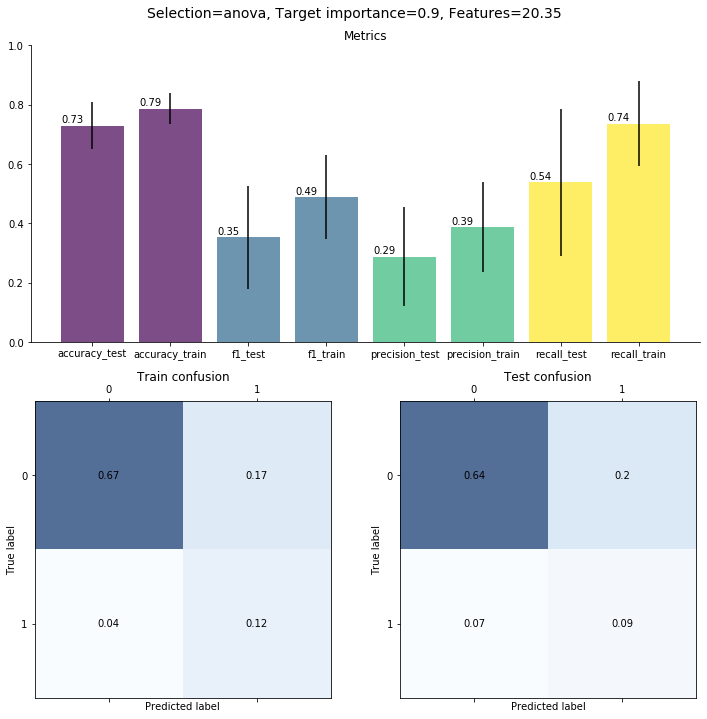

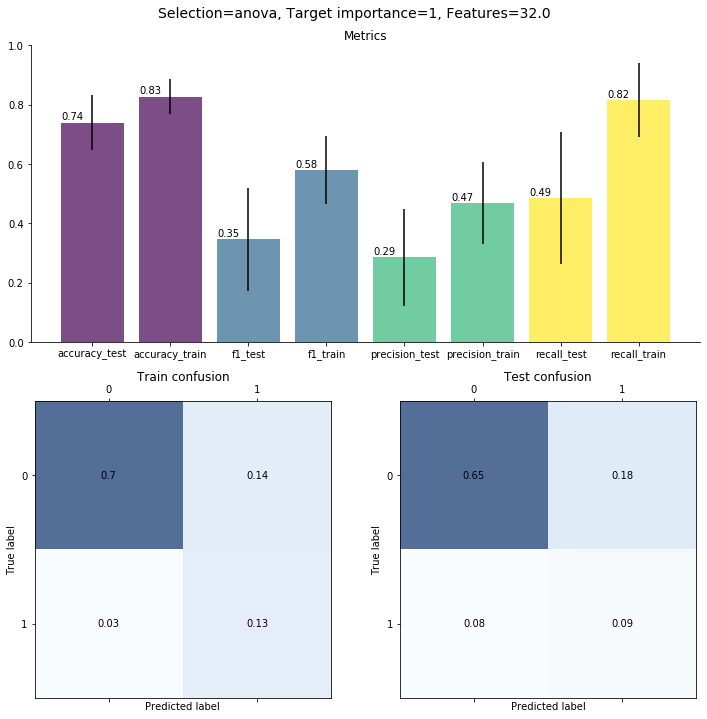

In [37]:
for selection in selections:
    for target_importance in target_importances:
        ev.evaluate_with_plots(parameters,train,test,['Selection','Target importance'],[selection,target_importance],'all','Features')

The dynamics that we observe are pretty similar although now, even in pca, we see no clear trend in test data.

### 3. Scaling factor

In this exploration, we study the effect of the scaling factor, which affects the hidden layers width. We work with 6 different scaling factors **from 1 to 2**.

In [38]:
scaling_factors = [1.0,1.2,1.4,1.6,1.8,2]

In [39]:
parameters = pandas.read_csv('./Exploration/scaling_factor_parameters.csv')
train = pandas.read_csv('./Exploration/scaling_factor_train.csv')
test = pandas.read_csv('./Exploration/scaling_factor_test.csv')

In [40]:
table = pandas.DataFrame()
for scaling_factor in scaling_factors:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Scaling factor'],[scaling_factor],'all','Hidden units')
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Scaling factor=1.0, Hidden units=6.0  \
accuracy_test                          0.739+/-0.087   
accuracy_train                         0.838+/-0.054   
f1_test                                0.330+/-0.169   
f1_train                               0.602+/-0.112   
precision_test                         0.273+/-0.163   
precision_train                        0.484+/-0.133   
recall_test                            0.471+/-0.223   
recall_train                           0.847+/-0.119   

                Scaling factor=1.2, Hidden units=7.0  \
accuracy_test                          0.749+/-0.089   
accuracy_train                         0.854+/-0.053   
f1_test                                0.337+/-0.179   
f1_train                               0.637+/-0.109   
precision_test                         0.286+/-0.179   
precision_train                        0.516+/-0.129   
recall_test                            0.457+/-0.214   
recall_train                           0.870+/-0.109   

                Scaling factor=1.4, Hidden units=8.0  \
accuracy_test                          0.741+/-0.092   
accuracy_train                         0.867+/-0.045   
f1_test                                0.343+/-0.163   
f1_train                               0.660+/-0.116   
precision_test                         0.295+/-0.168   
precision_train                        0.537+/-0.141   
recall_test                            0.454+/-0.197   
recall_train                           0.897+/-0.109   

                Scaling factor=1.6, Hidden units=9.0  \
accuracy_test                          0.750+/-0.092   
accuracy_train                         0.887+/-0.044   
f1_test                                0.336+/-0.187   
f1_train                               0.706+/-0.090   
precision_test                         0.292+/-0.183   
precision_train                        0.583+/-0.123   
recall_test                            0.426+/-0.223   
recall_train                           0.928+/-0.059   

                Scaling factor=1.8, Hidden units=10.0  \
accuracy_test                           0.752+/-0.084   
accuracy_train                          0.898+/-0.042   
f1_test                                 0.344+/-0.176   
f1_train                                0.728+/-0.098   
precision_test                          0.299+/-0.175   
precision_train                         0.610+/-0.129   
recall_test                             0.446+/-0.217   
recall_train                            0.935+/-0.060   

                Scaling factor=2, Hidden units=11.0  
accuracy_test                         0.754+/-0.091  
accuracy_train                        0.901+/-0.043  
f1_test                               0.333+/-0.168  
f1_train                              0.748+/-0.086  
precision_test                        0.291+/-0.169  
precision_train                       0.629+/-0.125  
recall_test                           0.432+/-0.203  
recall_train                          0.947+/-0.053

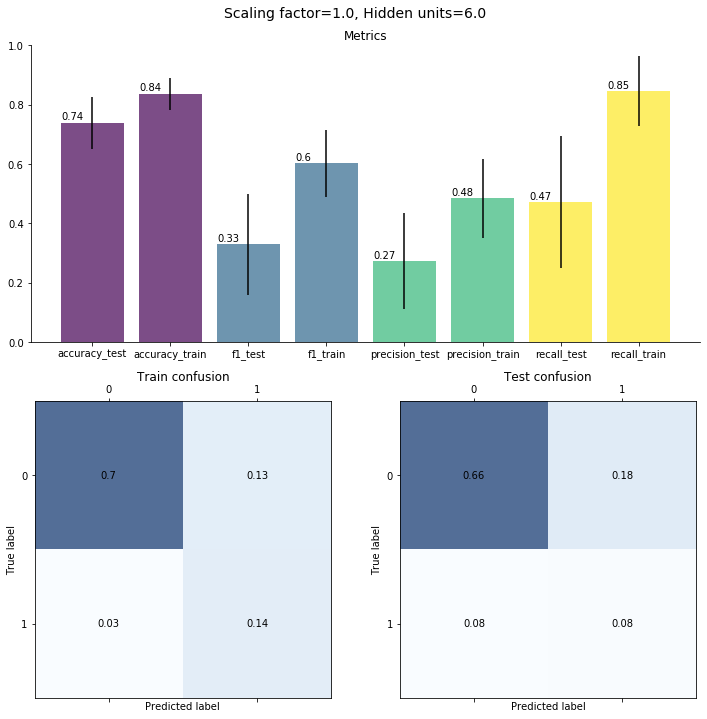

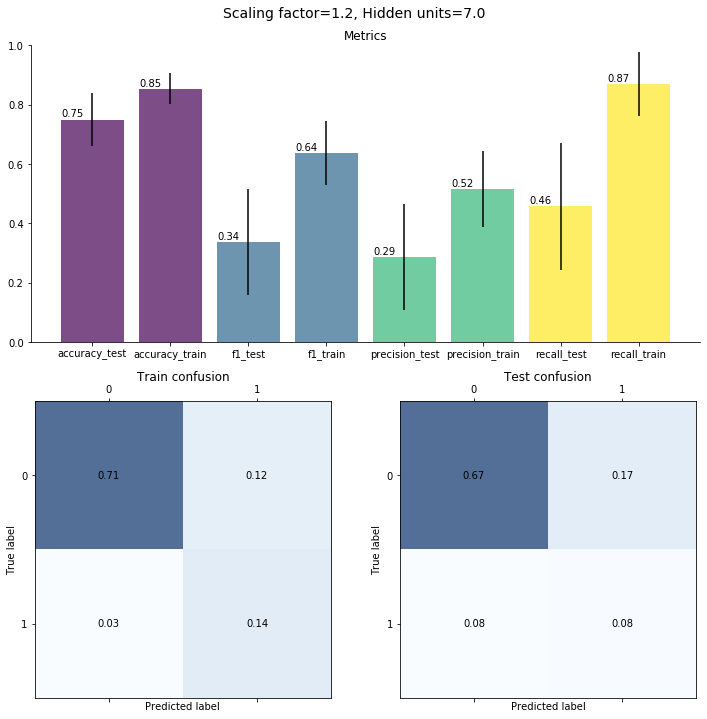

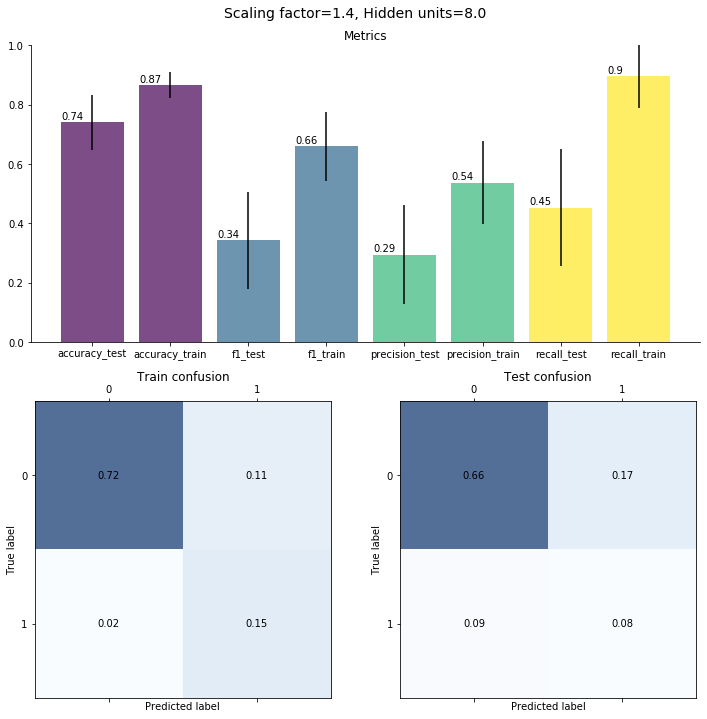

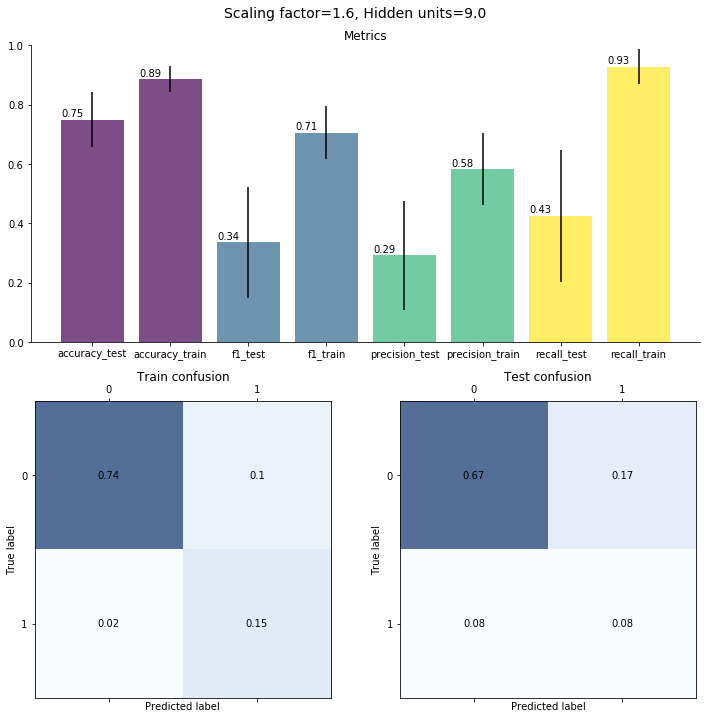

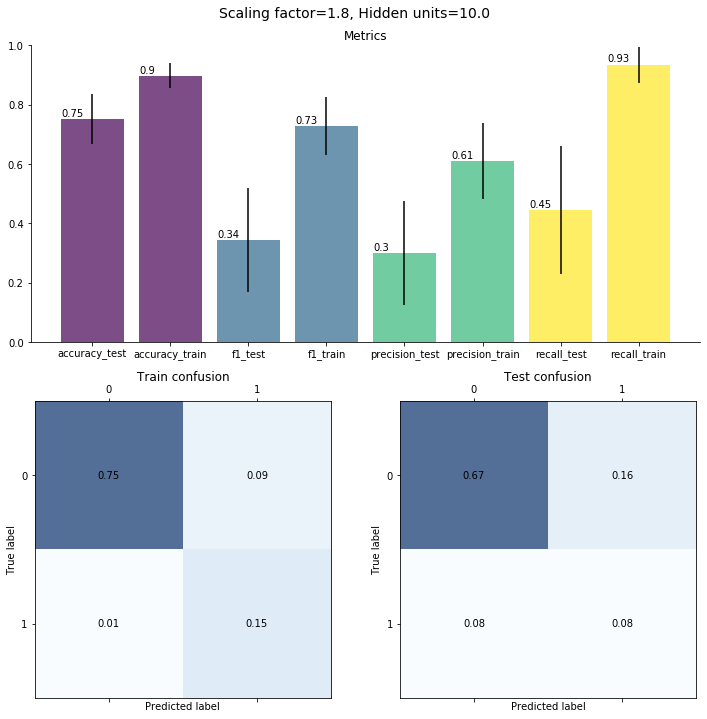

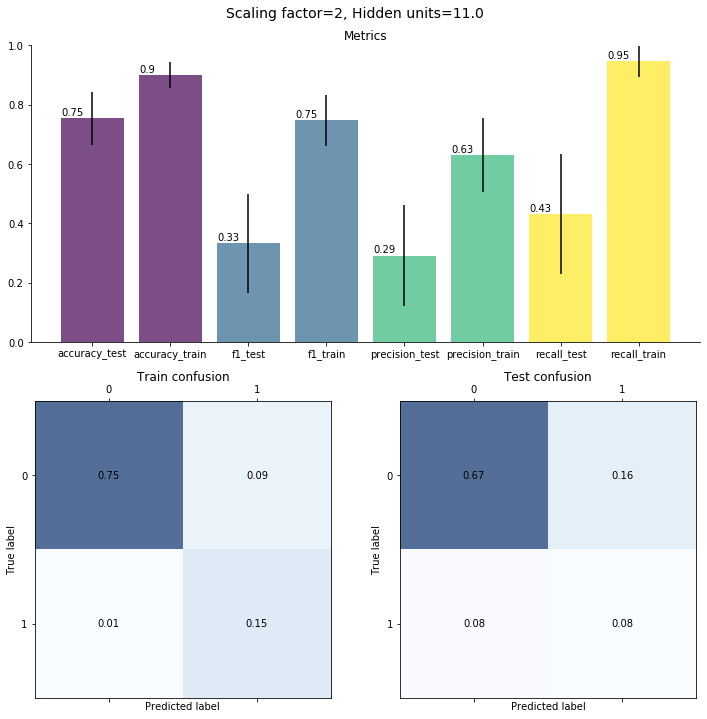

In [41]:
for scaling_factor in scaling_factors:
    ev.evaluate_with_plots(parameters,train,test,['Scaling factor'],[scaling_factor],'all','Hidden units')

It looks like **the scaling factor has a clear effect in train data, where higher scaling factors lead to better performance, but an unclear one in test data, where higher scaling factors leads to better accuracy but worst recall**. This effect is expected in general terms as bigger neural networks (remember that we are increasing the hidden layers width) are known to fit data better but not necessarily generalise better. The problem in this case comes with the recall in test data, meaning that the model did not learn the underlying pattern to recognise positive outputs but overfitted the ones of the train data.

### 4. Output activation

In this exploration, we study the effect of the activation function on the output layer, which affects the output layer width and the type of loss function. We work with 2 different output activation functions: **sigmoid, softmax**.

In [42]:
output_activations = ['sigmoid','softmax']

In [43]:
parameters = pandas.read_csv('./Exploration/output_activation_parameters.csv')
train = pandas.read_csv('./Exploration/output_activation_train.csv')
test = pandas.read_csv('./Exploration/output_activation_test.csv')

In [44]:
table = pandas.DataFrame()
for output_activation in output_activations:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Output activation'],[output_activation])
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_tabletable
table

Output activation=sigmoid Output activation=softmax
accuracy_test               0.749+/-0.089             0.741+/-0.089
accuracy_train              0.836+/-0.052             0.853+/-0.049
f1_test                     0.335+/-0.179             0.327+/-0.170
f1_train                    0.573+/-0.149             0.639+/-0.105
precision_test              0.285+/-0.176             0.273+/-0.162
precision_train             0.464+/-0.154             0.521+/-0.138
recall_test                 0.461+/-0.224             0.442+/-0.215
recall_train                0.809+/-0.176             0.877+/-0.093

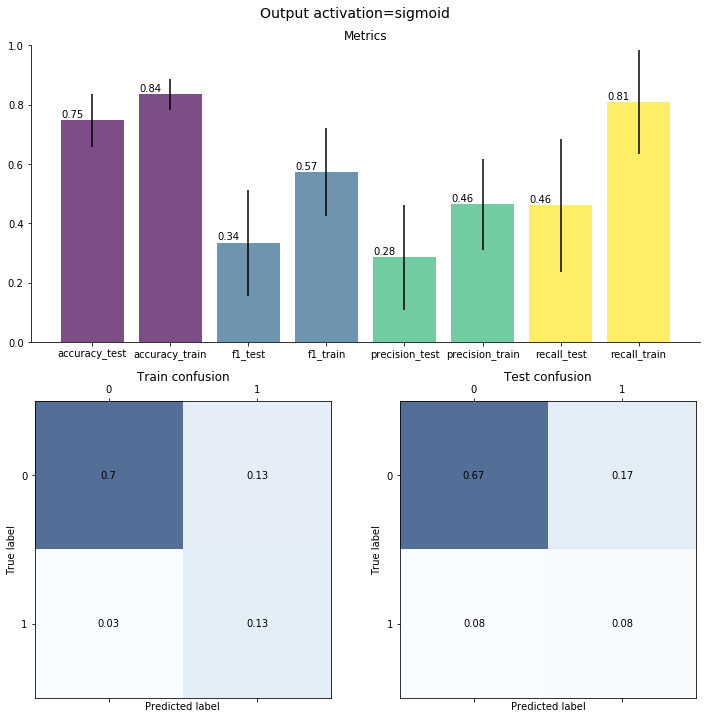

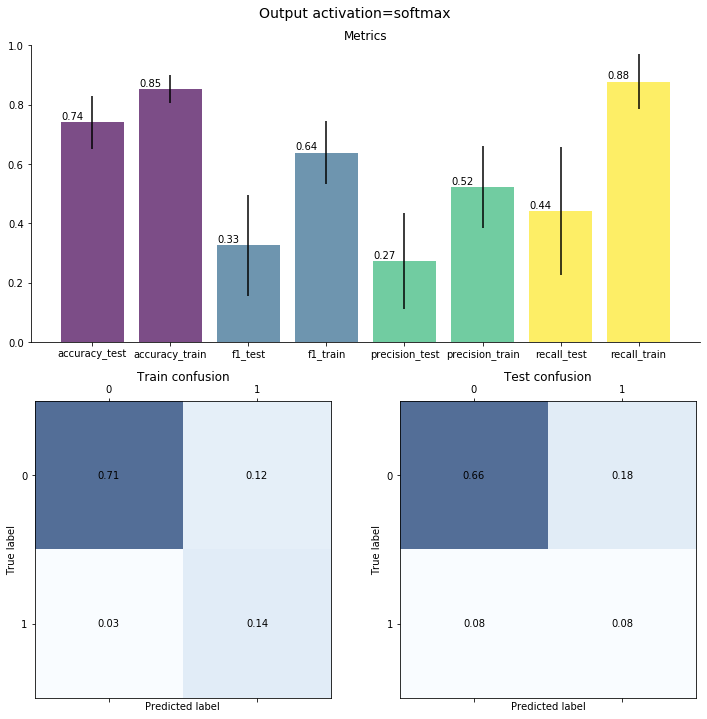

In [45]:
for output_activation in output_activations:
    ev.evaluate_with_plots(parameters,train,test,['Output activation'],[output_activation])

It looks like **the output activation has a two way effect on train and test data; softmax function works substantially better at a train level while sigmoid function works slightly better at a test level**. This tells us that softmax function appears to be more appropiate for this problem but looks more prompt to overfitting.

### 5. Balancing

In this exploration, we study the effect of balancing at different positive-negative ratios, which affects both the input and output data. We work with 5 different ratios, considering that the portion of samples with negative outputs goes **from 0.5 to 0.9**.

In [46]:
portion_negatives = [0.5,0.6,0.7,0.8,0.9]

In [47]:
parameters = pandas.read_csv('./Exploration/balancing_parameters.csv')
parameters['Negatives'] = round(parameters['Negatives'],1)
train = pandas.read_csv('./Exploration/balancing_train.csv')
test = pandas.read_csv('./Exploration/balancing_test.csv')

In [48]:
table = pandas.DataFrame()
for portion_negative in portion_negatives:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Negatives'],[portion_negative],'all','Patients')
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Negatives=0.5, Patients=110.78 Negatives=0.6, Patients=160.88  \
accuracy_test                    0.596+/-0.122                  0.625+/-0.120   
accuracy_train                   0.806+/-0.067                  0.807+/-0.069   
f1_test                          0.569+/-0.159                  0.456+/-0.190   
f1_train                         0.797+/-0.110                  0.712+/-0.158   
precision_test                   0.593+/-0.179                  0.535+/-0.249   
precision_train                  0.811+/-0.106                  0.814+/-0.151   
recall_test                      0.587+/-0.213                  0.435+/-0.213   
recall_train                     0.798+/-0.141                  0.651+/-0.179   

                Negatives=0.7, Patients=198.0 Negatives=0.8, Patients=255.21  \
accuracy_test                   0.702+/-0.111                  0.769+/-0.073   
accuracy_train                  0.836+/-0.048                  0.871+/-0.033   
f1_test                         0.372+/-0.204                  0.235+/-0.191   
f1_train                        0.654+/-0.146                  0.571+/-0.167   
precision_test                  0.500+/-0.275                  0.360+/-0.289   
precision_train                 0.835+/-0.149                  0.837+/-0.168   
recall_test                     0.325+/-0.209                  0.191+/-0.175   
recall_train                    0.551+/-0.155                  0.450+/-0.168   

                Negatives=0.9, Patients=272.67  
accuracy_test                    0.860+/-0.079  
accuracy_train                   0.924+/-0.026  
f1_test                          0.109+/-0.163  
f1_train                         0.463+/-0.231  
precision_test                   0.166+/-0.260  
precision_train                  0.839+/-0.274  
recall_test                      0.099+/-0.177  
recall_train                     0.341+/-0.205

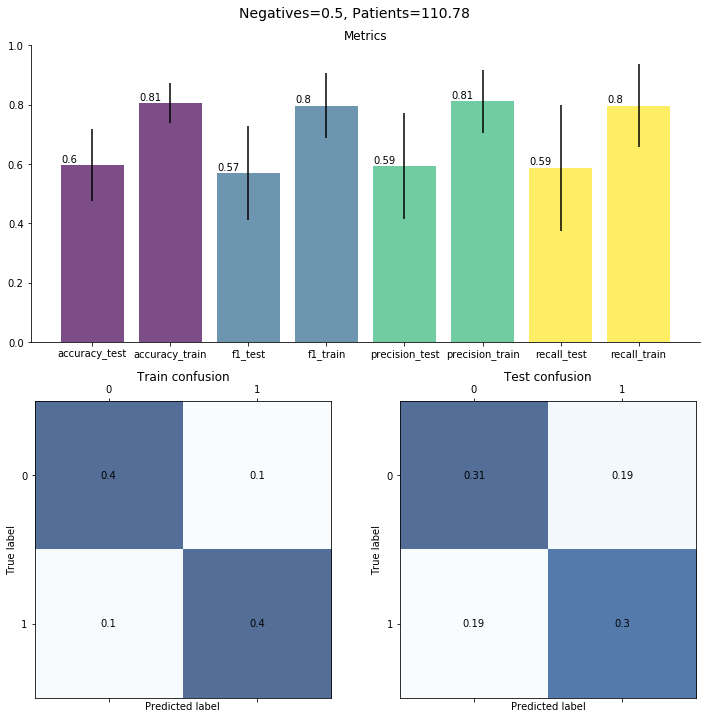

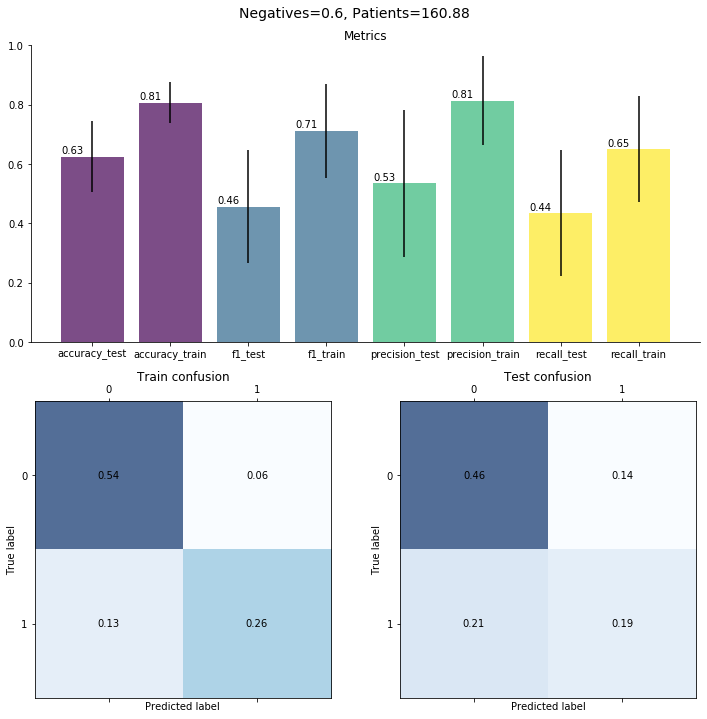

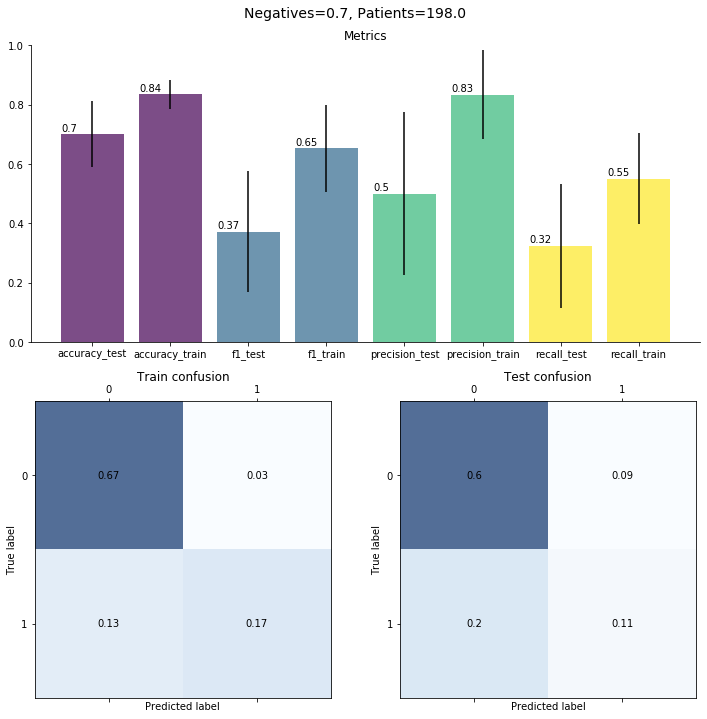

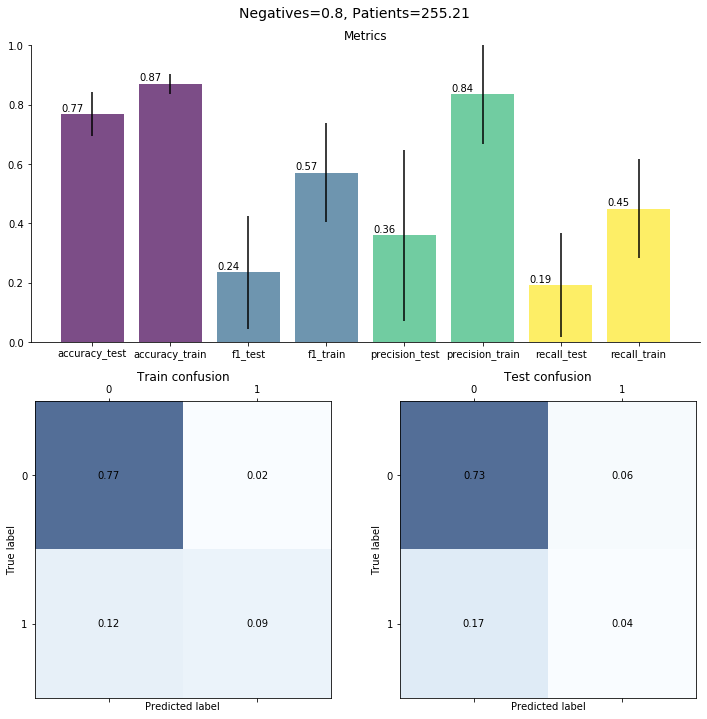

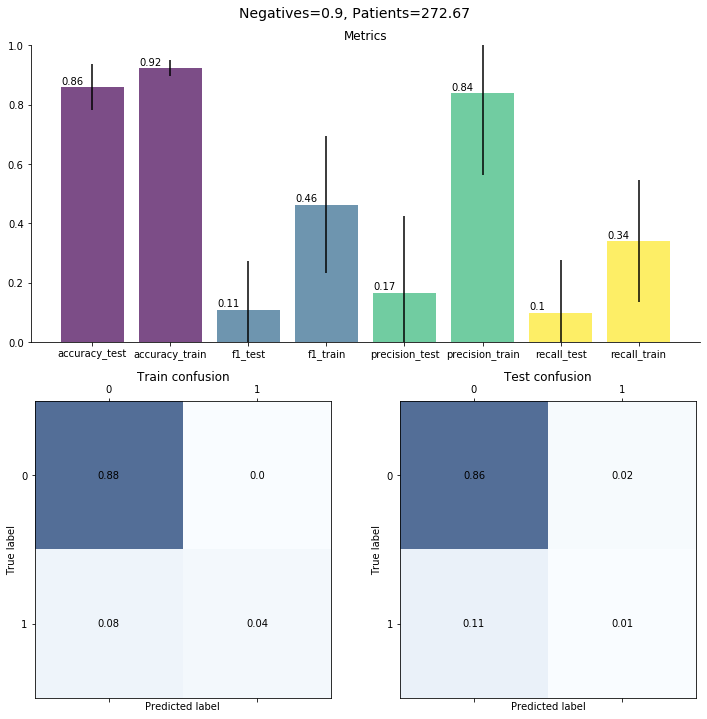

In [49]:
for portion_negative in portion_negatives:
    ev.evaluate_with_plots(parameters,train,test,['Negatives'],[portion_negative],'all','Patients')

In order to interpret the results of this exploration we need to understand a couple of things. First of all, that the portion of negative outputs shown is the real and not the imposed one (the balancing only works through removal of patients with negative output, so if you set the portion of negatives to be 0.9 but the maximum portion posible is 0.8, then 0.8 will be recorded). Secondly, this portions have been grouped to the closest first decimal (if the portion is 0.86, then it will be grouped inside 0.9). Thirdly, no weighting is considered to appreciate the raw effects of balancing. In a future exploration, it might be interesting to see how balancing works with the corresponding weighting.

It looks like **the portion of samples with negative outputs has different effects depending on the metric. As the balancing becomes more strict (closer to a negative portion of 0.5), the accuracy is worst but the recall is better**. In other words, the model is more capable of recognising positive values but, since the dataset is more heterogeneous, there are more overall mistakes. **As the balancing becomes less strict (closer to a negative portion of 1), the accuracy is better but the recall is worst**. In other words, the model is less capable of recognising positive values but, since the dataset is more homogeneous, the are less overall mistakes. The precision results are a bit misleading because, while False Positives are very low in less strict balancing, this only comes because almost no positive labels are predicted.

### 5.1. Balancing (combined with weighting)

The difference is that we were considering balancing on its own while now we combine it with the default weighting.

In [50]:
portion_negatives = [0.5,0.6,0.7,0.8,0.9]

In [51]:
parameters = pandas.read_csv('./Exploration/balancing_var1_parameters.csv')
parameters['Negatives'] = round(parameters['Negatives'],1)
train = pandas.read_csv('./Exploration/balancing_var1_train.csv')
test = pandas.read_csv('./Exploration/balancing_var1_test.csv')

In [52]:
table = pandas.DataFrame()
for portion_negative in portion_negatives:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Negatives'],[portion_negative],'all','Patients')
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Negatives=0.5, Patients=110.78 Negatives=0.6, Patients=160.88  \
accuracy_test                    0.600+/-0.150                  0.637+/-0.129   
accuracy_train                   0.804+/-0.067                  0.801+/-0.058   
f1_test                          0.582+/-0.185                  0.504+/-0.200   
f1_train                         0.798+/-0.088                  0.743+/-0.129   
precision_test                   0.605+/-0.207                  0.510+/-0.222   
precision_train                  0.815+/-0.083                  0.745+/-0.120   
recall_test                      0.599+/-0.217                  0.545+/-0.240   
recall_train                     0.795+/-0.126                  0.760+/-0.163   

                Negatives=0.7, Patients=198.0 Negatives=0.8, Patients=255.21  \
accuracy_test                   0.673+/-0.097                  0.692+/-0.105   
accuracy_train                  0.812+/-0.047                  0.821+/-0.046   
f1_test                         0.463+/-0.181                  0.380+/-0.168   
f1_train                        0.686+/-0.151                  0.638+/-0.121   
precision_test                  0.447+/-0.192                  0.341+/-0.188   
precision_train                 0.661+/-0.150                  0.558+/-0.131   
recall_test                     0.514+/-0.216                  0.480+/-0.219   
recall_train                    0.738+/-0.184                  0.787+/-0.169   

                Negatives=0.9, Patients=272.67  
accuracy_test                    0.765+/-0.091  
accuracy_train                   0.857+/-0.048  
f1_test                          0.279+/-0.209  
f1_train                         0.560+/-0.156  
precision_test                   0.228+/-0.199  
precision_train                  0.432+/-0.156  
recall_test                      0.399+/-0.258  
recall_train                     0.832+/-0.199

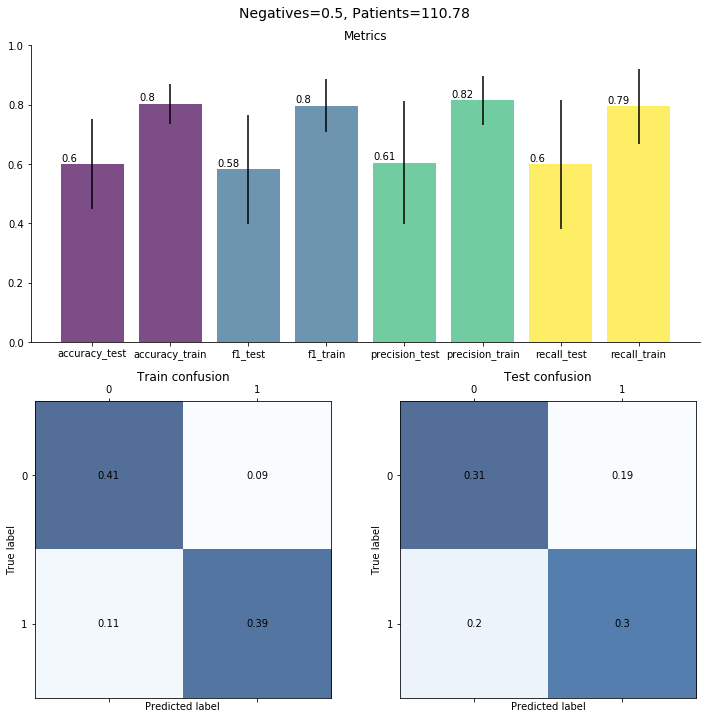

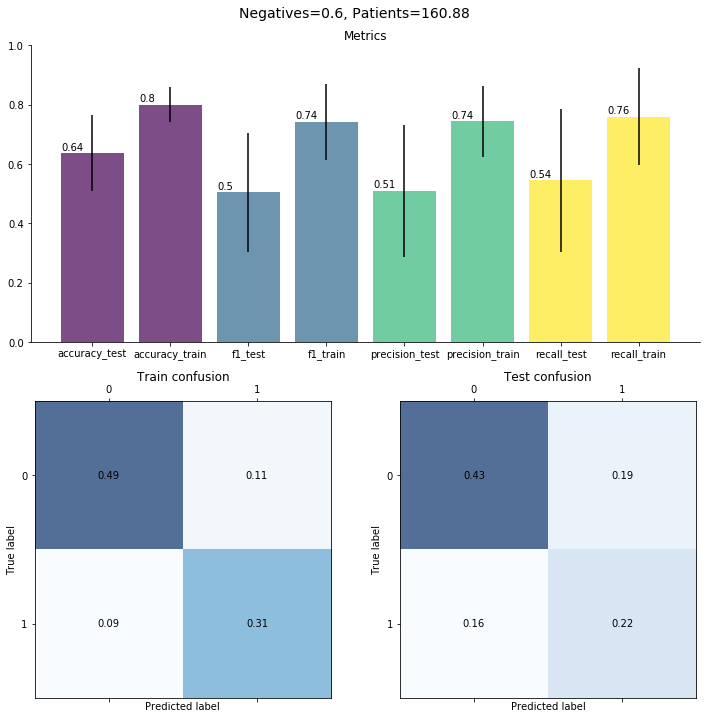

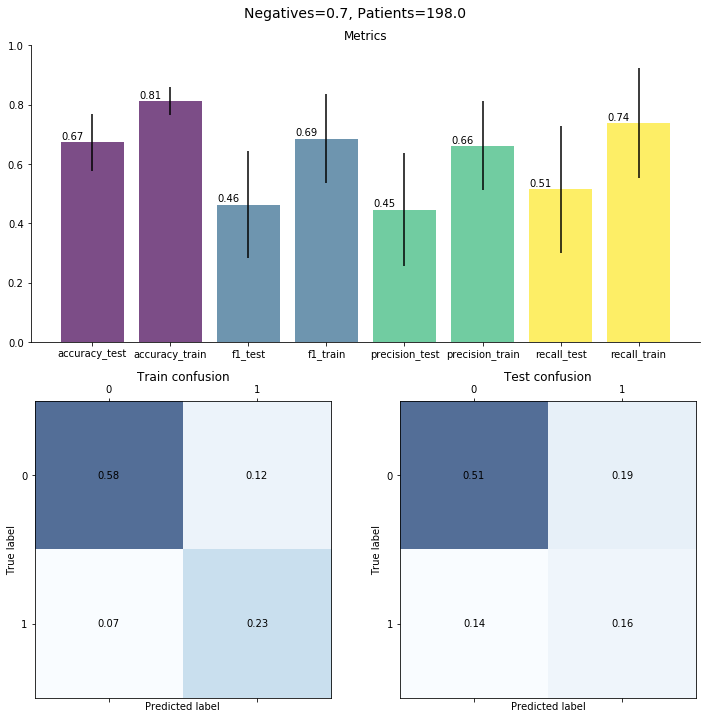

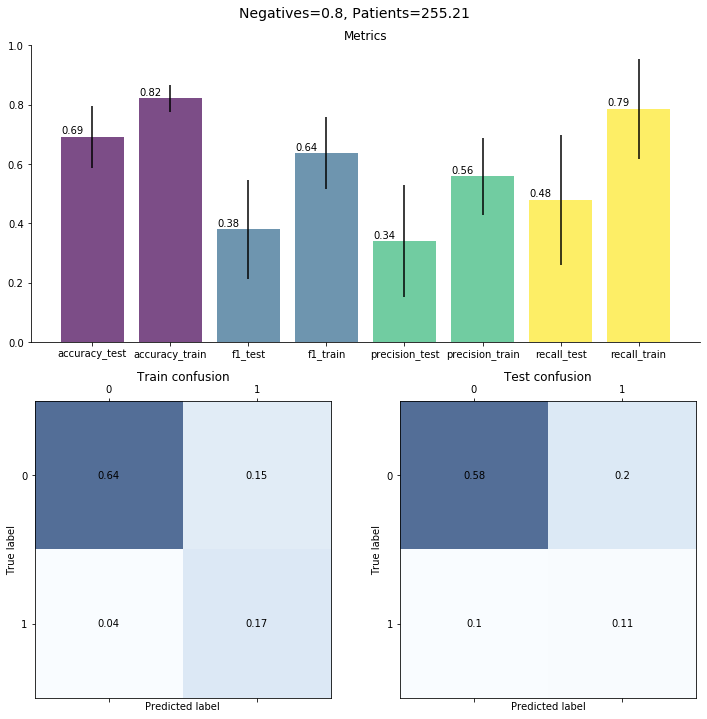

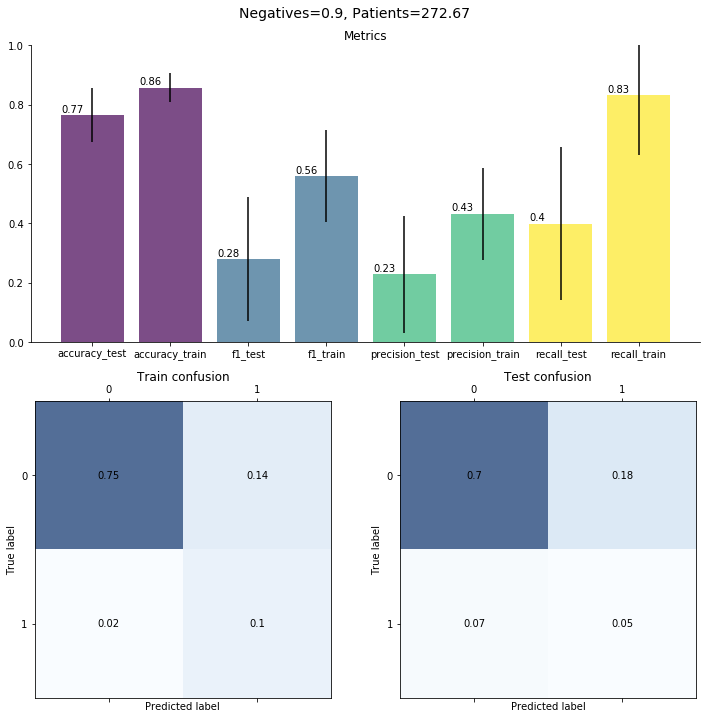

In [53]:
for portion_negative in portion_negatives:
    ev.evaluate_with_plots(parameters,train,test,['Negatives'],[portion_negative],'all','Patients')

As expected, the capability to detect positive outputs improves when they recieve more importance through weighting. This approach seems specially benefitial at moderately strict balancings; however, False Positives become an important problem as the datasets becomes more unbalanced.

### 6.  Weighting

In this exploration, we study the effect of weighting at different positive-negative ratios, which affects the loss function. We work with 5 different ratios, considering that the weight of positive outputs goes **from 0.5 to 0.9**. We also include a *'Default'* ratio that corresponds to the proportion of positive and negative outputs in each case.

In [54]:
class_weights = ['Default','{0: 0.5, 1: 0.5}','{0: 0.4, 1: 0.6}','{0: 0.3, 1: 0.7}','{0: 0.2, 1: 0.8}','{0: 0.1, 1: 0.9}']

In [55]:
parameters = pandas.read_csv('./Exploration/weighting_parameters.csv')
train = pandas.read_csv('./Exploration/weighting_train.csv')
test = pandas.read_csv('./Exploration/weighting_test.csv')

In [56]:
table = pandas.DataFrame()
for class_weight in class_weights:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Class weights'],[class_weight])
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Class weights=Default Class weights={0: 0.5, 1: 0.5}  \
accuracy_test           0.737+/-0.090                  0.841+/-0.083   
accuracy_train          0.834+/-0.055                  0.899+/-0.050   
f1_test                 0.346+/-0.159                  0.272+/-0.217   
f1_train                0.597+/-0.113                  0.587+/-0.184   
precision_test          0.287+/-0.156                  0.419+/-0.320   
precision_train         0.477+/-0.137                  0.842+/-0.167   
recall_test             0.493+/-0.204                  0.217+/-0.190   
recall_train            0.850+/-0.095                  0.471+/-0.189   

                Class weights={0: 0.4, 1: 0.6} Class weights={0: 0.3, 1: 0.7}  \
accuracy_test                    0.814+/-0.091                  0.800+/-0.104   
accuracy_train                   0.904+/-0.050                  0.894+/-0.063   
f1_test                          0.269+/-0.212                  0.313+/-0.199   
f1_train                         0.653+/-0.137                  0.687+/-0.131   
precision_test                   0.346+/-0.272                  0.324+/-0.211   
precision_train                  0.796+/-0.128                  0.716+/-0.142   
recall_test                      0.251+/-0.222                  0.333+/-0.237   
recall_train                     0.571+/-0.165                  0.685+/-0.166   

                Class weights={0: 0.2, 1: 0.8} Class weights={0: 0.1, 1: 0.9}  
accuracy_test                    0.755+/-0.120                  0.676+/-0.150  
accuracy_train                   0.858+/-0.085                  0.760+/-0.124  
f1_test                          0.314+/-0.186                  0.345+/-0.157  
f1_train                         0.677+/-0.116                  0.560+/-0.126  
precision_test                   0.279+/-0.173                  0.261+/-0.130  
precision_train                  0.592+/-0.148                  0.417+/-0.133  
recall_test                      0.403+/-0.257                  0.579+/-0.257  
recall_train                     0.816+/-0.125                  0.892+/-0.148

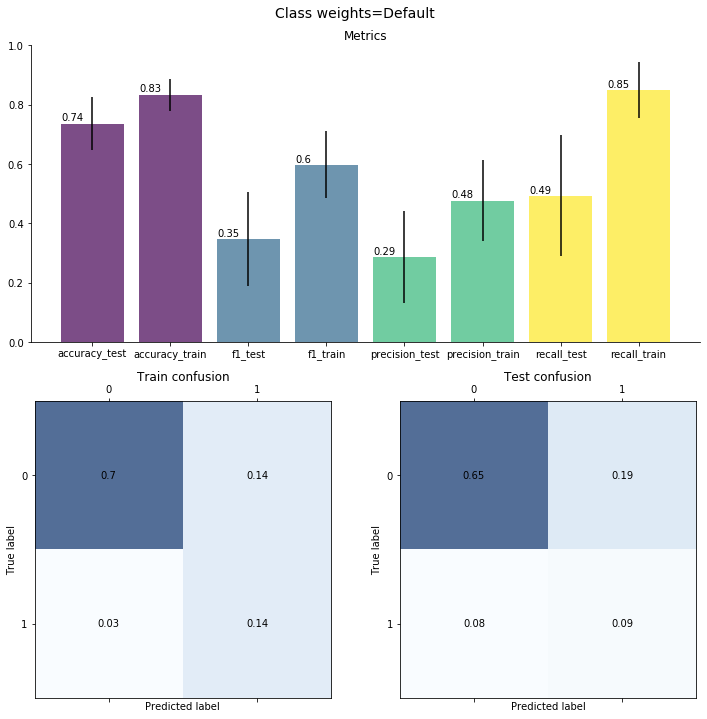

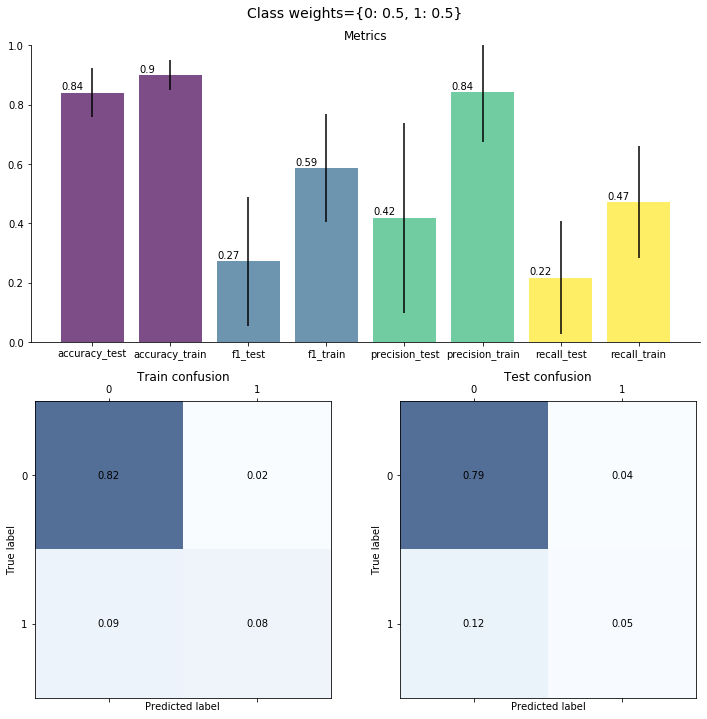

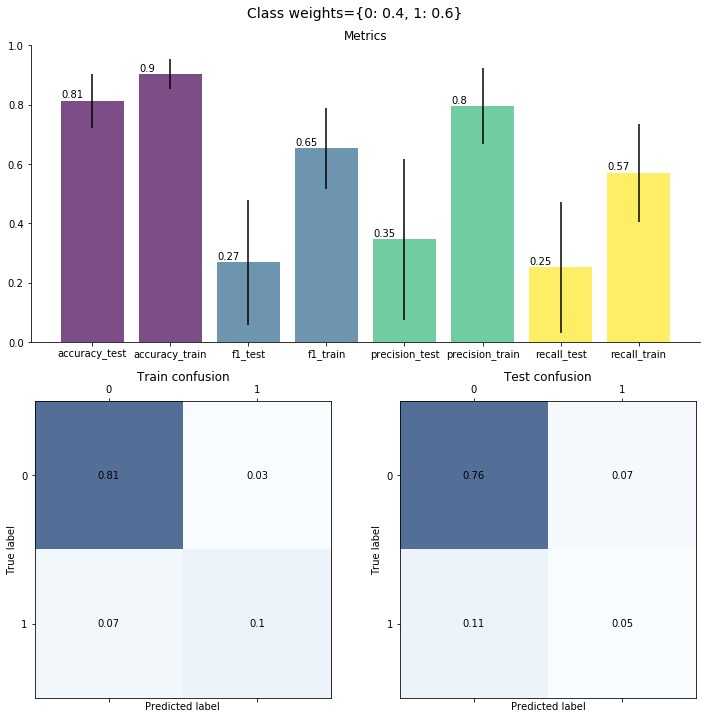

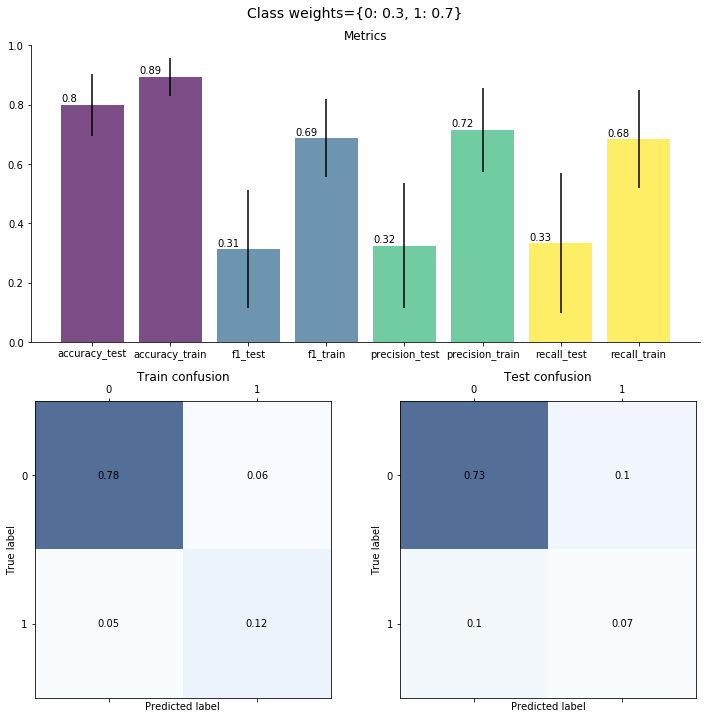

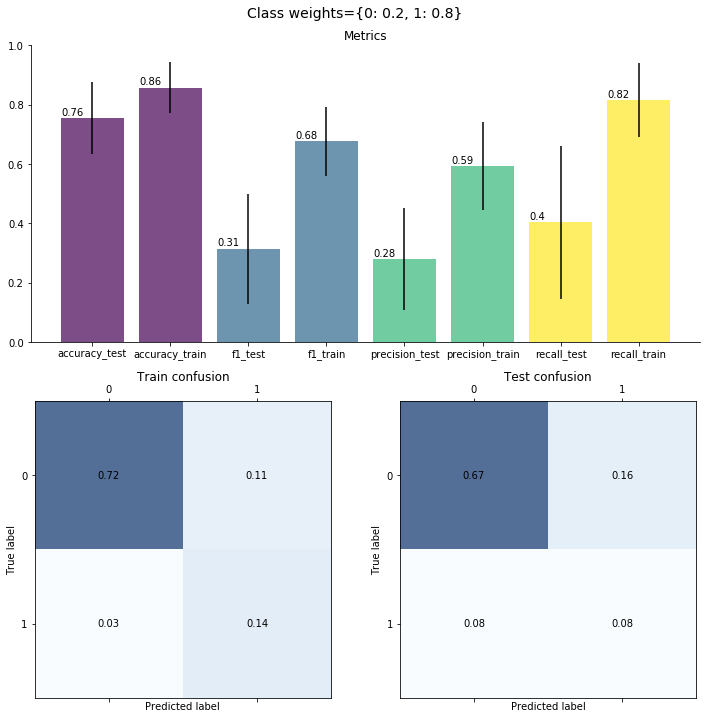

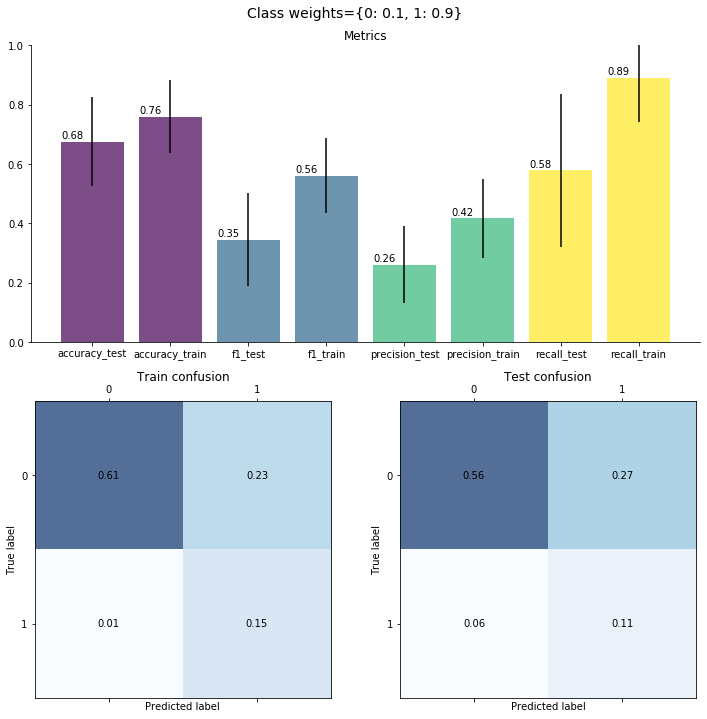

In [57]:
for class_weight in class_weights:
    ev.evaluate_with_plots(parameters,train,test,['Class weights'],[class_weight])

It looks like **the weighting ratio has different effects depending on the metric. As the weighting becomes more marked (closer to a positive weight of 1), the accuracy and the precision is worst but the recall is better**. In other words, the model is more capable of recognising the positive values but with a risk of predicting more than they actually are (**problem with False Positives**). Since the dataset has more negative outputs, failing in those results in more overall mistakes. **As the weighting becomes less marked (closer to a negative portion of 0.5), the accuracy and the precision are better but the recall is worst**. In other words, the model is less capable of recognising positive values but does not predict more than they actually are (**problem with False Negatives**). Since the dataset has more negative outputs, failing in those which are positive results in more overall mistakes. It is important, therefore, to find a trade-off between both options, which is achieved through a default weighting proportional to the actual proportions of positive and negative outputs.

### 7. Epochs

In this exploration, we study the effect of the number of epochs, which affects the training process length. We work with 5 different epochs **from 100 to 300**.

In [58]:
epochs = [100,150,200,250,300]

In [59]:
parameters = pandas.read_csv('./Exploration/epochs_parameters.csv')
train = pandas.read_csv('./Exploration/epochs_train.csv')
test = pandas.read_csv('./Exploration/epochs_test.csv')

In [60]:
table = pandas.DataFrame()
for epoch in epochs:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Epochs'],[epoch])
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Epochs=100     Epochs=150     Epochs=200     Epochs=250  \
accuracy_test    0.743+/-0.090  0.747+/-0.097  0.756+/-0.101  0.751+/-0.099   
accuracy_train   0.836+/-0.054  0.884+/-0.046  0.910+/-0.040  0.937+/-0.033   
f1_test          0.342+/-0.183  0.345+/-0.168  0.325+/-0.191  0.327+/-0.170   
f1_train         0.591+/-0.117  0.686+/-0.128  0.740+/-0.152  0.821+/-0.079   
precision_test   0.290+/-0.180  0.297+/-0.168  0.289+/-0.193  0.300+/-0.183   
precision_train  0.472+/-0.136  0.575+/-0.139  0.637+/-0.156  0.730+/-0.111   
recall_test      0.463+/-0.217  0.466+/-0.213  0.408+/-0.212  0.400+/-0.212   
recall_train     0.842+/-0.118  0.888+/-0.154  0.909+/-0.172  0.953+/-0.045   

                    Epochs=300  
accuracy_test    0.763+/-0.098  
accuracy_train   0.953+/-0.032  
f1_test          0.312+/-0.178  
f1_train         0.875+/-0.067  
precision_test   0.287+/-0.178  
precision_train  0.807+/-0.105  
recall_test      0.369+/-0.209  
recall_train     0.967+/-0.049

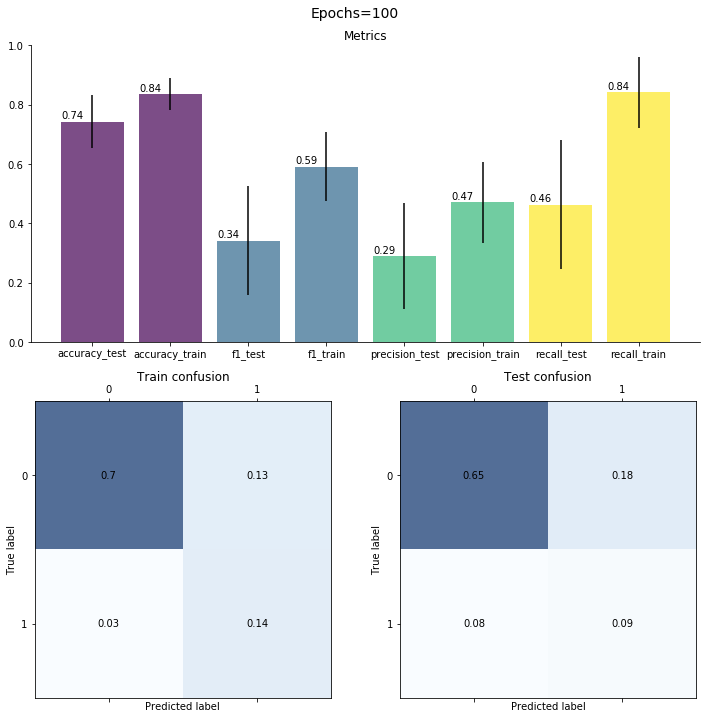

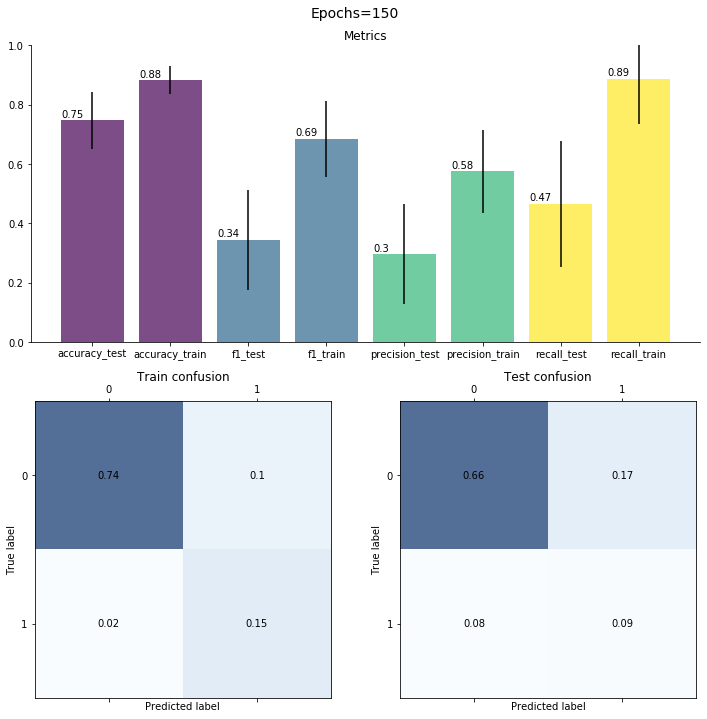

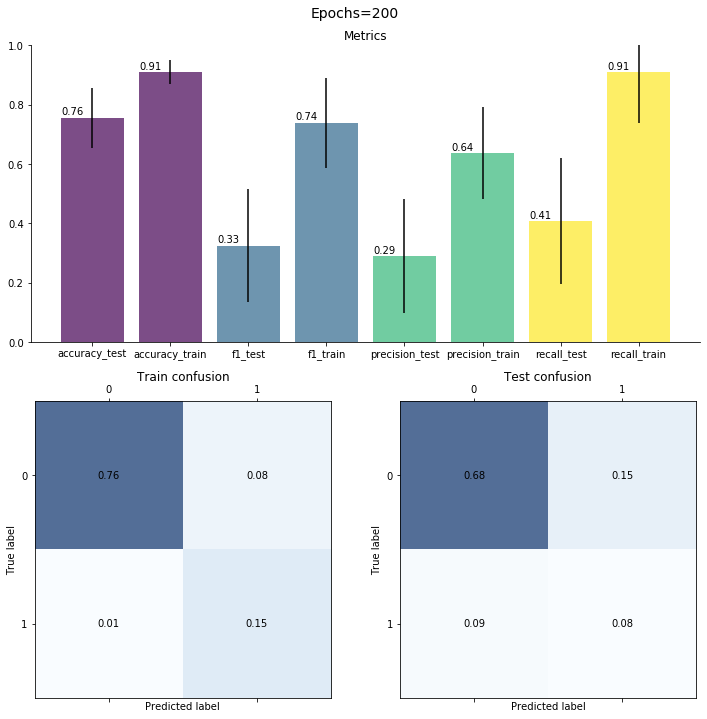

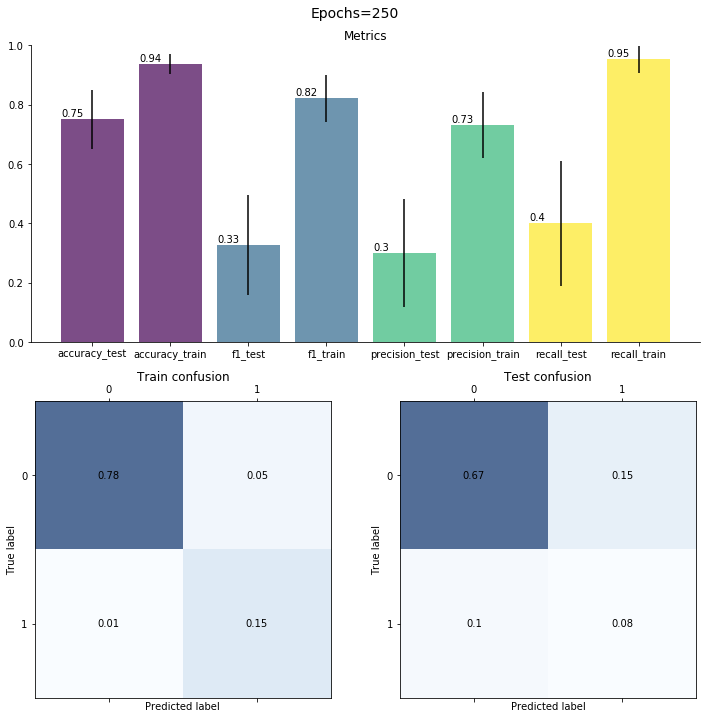

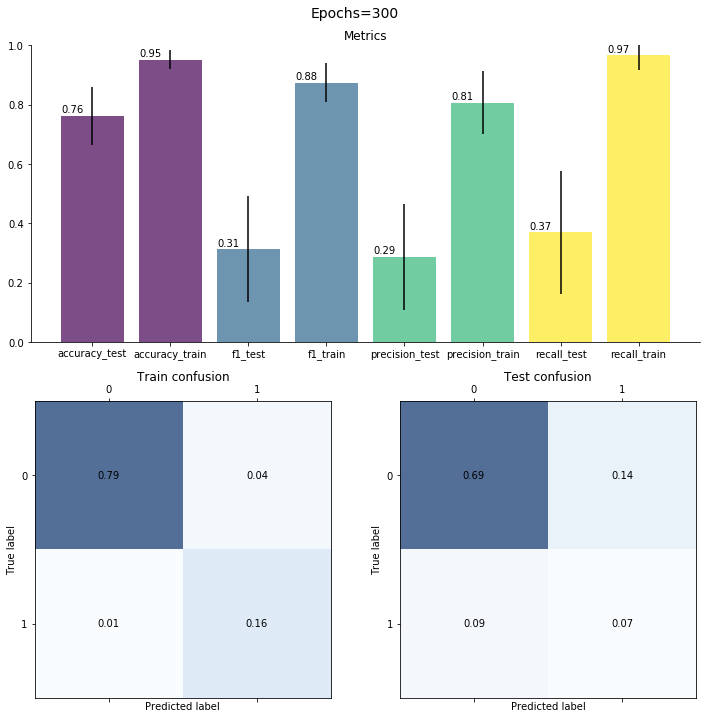

In [61]:
for epoch in epochs:
    ev.evaluate_with_plots(parameters,train,test,['Epochs'],[epoch])

It looks like **the scaling factor has a clear effect in train data, where higher number of epochs lead to better performance, but an unclear one in test data, where higher number of epochs lead to increased accuracy but decreased recall**. This effect is expected in general terms as neural networks trained for a longer time are known to fit data better but not necessarily generalise better. The problem in this case comes with the recall in test data, meaning that the model did not learn the underlying pattern to recognise positive outputs but overfitted the ones of the train data.

It is interesting to introduce in here the difference between bias and variance. With low number of epochs, we experience a problem of bias (even in the training set results are poor, specially in what recall and precision refers to). With high number of epochs, we experience a problem of variance (training results are better but test results are far, specially in what recall and precision refers to).

### 7.1. Epochs (with strict balancing)

The difference is that we were considering no balancing while now we consider strict balancing.

In [62]:
epochs = [100,150,200,250,300]

In [63]:
parameters = pandas.read_csv('./Exploration/epochs_var1_parameters.csv')
train = pandas.read_csv('./Exploration/epochs_var1_train.csv')
test = pandas.read_csv('./Exploration/epochs_var1_test.csv')

In [64]:
table = pandas.DataFrame()
for epoch in epochs:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Epochs'],[epoch])
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Epochs=100     Epochs=150     Epochs=200     Epochs=250  \
accuracy_test    0.605+/-0.158  0.597+/-0.132  0.601+/-0.131  0.607+/-0.129   
accuracy_train   0.802+/-0.066  0.864+/-0.065  0.901+/-0.054  0.925+/-0.051   
f1_test          0.588+/-0.190  0.567+/-0.189  0.591+/-0.157  0.590+/-0.157   
f1_train         0.789+/-0.110  0.859+/-0.101  0.894+/-0.099  0.924+/-0.054   
precision_test   0.617+/-0.212  0.586+/-0.219  0.594+/-0.182  0.613+/-0.184   
precision_train  0.804+/-0.109  0.863+/-0.108  0.901+/-0.107  0.934+/-0.059   
recall_test      0.598+/-0.224  0.591+/-0.223  0.625+/-0.195  0.607+/-0.207   
recall_train     0.787+/-0.143  0.863+/-0.121  0.894+/-0.113  0.919+/-0.078   

                    Epochs=300  
accuracy_test    0.587+/-0.133  
accuracy_train   0.954+/-0.040  
f1_test          0.576+/-0.158  
f1_train         0.953+/-0.040  
precision_test   0.600+/-0.181  
precision_train  0.956+/-0.046  
recall_test      0.583+/-0.182  
recall_train     0.953+/-0.053

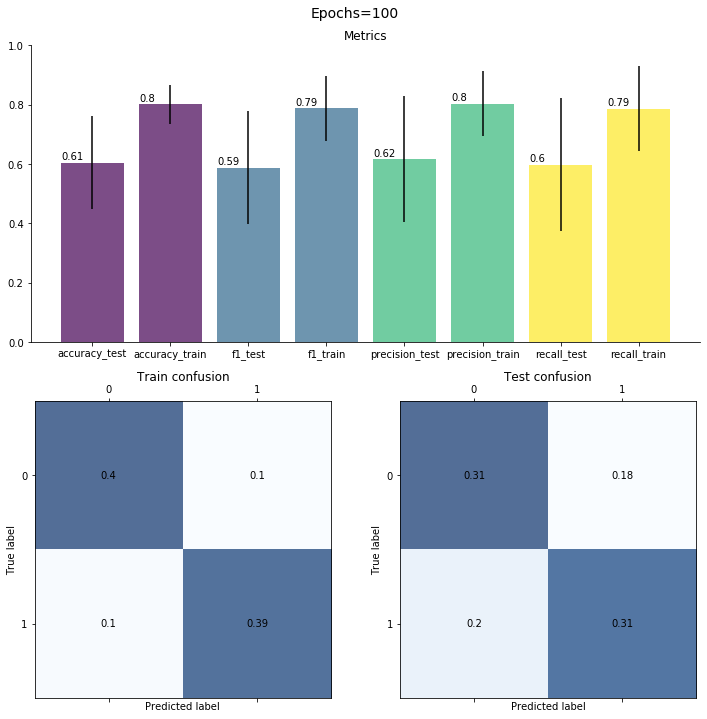

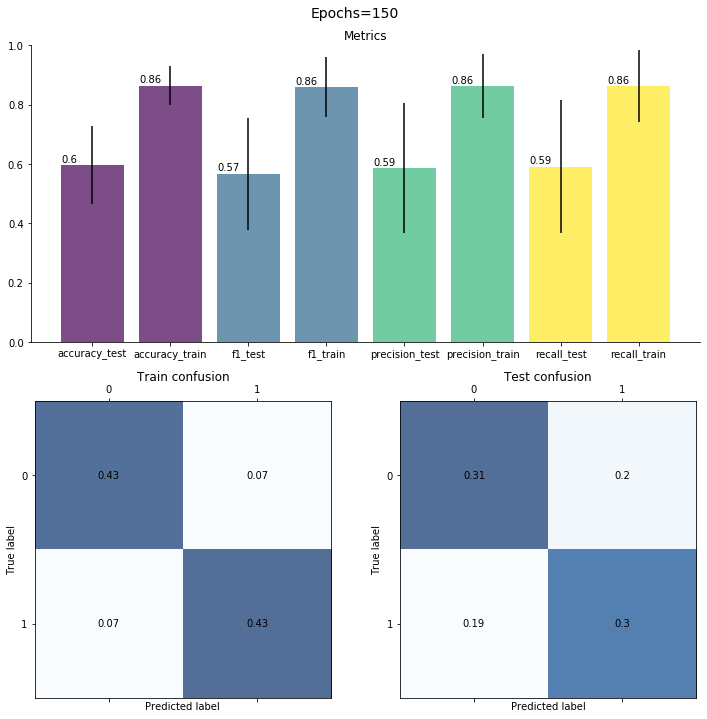

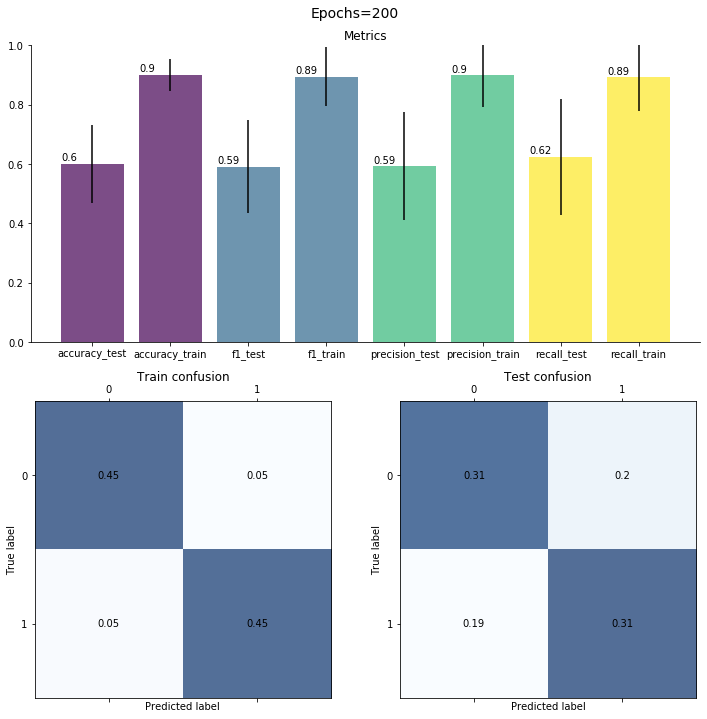

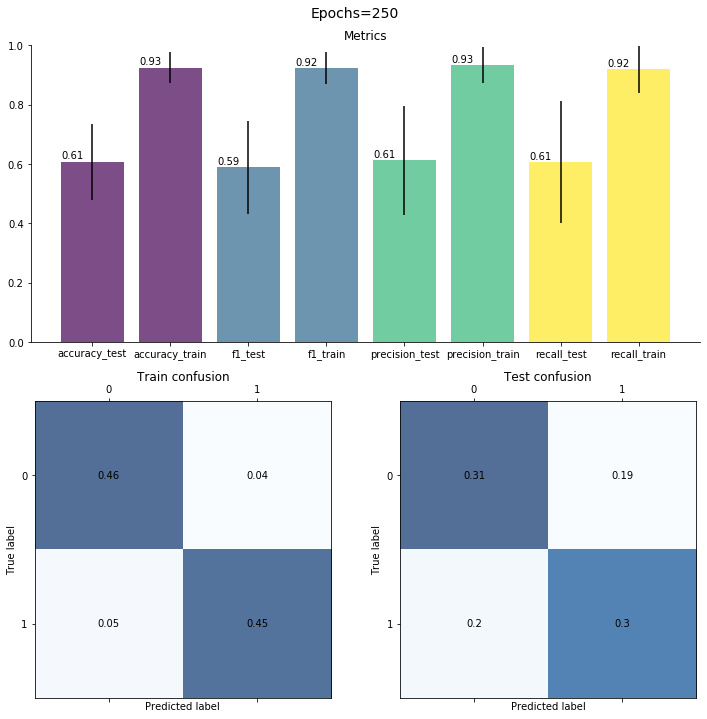

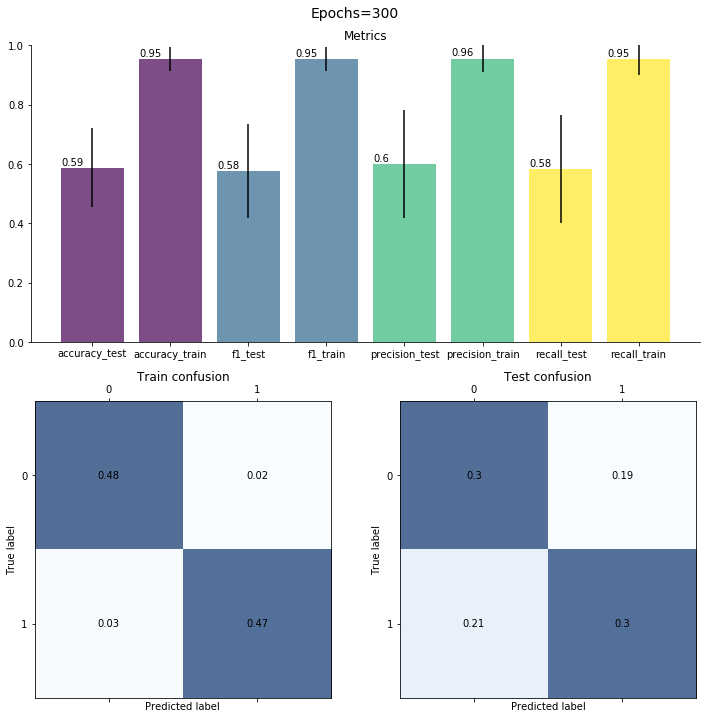

In [65]:
for epoch in epochs:
    ev.evaluate_with_plots(parameters,train,test,['Epochs'],[epoch])

We can see that increasing the number of epochs leads to very good results in train data but there is no clear improvement in test data.

### 7.2. Epochs (with no weighting)

The difference is that we were considering default weighting while now we do not consider weighting.

In [66]:
epochs = [100,150,200,250,300]

In [67]:
parameters = pandas.read_csv('./Exploration/epochs_var2_parameters.csv')
train = pandas.read_csv('./Exploration/epochs_var2_train.csv')
test = pandas.read_csv('./Exploration/epochs_var2_test.csv')

In [68]:
table = pandas.DataFrame()
for epoch in epochs:
    temp_table = ev.evaluate_with_tables(parameters,train,test,['Epochs'],[epoch])
    try: table = pandas.concat([table,temp_table],axis=1)
    except: table = temp_table
table

Epochs=100     Epochs=150     Epochs=200     Epochs=250  \
accuracy_test    0.834+/-0.088  0.826+/-0.091  0.813+/-0.094  0.811+/-0.091   
accuracy_train   0.899+/-0.060  0.926+/-0.045  0.942+/-0.040  0.963+/-0.030   
f1_test          0.237+/-0.217  0.254+/-0.203  0.263+/-0.203  0.302+/-0.192   
f1_train         0.591+/-0.179  0.734+/-0.164  0.810+/-0.127  0.884+/-0.114   
precision_test   0.384+/-0.334  0.329+/-0.257  0.327+/-0.255  0.344+/-0.238   
precision_train  0.869+/-0.145  0.884+/-0.165  0.933+/-0.068  0.944+/-0.100   
recall_test      0.189+/-0.189  0.228+/-0.200  0.236+/-0.195  0.295+/-0.203   
recall_train     0.472+/-0.185  0.638+/-0.176  0.733+/-0.155  0.838+/-0.137   

                    Epochs=300  
accuracy_test    0.798+/-0.094  
accuracy_train   0.972+/-0.026  
f1_test          0.247+/-0.174  
f1_train         0.908+/-0.135  
precision_test   0.287+/-0.215  
precision_train  0.954+/-0.134  
recall_test      0.233+/-0.167  
recall_train     0.870+/-0.145

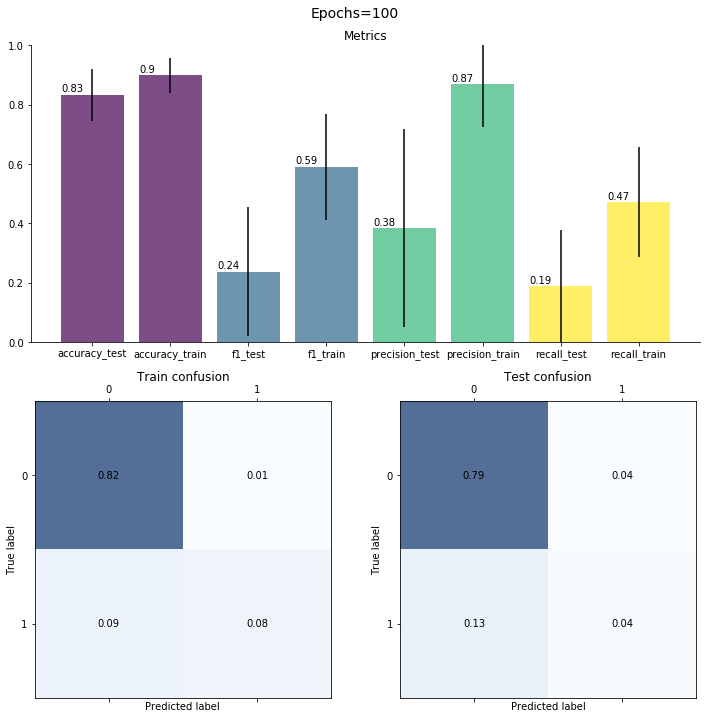

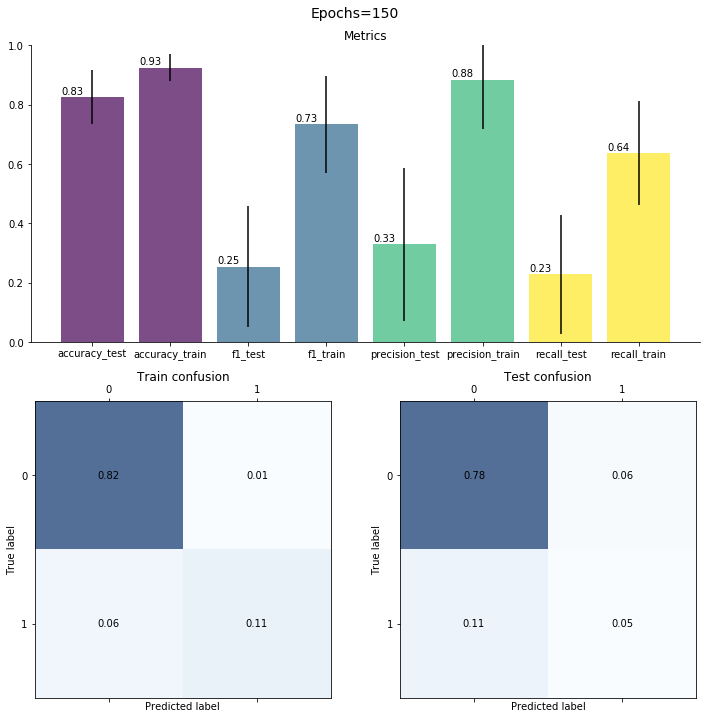

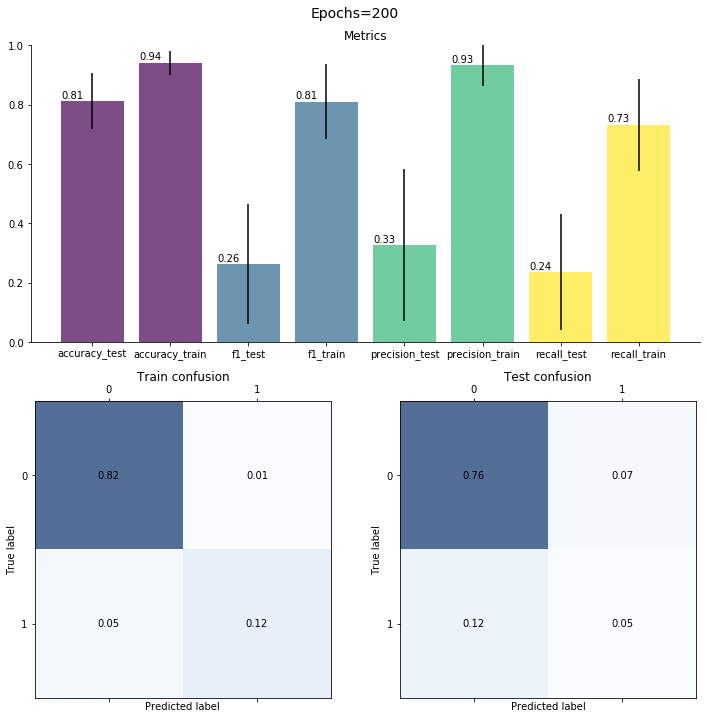

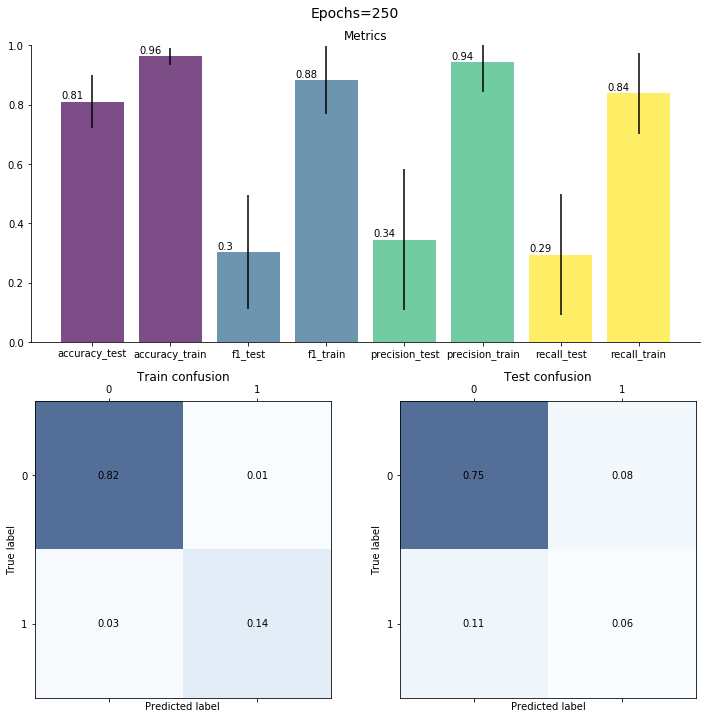

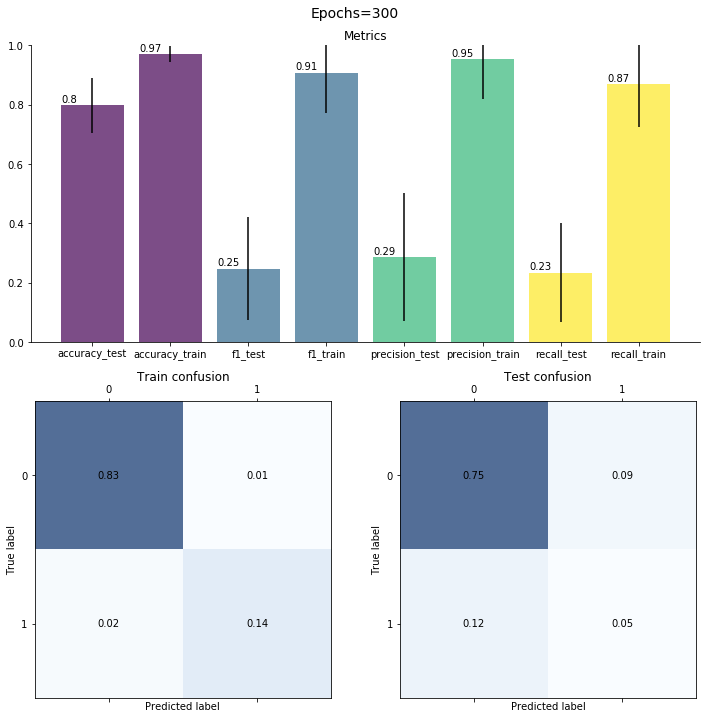

In [69]:
for epoch in epochs:
    ev.evaluate_with_plots(parameters,train,test,['Epochs'],[epoch])

We can see that increasing the number of epochs leads to very good results in train data but not necessarily in test data. In fact, the accuracy becomes worst while the precision and recall increase till a certain point (250 epochs).

### 8. Dropout regularization

In this exploration, we study the effect of the number of epochs combined with the dropout rate, which affect the training process regularization. We work with 3 different epochs **from 200 to 300** and 3 different dropout rates **from 0.2 to 0.4**.

In [70]:
epochs = [200,250,300]
dropout_rates = [0.2,0.3,0.4]

In [71]:
parameters = pandas.read_csv('./Exploration/dropout_parameters.csv')
train = pandas.read_csv('./Exploration/dropout_train.csv')
test = pandas.read_csv('./Exploration/dropout_test.csv')

In [72]:
table = pandas.DataFrame()
for epoch in epochs:
    for dropout_rate in dropout_rates:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Epochs','Dropout rate'],[epoch,dropout_rate])
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Epochs=200, Dropout rate=0.2 Epochs=200, Dropout rate=0.3  \
accuracy_test                  0.747+/-0.089                0.763+/-0.097   
accuracy_train                 0.868+/-0.051                0.859+/-0.062   
f1_test                        0.321+/-0.185                0.349+/-0.181   
f1_train                       0.644+/-0.130                0.633+/-0.106   
precision_test                 0.273+/-0.175                0.310+/-0.182   
precision_train                0.534+/-0.144                0.544+/-0.131   
recall_test                    0.424+/-0.222                0.438+/-0.218   
recall_train                   0.850+/-0.136                0.788+/-0.128   

                Epochs=200, Dropout rate=0.4 Epochs=250, Dropout rate=0.2  \
accuracy_test                  0.775+/-0.090                0.754+/-0.088   
accuracy_train                 0.850+/-0.061                0.886+/-0.047   
f1_test                        0.349+/-0.182                0.343+/-0.183   
f1_train                       0.585+/-0.100                0.703+/-0.089   
precision_test                 0.311+/-0.184                0.298+/-0.190   
precision_train                0.513+/-0.123                0.597+/-0.126   
recall_test                    0.435+/-0.225                0.453+/-0.218   
recall_train                   0.716+/-0.132                0.894+/-0.090   

                Epochs=250, Dropout rate=0.3 Epochs=250, Dropout rate=0.4  \
accuracy_test                  0.767+/-0.094                0.769+/-0.091   
accuracy_train                 0.868+/-0.052                0.864+/-0.055   
f1_test                        0.356+/-0.179                0.350+/-0.179   
f1_train                       0.645+/-0.123                0.631+/-0.081   
precision_test                 0.306+/-0.170                0.314+/-0.177   
precision_train                0.554+/-0.153                0.551+/-0.121   
recall_test                    0.470+/-0.238                0.434+/-0.221   
recall_train                   0.819+/-0.146                0.778+/-0.103   

                Epochs=300, Dropout rate=0.2 Epochs=300, Dropout rate=0.3  \
accuracy_test                  0.761+/-0.091                0.754+/-0.090   
accuracy_train                 0.904+/-0.043                0.887+/-0.047   
f1_test                        0.343+/-0.174                0.337+/-0.182   
f1_train                       0.736+/-0.090                0.705+/-0.082   
precision_test                 0.309+/-0.176                0.298+/-0.185   
precision_train                0.634+/-0.132                0.598+/-0.118   
recall_test                    0.418+/-0.205                0.430+/-0.228   
recall_train                   0.911+/-0.073                0.887+/-0.080   

                Epochs=300, Dropout rate=0.4  
accuracy_test                  0.769+/-0.104  
accuracy_train                 0.871+/-0.057  
f1_test                        0.348+/-0.185  
f1_train                       0.645+/-0.128  
precision_test                 0.310+/-0.189  
precision_train                0.554+/-0.139  
recall_test                    0.436+/-0.225  
recall_train                   0.798+/-0.160

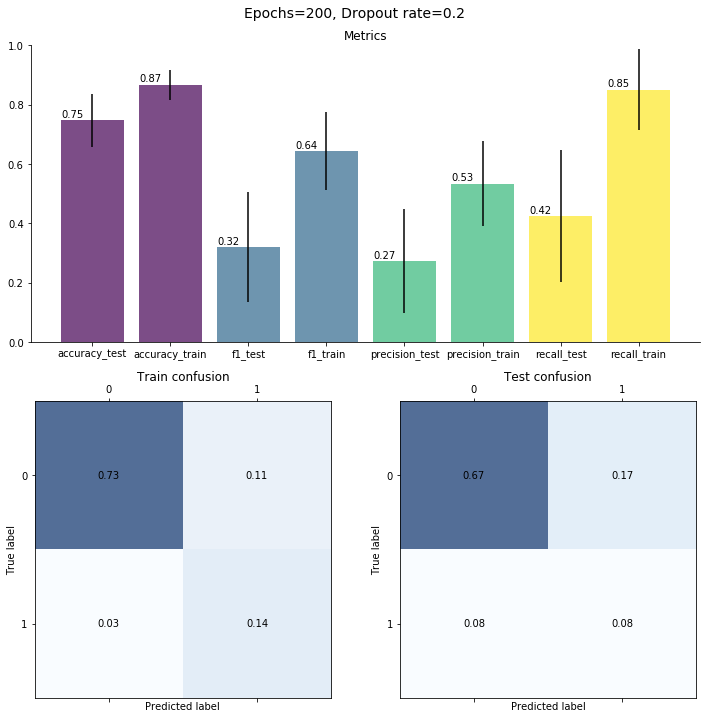

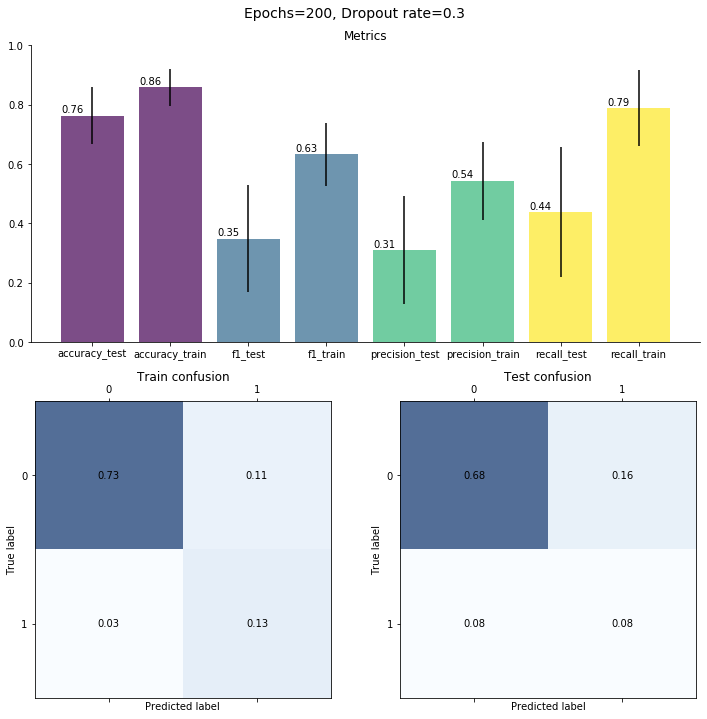

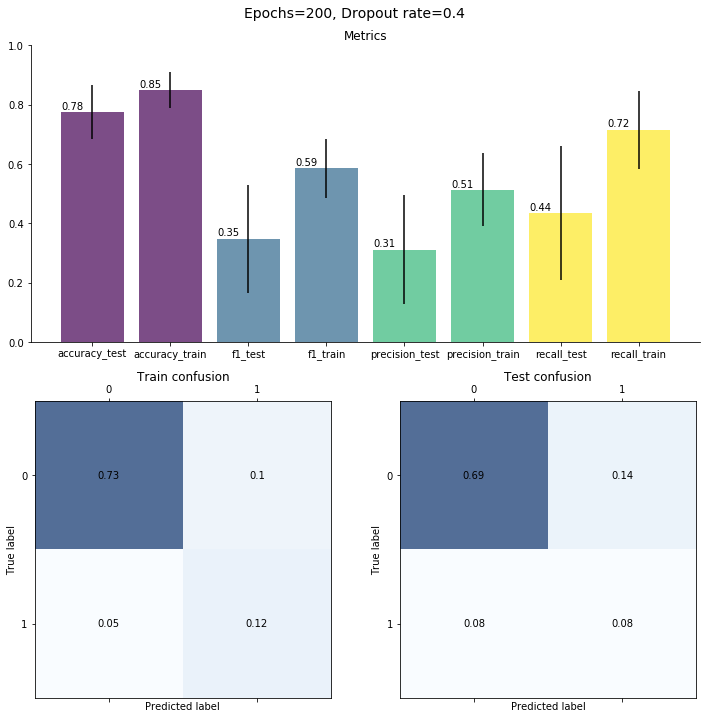

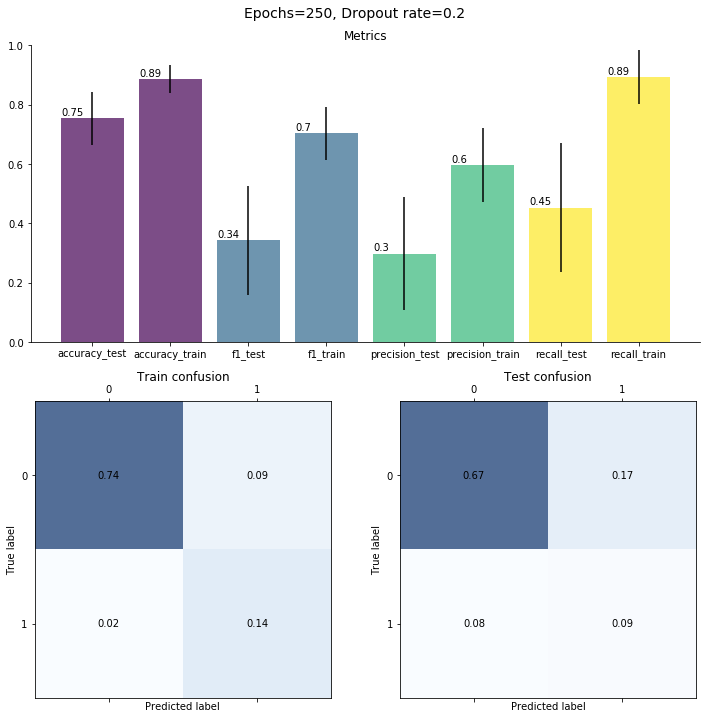

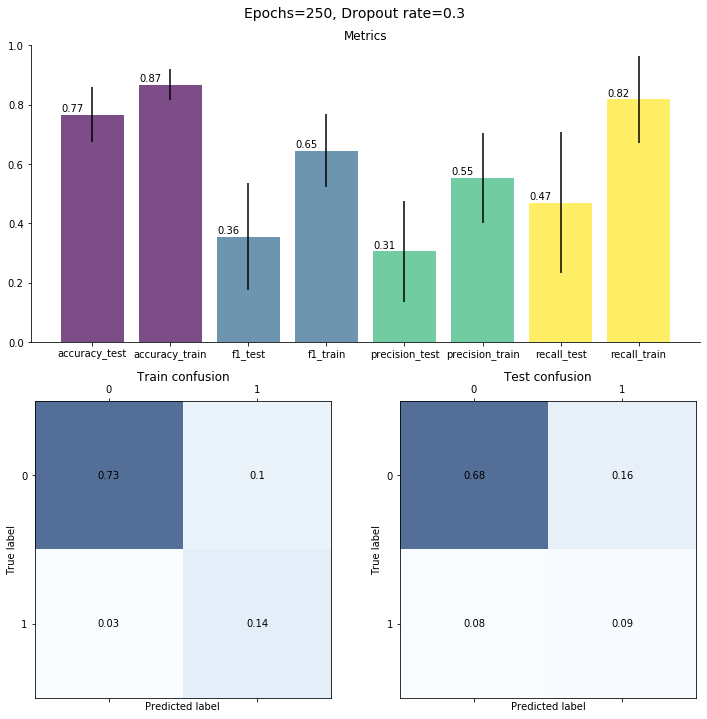

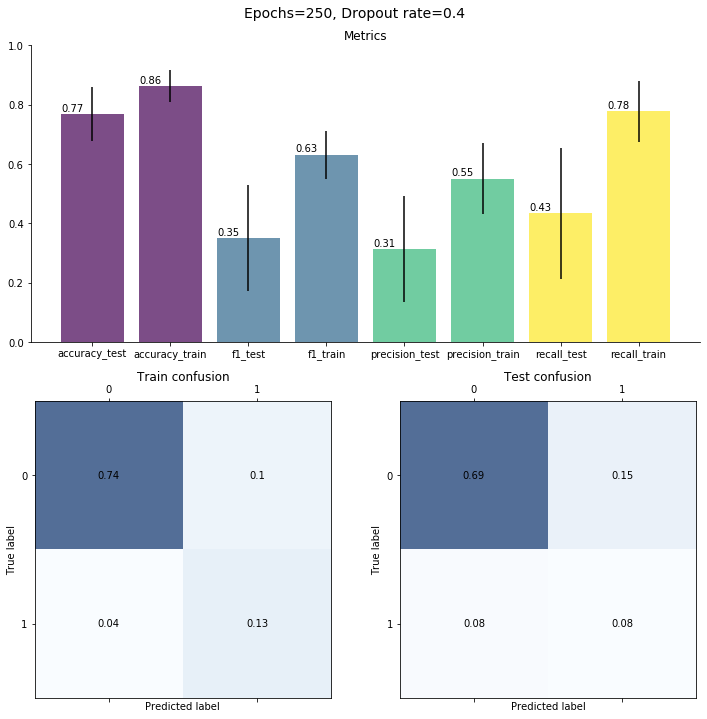

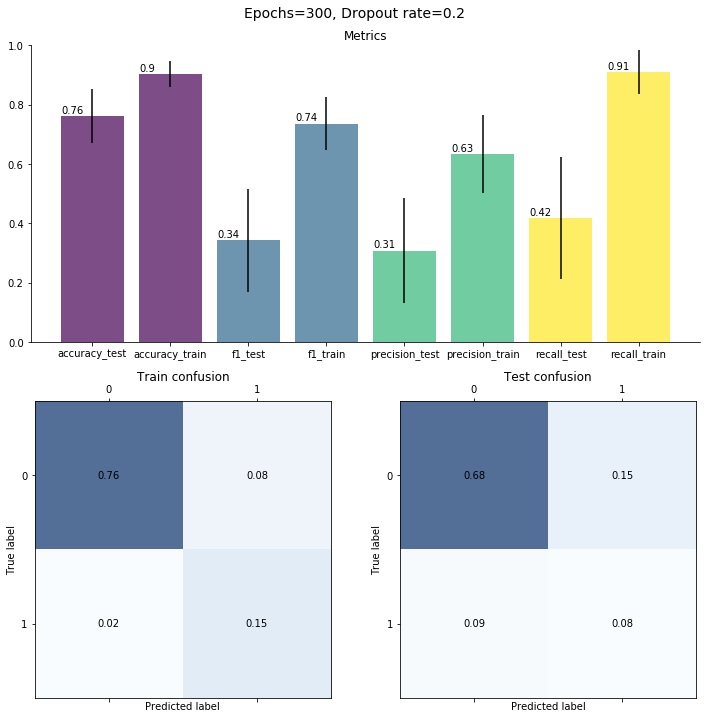

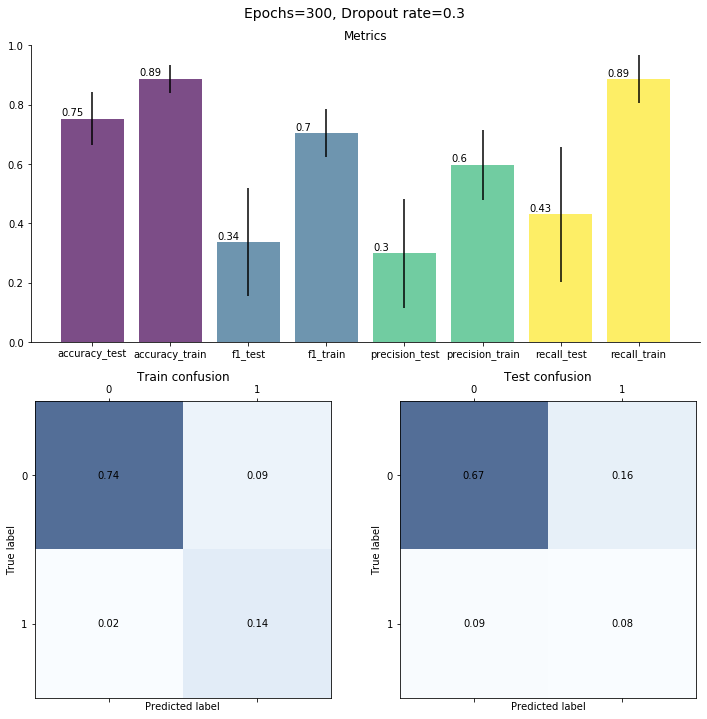

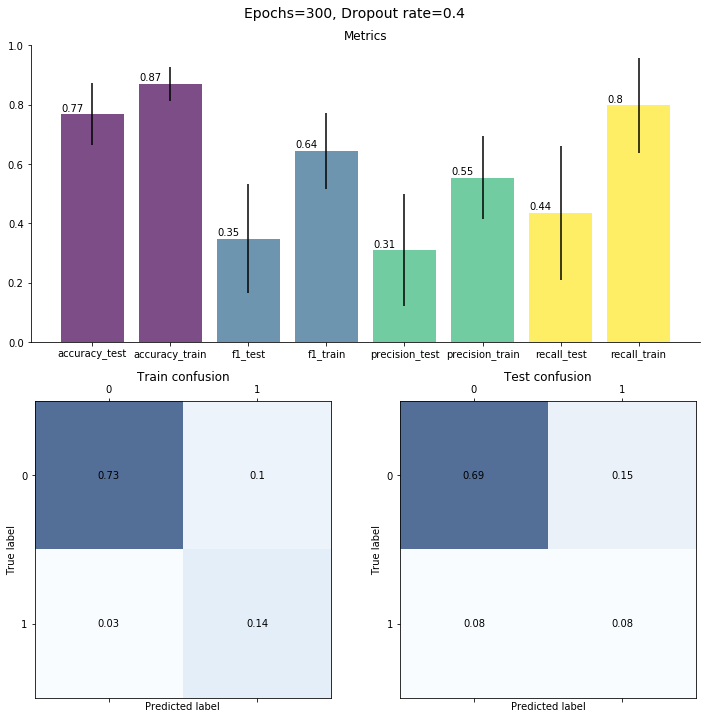

In [73]:
for epoch in epochs:
    for dropout_rate in dropout_rates:
        ev.evaluate_with_plots(parameters,train,test,['Epochs','Dropout rate'],[epoch,dropout_rate])

We need to focuse in two things. The first is the effect of introducing dropout regularization, which we can appreciate by comparing the performance with the previous exploration; the second is the effect of considering different dropout rates, which we can appreciate by comparing the performance within this exploration. **As for the dropout, we find that the performance decreases in train data but increases in test data**. This was expected as models with certain regularization tend to generalise better. It is also interesting to see that the number of epochs is less relevant when considering regularization. **As for the dropout rate, we find that, as it increases, the performance decreases in train data but increases in test data**. This was expected but it is important to note that too much regularization, which apparently we have not reached, might lead to our model not learning any pattern at all.

### 9. L2 regularization

In this exploration, we study the effect of the number of epochs combined with the L2 rate, which affect the training process regularization. We work with 3 different epochs **from 200 to 300** and 3 different L2 rates **from 0.01 to 0.0001**.

In [74]:
epochs = [200,250,300]
l2_rates = [0.01,0.001,0.0001]

In [75]:
parameters = pandas.read_csv('./Exploration/l2_parameters.csv')
train = pandas.read_csv('./Exploration/l2_train.csv')
test = pandas.read_csv('./Exploration/l2_test.csv')

In [76]:
table = pandas.DataFrame()
for epoch in epochs:
    for l2_rate in l2_rates:
        temp_table = ev.evaluate_with_tables(parameters,train,test,['Epochs','L2 rate'],[epoch,l2_rate])
        try: table = pandas.concat([table,temp_table],axis=1)
        except: table = temp_table
table

Epochs=200, L2 rate=0.01 Epochs=200, L2 rate=0.001  \
accuracy_test              0.741+/-0.074             0.754+/-0.095   
accuracy_train             0.847+/-0.046             0.907+/-0.043   
f1_test                    0.358+/-0.166             0.334+/-0.169   
f1_train                   0.611+/-0.150             0.735+/-0.124   
precision_test             0.305+/-0.170             0.294+/-0.168   
precision_train            0.488+/-0.172             0.619+/-0.146   
recall_test                0.488+/-0.205             0.419+/-0.201   
recall_train               0.891+/-0.061             0.938+/-0.102   

                Epochs=200, L2 rate=0.0001 Epochs=250, L2 rate=0.01  \
accuracy_test                0.748+/-0.100            0.729+/-0.086   
accuracy_train               0.913+/-0.039            0.866+/-0.042   
f1_test                      0.320+/-0.164            0.351+/-0.160   
f1_train                     0.774+/-0.079            0.635+/-0.174   
precision_test               0.280+/-0.165            0.299+/-0.165   
precision_train              0.663+/-0.118            0.513+/-0.191   
recall_test                  0.414+/-0.208            0.482+/-0.205   
recall_train                 0.951+/-0.049            0.908+/-0.104   

                Epochs=250, L2 rate=0.001 Epochs=250, L2 rate=0.0001  \
accuracy_test               0.750+/-0.093              0.753+/-0.100   
accuracy_train              0.929+/-0.037              0.933+/-0.038   
f1_test                     0.324+/-0.169              0.311+/-0.171   
f1_train                    0.788+/-0.130              0.803+/-0.133   
precision_test              0.284+/-0.164              0.272+/-0.165   
precision_train             0.687+/-0.151              0.708+/-0.147   
recall_test                 0.404+/-0.209              0.395+/-0.214   
recall_train                0.951+/-0.105              0.944+/-0.137   

                Epochs=300, L2 rate=0.01 Epochs=300, L2 rate=0.001  \
accuracy_test              0.737+/-0.084             0.761+/-0.098   
accuracy_train             0.881+/-0.041             0.952+/-0.029   
f1_test                    0.355+/-0.148             0.317+/-0.178   
f1_train                   0.669+/-0.168             0.844+/-0.125   
precision_test             0.302+/-0.156             0.287+/-0.176   
precision_train            0.546+/-0.191             0.763+/-0.148   
recall_test                0.497+/-0.197             0.386+/-0.225   
recall_train               0.942+/-0.056             0.964+/-0.099   

                Epochs=300, L2 rate=0.0001  
accuracy_test                0.768+/-0.098  
accuracy_train               0.954+/-0.029  
f1_test                      0.332+/-0.182  
f1_train                     0.880+/-0.066  
precision_test               0.292+/-0.176  
precision_train              0.809+/-0.107  
recall_test                  0.419+/-0.226  
recall_train                 0.974+/-0.031

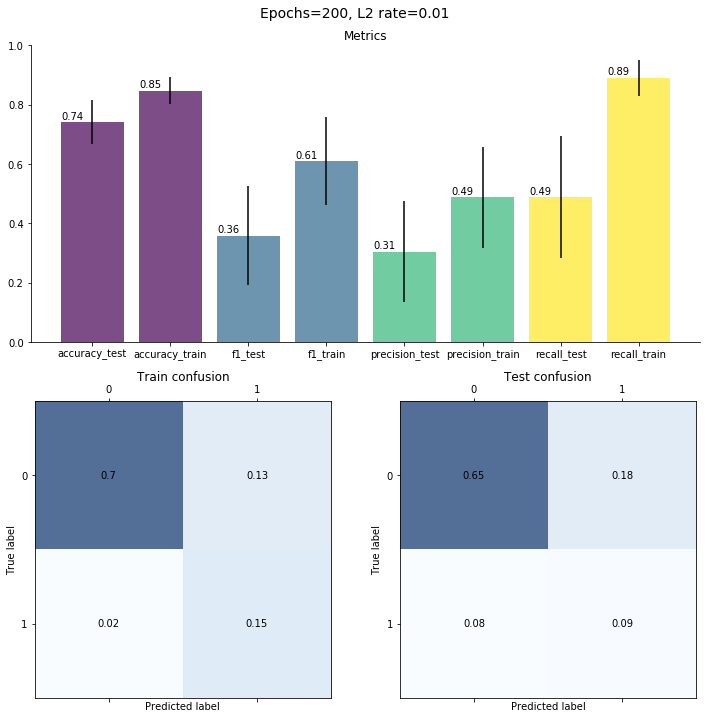

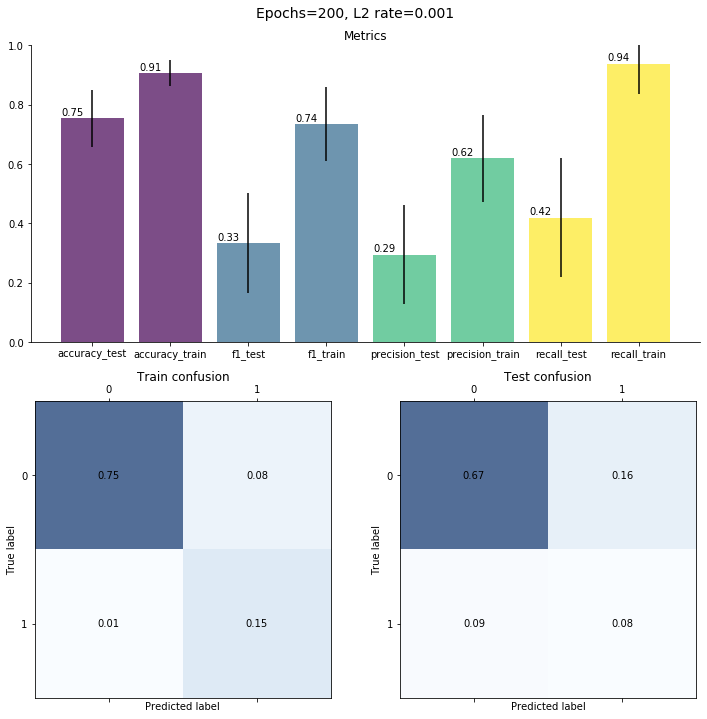

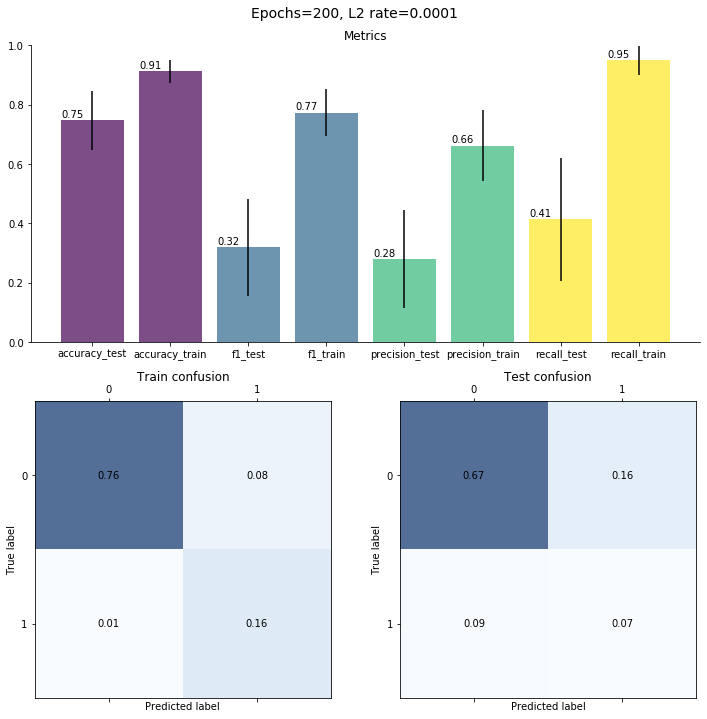

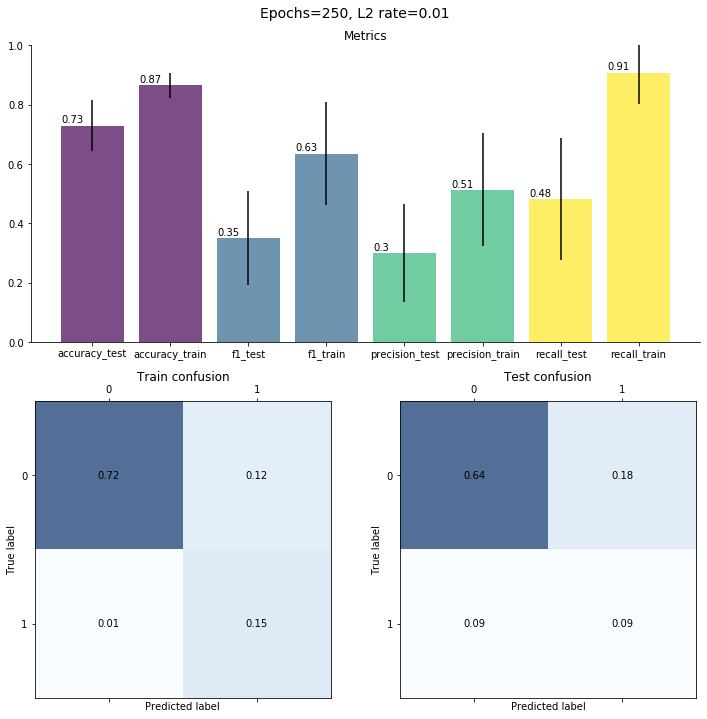

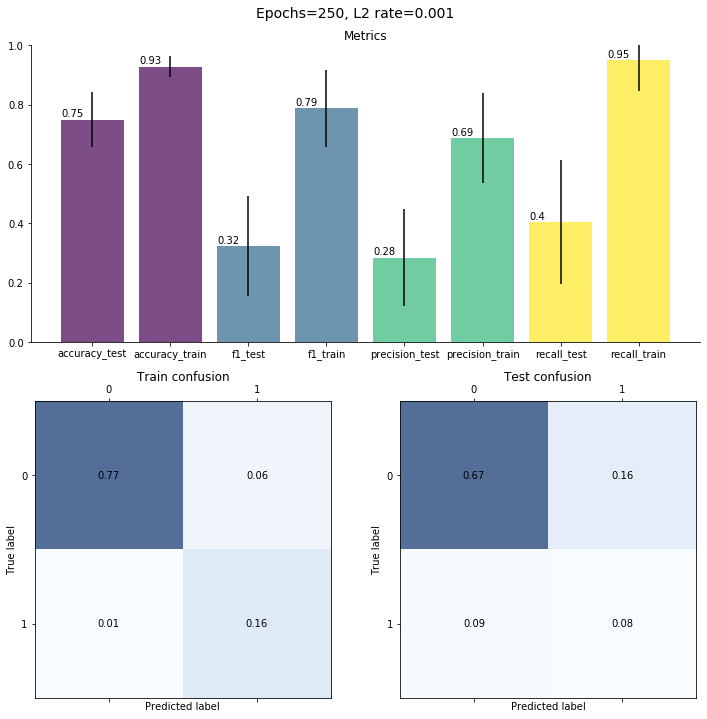

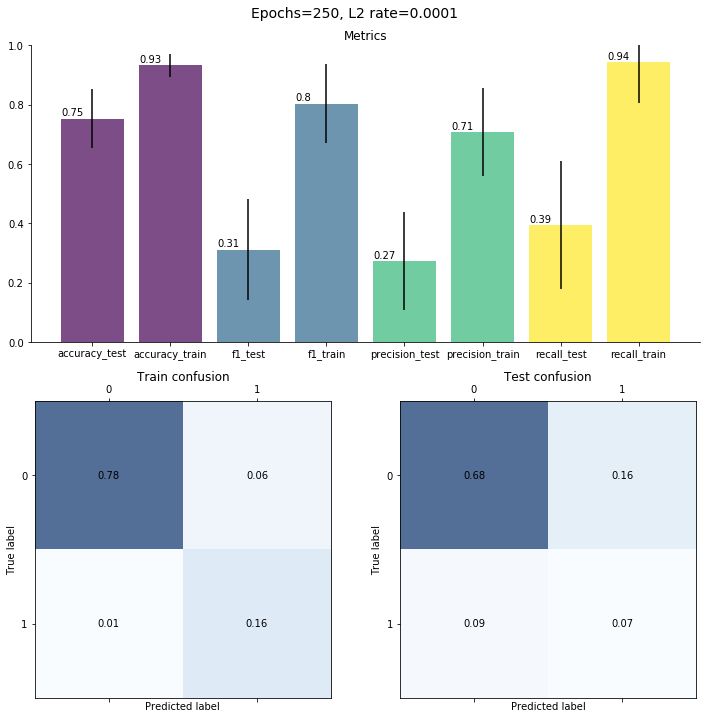

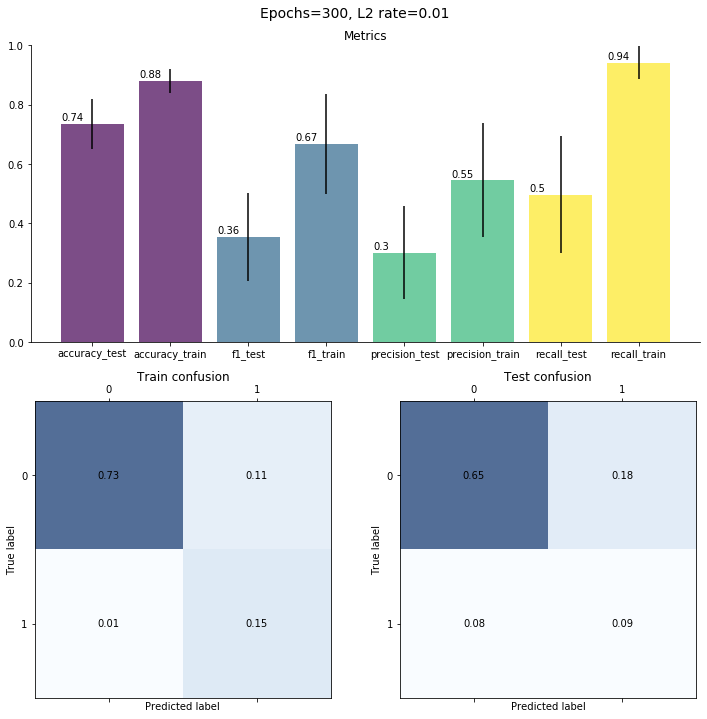

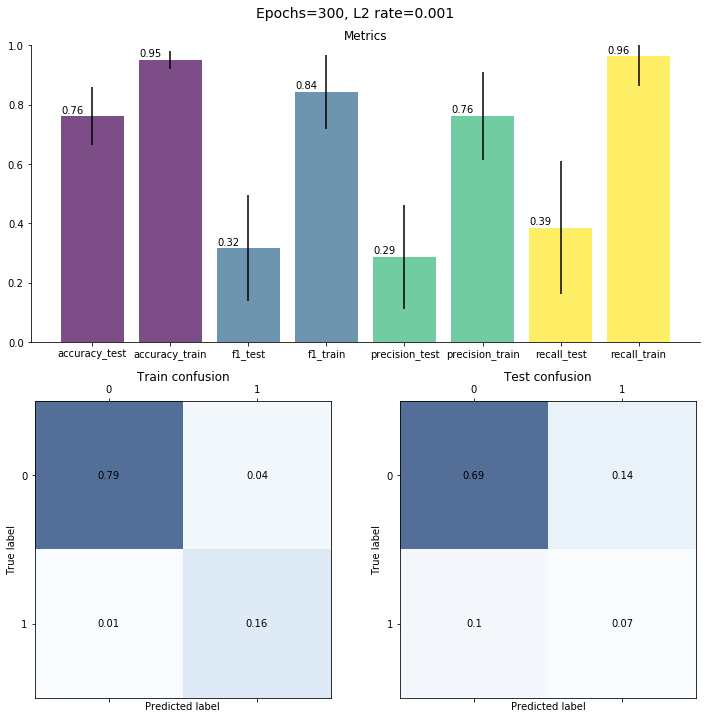

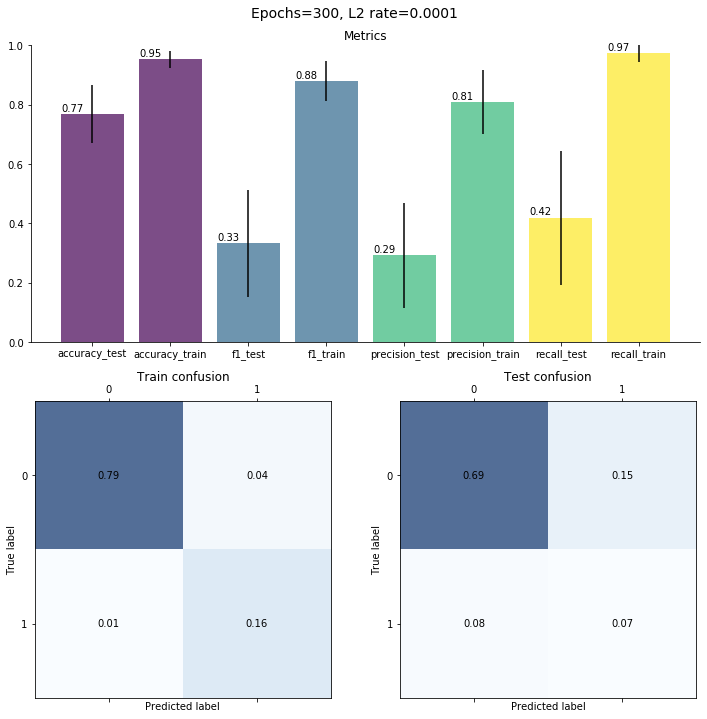

In [77]:
for epoch in epochs:
    for l2_rate in l2_rates:
        ev.evaluate_with_plots(parameters,train,test,['Epochs','L2 rate'],[epoch,l2_rate])

We need to focuse in two things. The first is the effect of introducing L2 regularization, which we can appreciate by comparing the performance with the previous exploration; the second is the effect of considering different L2 rates, which we can appreciate by comparing the performance within this exploration. **As for the L2 regularization, we find that the performance decreases in train data and varies in test data, decreasing in accuracy while increasing in precision and recall**. **As for the L2 rate, we find that, as it increases, the performance decreases in train data and varies in test data, decreasing in accuracy while increasing in precision and recall**. Except for the results in accuracy (explained by an unexpected increase of False Positives), this was expected but it is important to note that too much regularization, which apparently we have not reached, might lead to our model not learning any pattern at all.

### Conclusions

What should be the values to consider for a better oriented optimization? After this exploration, we can consider the following guidelines:

- **Dataset**: features with less than 25% of missing values.
- **Imputation**: knn or bayes.
- **Feature selection**: anova or chi.
- **Target importance**: close to 1 (high target importance although other random target importances could be tested).
- **Scaling factor**: around 1.5 (intermediate scaling factors although this should be considered together with the epochs).
- **Output activation**: sigmoid or softmax.
- **Weighting**: default weighting (maybe giving a bit less importance to positive values).
- **Epochs**: around 250.
- **Regularization**: dropout rate around 0.4.
- **Balancing (if used)**: moderately strict balancing combined with default weighting.